In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import markovify
import missingno as msno
import nltk

In [2]:
gen_df = pd.read_csv('AppleStore.csv')
desc_df = pd.read_csv('appleStore_description.csv') 

In [3]:
gen_df.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1  
3               37                5         9        1  
4               37                5        45        1

In [4]:
desc_df.head()

id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Premium   100788224   
1  281796108                          Evernote - stay organized   158578688   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
4  282935706                                              Bible    92774400   

                                            app_desc  
0  SAVE 20%, now only $3.99 for a limited time!\n...  
1  Let Evernote change the way you organize your ...  
2  Download the most popular free weather app pow...  
3  The eBay app is the best way to find anything ...  
4  On more than 250 million devices around the wo...

In [5]:
# creating a merged dataframe that includes description information

apps_df = pd.merge(gen_df, desc_df[['id','app_desc']],on='id', how='left')

In [6]:
apps_df.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  \
0               38                5        10        1   
1               37                5        23        1   
2               37                5         3        1   
3               37                5         9        1   
4               37                5        45        1   

                                            app_desc  
0  SAVE 20%, now only $3.99 for a limited time!\n...  
1  Let Evernote change the way you organize your ...  
2  Download the most popular free weather app pow...  
3  The eBay app is the best way to find anything ...  
4  On more than 250 million devices around the wo...

In [7]:
apps_df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
app_desc             object
dtype: object

In [8]:
apps_df['cont_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [9]:
def per_label(val, total):
    return str(int(val/total * 100)) + '%'

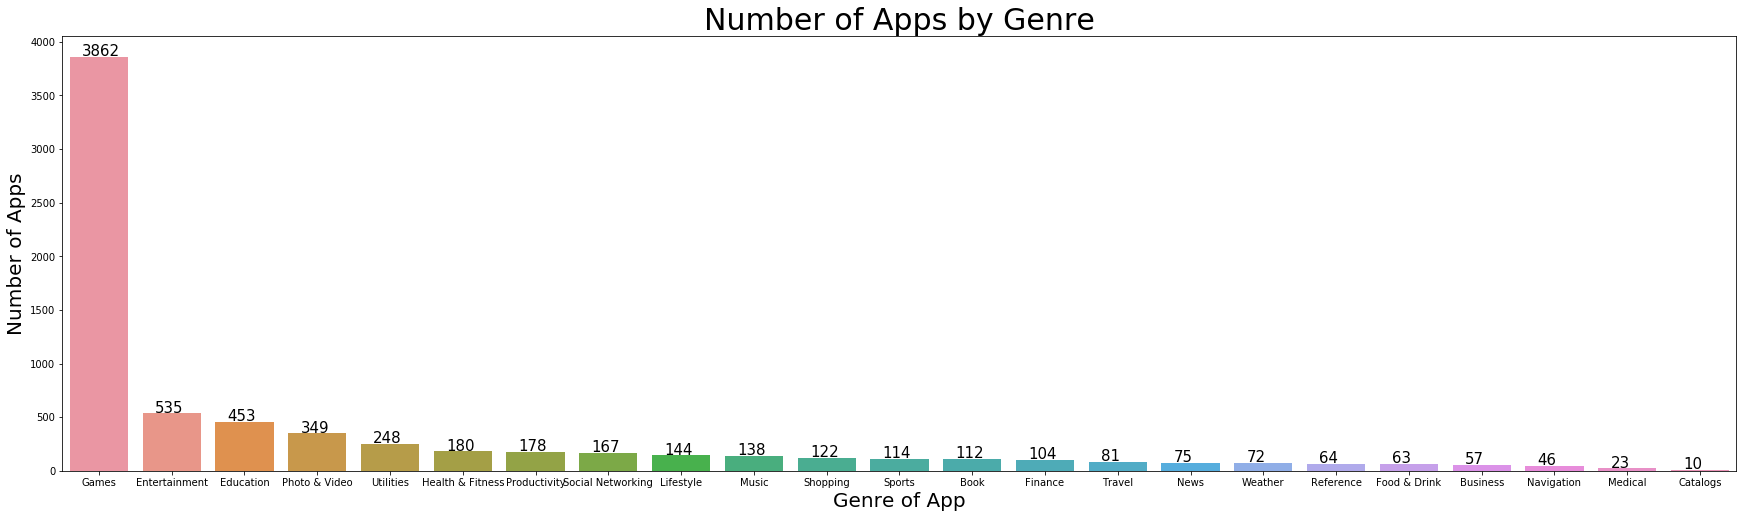

In [10]:
# graph of the number of apps in each genre

%matplotlib inline
plt.figure(figsize = (30,8))
ax = sb.countplot(data = apps_df, x = 'prime_genre', order = apps_df['prime_genre'].value_counts().index)
ax
ax.set_title('Number of Apps by Genre', fontsize = 30)
ax.set_xlabel('Genre of App', fontsize = 20)
ax.set_ylabel('Number of Apps', fontsize = 20)

for p, label in zip(ax.patches, apps_df['prime_genre'].value_counts()):
    ax.annotate(label, (p.get_x()+0.17, p.get_height()+10), fontsize = 15)

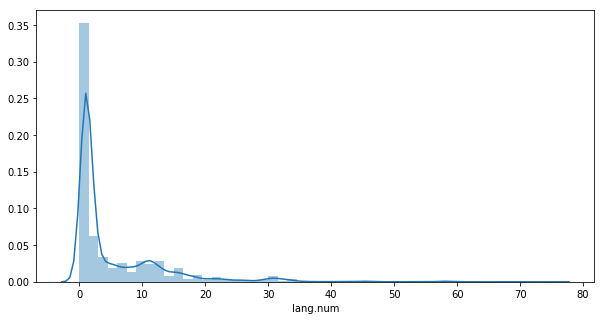

In [11]:
# distribution across languages

%matplotlib inline
plt.figure(figsize = (10,5))
ax = sb.distplot(apps_df['lang.num'])
# ax.set_title('Number of Apps by Genre', fontsize = 30)
# ax.set_xlabel('Genre of App', fontsize = 20)
# ax.set_ylabel('Number of Apps', fontsize = 20)

In [12]:
apps_df.describe()

Unnamed: 0            id    size_bytes        price  \
count   7197.000000  7.197000e+03  7.197000e+03  7197.000000   
mean    4759.069612  8.631310e+08  1.991345e+08     1.726218   
std     3093.625213  2.712368e+08  3.592069e+08     5.833006   
min        1.000000  2.816565e+08  5.898240e+05     0.000000   
25%     2090.000000  6.000937e+08  4.692275e+07     0.000000   
50%     4380.000000  9.781482e+08  9.715302e+07     0.000000   
75%     7223.000000  1.082310e+09  1.819249e+08     1.990000   
max    11097.000000  1.188376e+09  4.025970e+09   299.990000   

       rating_count_tot  rating_count_ver  user_rating  user_rating_ver  \
count      7.197000e+03       7197.000000  7197.000000      7197.000000   
mean       1.289291e+04        460.373906     3.526956         3.253578   
std        7.573941e+04       3920.455183     1.517948         1.809363   
min        0.000000e+00          0.000000     0.000000         0.000000   
25%        2.800000e+01          1.000000     3.500000         2.500000   
50%        3.000000e+02         23.000000     4.000000         4.000000   
75%        2.793000e+03        140.000000     4.500000         4.500000   
max        2.974676e+06     177050.000000     5.000000         5.000000   

       sup_devices.num  ipadSc_urls.num     lang.num      vpp_lic  
count      7197.000000      7197.000000  7197.000000  7197.000000  
mean         37.361817         3.707100     5.434903     0.993053  
std           3.737715         1.986005     7.919593     0.083066  
min           9.000000         0.000000     0.000000     0.000000  
25%          37.000000         3.000000     1.000000     1.000000  
50%          37.000000         5.000000     1.000000     1.000000  
75%          38.000000         5.000000     8.000000     1.000000  
max          47.000000         5.000000    75.000000     1.000000

In [13]:
apps_df.groupby('prime_genre').get_group('Sports')

sports_model = markovify.NewlineText(apps_df.groupby('prime_genre').get_group('Sports')['app_desc'], state_size = 2)

In [14]:
for i in range(10):
    print(sports_model.make_sentence())

- The soundtracks allow you to Team USA's athletes through exclusive stories, photos, videos and check out the competition with Yahoo Fantasy has you covered every day, year-round.
* Full HTML help text available within the bracket to create a new one today.
Make Yahoo Sports the best photos and videos from any device.
Clipstro Golf is now on a global stage in KICK 2017. With 100+ licensed clubs and resorts in the #1 app in the Premier League’s 25-year history and reflected within the bracket to create your Wimbledon experience as a football manager, with our FFmoji keyboard app.
But with the log book and even MORE, including Live Results from Active.com, USA Swimming meets.
- Do not miss the live Leader Board, which features up-to-the-minute scoring and video you care most about, as well as NCAAM and NCAAW
- Interact with the Official App of the period. No partial refunds will be charged to your calendar
- iOS 10 iMessage sticker feature with the purchase of a few of the media.
DraftK

In [15]:
apps_df

Unnamed: 0          id  \
0              1   281656475   
1              2   281796108   
2              3   281940292   
3              4   282614216   
4              5   282935706   
5              6   283619399   
6              7   283646709   
7              8   284035177   
8              9   284666222   
9             10   284736660   
10            11   284791396   
11            12   284815117   
12            13   284815942   
13            14   284847138   
14            15   284862767   
15            16   284876795   
16            17   284882215   
17            18   284910350   
18            20   284993459   
19            21   285005463   
20            22   285946052   
21            23   285994151   
22            24   286058814   
23            25   286070473   
24            27   286799607   
25            28   286906691   
26            29   286911400   
27            31   288113403   
28            32   288120394   
29            33   288419283   
...          ...         ...   
7167       10995  1182265441   
7168       10998  1182331762   
7169       11002  1182568288   
7170       11010  1183234072   
7171       11013  1183260922   
7172       11016  1183548754   
7173       11019  1183709176   
7174       11022  1183856228   
7175       11024  1183986102   
7176       11027  1184711626   
7177       11031  1184800011   
7178       11033  1185209084   
7179       11035  1185328193   
7180       11036  1185365336   
7181       11038  1185428381   
7182       11040  1185538497   
7183       11041  1185580782   
7184       11042  1185731859   
7185       11043  1185777521   
7186       11050  1186108496   
7187       11051  1186126548   
7188       11060  1186384912   
7189       11074  1187128255   
7190       11077  1187279979   
7191       11079  1187282363   
7192       11081  1187617475   
7193       11082  1187682390   
7194       11087  1187779532   
7195       11089  1187838770   
7196       11097  1188375727   

                                             track_name  size_bytes currency  \
0                                       PAC-MAN Premium   100788224      USD   
1                             Evernote - stay organized   158578688      USD   
2       WeatherBug - Local Weather, Radar, Maps, Alerts   100524032      USD   
3     eBay: Best App to Buy, Sell, Save! Online Shop...   128512000      USD   
4                                                 Bible    92774400      USD   
5                                      Shanghai Mahjong    10485713      USD   
6                PayPal - Send and request money safely   227795968      USD   
7                               Pandora - Music & Radio   130242560      USD   
8                           PCalc - The Best Calculator    49250304      USD   
9                                           Ms. PAC-MAN    70023168      USD   
10                            Solitaire by MobilityWare    49618944      USD   
11                                     SCRABBLE Premium   227547136      USD   
12                 Google – Search made just for mobile   179979264      USD   
13                     Bank of America - Mobile Banking   160925696      USD   
14                                             FreeCell    55153664      USD   
15               TripAdvisor Hotels Flights Restaurants   207907840      USD   
16                                             Facebook   389879808      USD   
17       Yelp - Nearby Restaurants, Shopping & Services   167407616      USD   
18    Shazam - Discover music, artists, videos & lyrics   147093504      USD   
19                        Crash Bandicoot Nitro Kart 3D    10735026      USD   
20                                               iQuran    70707916      USD   
21                                          :) Sudoku +     6169600      USD   
22      Yahoo Sports - Teams, Scores, News & Highlights   130583552      USD   
23                            Mileage Log | Fahrtenbuch    71203840      USD   
24                   

prime_genre
Book                 2.477679
Business             3.745614
Catalogs             2.100000
Education            3.376380
Entertainment        3.246729
Finance              2.432692
Food & Drink         3.182540
Games                3.685008
Health & Fitness     3.700000
Lifestyle            2.805556
Medical              3.369565
Music                3.978261
Navigation           2.684783
News                 2.980000
Photo & Video        3.800860
Productivity         4.005618
Reference            3.453125
Shopping             3.540984
Social Networking    2.985030
Sports               2.982456
Travel               3.376543
Utilities            3.278226
Weather              3.597222
Name: user_rating, dtype: float64


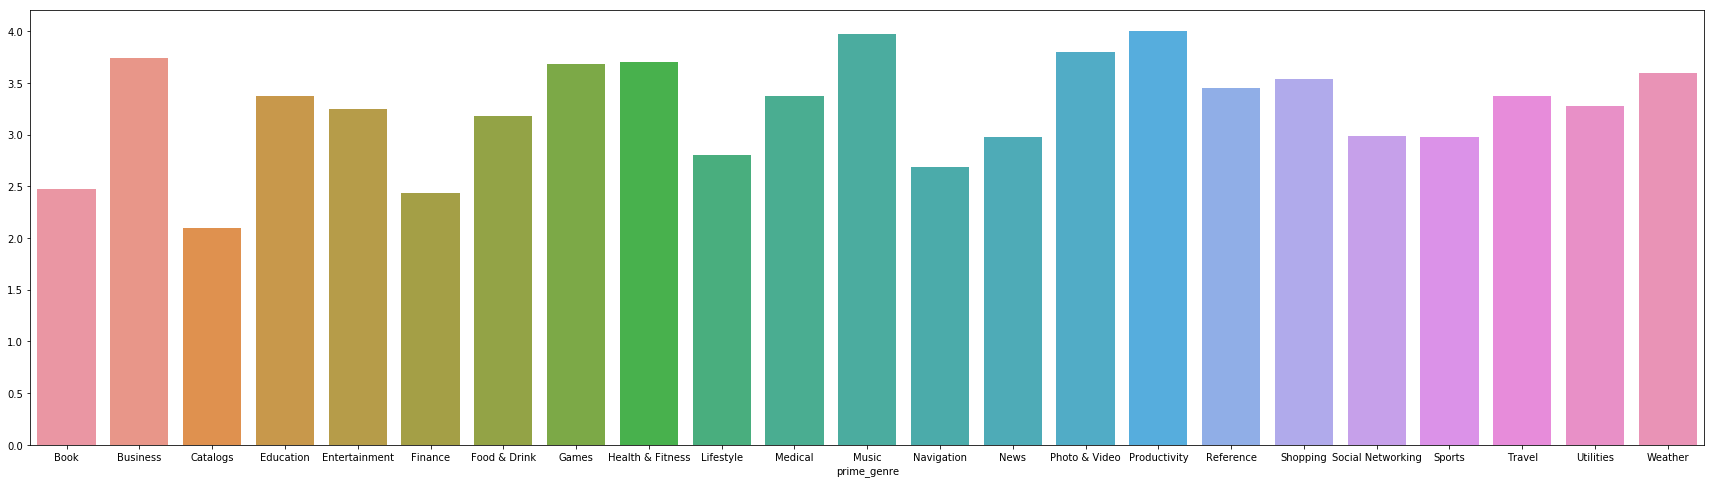

In [16]:
grouped = apps_df.groupby('prime_genre')
print(grouped['user_rating'].mean())

plt.figure(figsize = (30,8))
sb.barplot(x = grouped['user_rating'].mean().keys(), y = grouped['user_rating'].mean().values)

In [17]:
# ratings and comment sentiments
# predicting price based and average rating
# staging the text
# pre processing**

In [18]:
per_label(len(apps_df[apps_df['price']==0]),len(apps_df))

'56%'

In [19]:
# convert lowercase
apps_df['app_desc'] = apps_df['app_desc'].str.lower()
apps_df['app_desc'].head()

0    save 20%, now only $3.99 for a limited time!\n...
1    let evernote change the way you organize your ...
2    download the most popular free weather app pow...
3    the ebay app is the best way to find anything ...
4    on more than 250 million devices around the wo...
Name: app_desc, dtype: object

In [20]:
# translate to english
from langdetect import detect
from googletrans import Translator
# translator = Translator()
# def en_check(text):
#     if detect(text) != 'en':
#         translator = Translator()
#         text = translator.translate(text)

# en_check(apps_df['app_desc'][4344])

for item, row in apps_df.iterrows():
    if detect(row['app_desc'])!='en':
        try:
            print(row['app_desc'])
            translator = Translator()
            row['app_desc'] = translator.translate(row['app_desc'])
#             row['app_desc'] = translator.translate(re.sub(r'[^\w\s ]','',row['app_desc']))
            print('new',row['app_desc'])
        except:
            print(row['id'],row['track_name'])



# from googletrans import Translator
# def trans(x):
#     translator = Translator()
#     return translator.translate(x)
# apps_df['app_desc'].apply(lambda x: trans(x))

# import copy
# from googletrans import Translator

# translatedList = []
# for index, row in apps_df.iterrows():
#     # REINITIALIZE THE API
#     translator = Translator()
#     newrow = copy.deepcopy(row)
#     try:
#         # translate the 'text' column
#         translated = translator.translate(row['app_desc'], dest='en')
#         newrow['translated'] = translated.text
#     except Exception as e:
#         print(str(e))
#         continue
#     translatedList.append(newrow)
    
# print(translatedList)

écoutez gratuitement tous vos hits nrj préférés en illimité sur votre iphone et ipad. pop, dance, r’n’b, rap, rock, écoutez plus de 150 web radios nrj : tous les hits, tous les styles, non-stop et en ultra haute définition ! nrj l’appli musique n°1 pour les nouveaux hits. nrj hit music only ! 

musique gratuite et illimité, tous les hits nrj, tous vos artistes préférés, écoutez les dernières nouveautés, découvrez tous les nouveaux hits, avec l’appli musique  n°1. 

retrouvez en écoute gratuite et illimitée tous vos artistes préférés, rihanna, one direction, maitre gims, bruno mars, david guetta, kendji girac, maroon 5, stromae, m pokora, ariana grande, black m, katy perry, soprano, selena gomez, taylor swift, louane…
retrouvez toutes vos émissions préférées : réveillez-vous avec manu dans le  6/9, et doublez votre salaire.  couchez-vous avec cauet, guillaume radio 2.0 et mikl.
tous les hits, tous les styles : pop, r’n’b, dance, rap, rock, électro, latino, reggae, ragga, zouk, love, fit

同花顺---国内炒股软件领跑者! 用户量超过2亿！
我们为您提供沪深港美全球实时高速行情，精选股市热点资讯，支持90%券商在线实时交易，低佣股票开户，基金理财等。同花顺让投资变的更简单。

【近期爆款功能】
1、横屏筹码分布，轻松追踪主力动向！
2、分时k线标记持仓股成本线，高抛低吸更自如！
3、新股定时申购提醒、一键打新，省心的另人发指！
4、指纹登陆，交易快人一步！
5、一键操作逆回购，行情不好就去薅羊毛吧，收益秒杀宝宝类产品。

【马上下载同花顺，总有一个功能打动您】

【新股民】
看身边朋友炒股赚钱，自己对股票完全不懂，不知从何入手？
马上下载同花顺app，以下五招让你快速成为股市赚钱小能手！
----股民学校----
股市中的清华、北大
----股市直播----
券商投顾、私募牛人持仓股票一目了然，盘中实时交流操盘思路，手把手教还怕不会？
----k线训练营----
开启训练营和对战模式，寻找属于自己的盘感！
----模拟炒股----
20w免费操盘资金，更有高手追踪，学习牛人操盘秘决。
----股票开户----
存款两年不如持股3分钟，光模拟盘赚钱怎么够？所有的努力都只为这一刻！
 
【老股民】
股市无毕业生，我们只教你炒股赚钱方法，提供好用的工具，做股市赢家！
---智能盯盘---
自选、持仓实时异动推送、股价预警、大事提醒帮您轻松盯盘
---闪电交易---
分时页面快买快卖，更有交易指纹登陆快人一步。
---自动打新---
一键自动打新，中签提醒，再也不错过白检钱的机会
---问财选股---
选股是门技术活，如何在2800多只股票中相中那只黑马股？同花顺问财，一句话就能选出好股票，学会了就如检到宝！
---涨停分析---
涨停揭秘，一秒了解涨停背后逻辑，愿你追在妖股启动时。
---投资参考---
精选股市热点资讯、机会情报，个股机会利器。
---尾盘检钱包---
盘中涨跌难把握？短线宝，尾盘异动送钱包，更有荐股提醒，买入时机不错过。

【其它理财方式】
---爱基金---
带你寻找穿越牛熊、收益稳健的基金
---港美股----
快速港、美股开户，白天炒a股，晚上炒美股，轻松赚双倍的钱！

【同花顺10.0时代】
10年前，我们在交易厅目不转睛。现在，异动推送、股价预警、大事提醒帮您轻松盯盘。
8年前，我们在股市中大海捞针。现在，问财智能选股，大数据替

new Translated(src=fr, dest=en, text=sfr tv: your TV programs on the finger and the eye!

a wide selection of live tv channels and replay (1) in high quality video (hq)
sfr unlimited play vod, thought for the whole family, on all your screens, everywhere, streaming and downloading (2)
pass vod unlimited access, and vod rental (3) or purchase individually (4)
a complete tv guide on all channels of your subscription
remote tv services such as programming and remote reading of tv recordings (5)
a remote control to control the box, accessible in wifi by a tap on the picto at the top right of the screen (6)
a media center, to browse and read the multimedia files deposited on labox (and other dlna sources)

the tv freely in 3g, 4g and wifi, regardless of the operator.

sfr tv is chromecast compatible. (7)

(1) for mobile subscribers / sfr tablets (sfr tv option available in compatible mobile offers). TV channels included or optional for sfr and red by sfr box customers with an active tv deco

new Translated(src=fr, dest=en, text=Manage your mobile and fixed sfr accounts and those of your loved ones from your smartphone and tablet with ease.
 
- monitor the consumption of all your mobile and fixed lines sfr, including from abroad
- check your latest bills
- access to the details of your offer
- manage your options
- drive all your benefits directly sfr family! (sharing of gigas and contents, mastery of uses ...)
- access support on using your mobile and your adsl, thd or fiber connection
 
download and free use in mainland France (excluding cost of mobile internet connection according to the offer sfr subscribed).
application accessible to sfr customers with a mobile, tablet & key or adsl / thd / fiber offer., pronunciation=None, extra_data="{'translat...")
央视影音，电视随身携带！引领移动视频新浪潮！

【呈现最精彩体育赛事】
独家直播世界杯亚洲区预选赛，国足加油！
更有nba、中超、英超、西甲、德甲、f1 等着你。

【独播热播看个够】
热剧不间断，人民的名义、三生三世十里桃花、因为遇见你、老九门、放弃我抓紧我、小别离、中国式关系，精彩电视剧想看就看。
春晚、星光大道、中国梦想秀、超级访问、舌尖上的中国2、非常6+1，娱乐综艺分分钟get！

【新闻资讯随时掌握】
新闻直播间、中国新闻、朝

n-tv nachrichten: die aktuellsten nachrichten und neusten videos immer und überall dabei!

einfach die kostenlose n-tv app auf das iphone, den ipod touch, das ipad, apple tvos oder die apple watch laden und sofort haben sie zugriff auf nachrichten, börsenkurse, videos und vieles mehr.

die n-tv app bietet neben topmeldungen auf der startseite zugriff auf sämtliche news aus den bereichen politik, wirtschaft, börse, sport, panorama, leute, auto und technik sowie auf hintergrundberichte, bilderserien mit beschreibung und videos des nachrichtenportals n-tv.de. 

n-tv app - die highlights:
- breaking news mit individueller push-funktion
- fußballticker mit allen wichtigen infos, daten und ergebnissen zur 1., 2. und 3. liga, sowie zum dfb-pokal, zur champions league, europa league, premier league, ligue 1, serie a, primera division und zur nationalmannschaft
- internationale spiele mit deutscher beteiligung, sowie die 1. und 2. bundesliga im live ticker auf der startseite
- formel1-ticker
- 

die tv spielfilm app. die ganze welt des fernsehens - immer mit dabei!
das tv-programm von über 140 sendern kompakt und schnell im überblick! tv spielfilm mit dem aktuellen fernsehprogramm und live tv. kostenlos!

live tv: jederzeit überall live fernsehen - direkt in der app! mit tv spielfilm live können sie über 50 sender kostenlos anschauen - auf ihrem smartphone, tablet oder im web. eine internetverbindung (wlan, 3g, lte) ist ausreichend - und ihr fernseher ist immer mit dabei!

ihre optionen für tv spielfilm live im überblick:

- über 50 tv-sender kostenlos anschauen im free-paket: z.b. das erste (ard), zdf, arte, kika, phoenix, sport1, zee.one, servus tv und joiz
- optional: premium-paket mit über 20 zusätzlichen sendern: z.b. rtl, prosieben, sat1, kabeleins, rtl2, vox, sixx, super rtl, nickolodeon, comedy central, mtv, viva und eurosport - und insgesamt über 30 sender in hd. jetzt neu: restart - viele laufende sendungen neu starten (z.b. das erste, zdf, rtl, prosieben, sat.1 u.v.

new Translated(src=zh-CN, dest=en, text=- [Childhood Memoirs] Create a childhood fantasy journey for you, let each memory be turned into a playground, to unlock the memory fragments and win the mystery gift!
 - [Who is the winner of Qi Qiao] Qi Qi said that he is still fighting, and he is still trying to vote for it.
 - [Most know you] What to eat today? Where to eat? How to eat? "Best you know" channel combined with global consumption big data, to provide you with the most accurate recommendations for eating, drinking and drinking!
 - [Daily Welfare] Daily rewards for new upgrades~ Do the task points, pay directly to cash out! Interactive games earn up to 10,000 points, detonating the national carnival climax!
 
[About public comment]
 
Dianping.com is the world's first consumer review website dedicated to improving the quality of life of consumers, providing trusted local businesses, consumer reviews and offers, including packages, travel, hotels, takeaways, movies, Food, hairdressin

el univision deportes app te ofrece la retransmisión en vivo de partidos de fútbol (liga mx, mls, concacaf y más) y univision deportes network*. ¡la mejor cobertura deportiva en español de fútbol, boxeo, nfl, nba, mlb, fórmula 1, boxeo y más! disponible dónde y cuándo quieras. - vídeos de las mejores jugadas de los partidos retransmitidos (sin tener que ingresar con tu proveedor de cable)

*accede a contenido en vivo solamente en estados unidos y puerto rico usando los datos de tu cuenta de proveedor de cable. si no tienes proveedor de servicio de cable, ahora puedes ver todos los partidos en vivo de univision y unimás con una suscripción a univision now de la siguiente manera: haz clic en play en cualquier partido, selecciona “no tengo proveedor de cable” y luego sigue las instrucciones en la pantalla.  

al descargarla podrás disfrutar de:
- partidos en vivo de liga mx, mls (partidos de viernes noche con audio en inglés y español), selecciones nacionales de méxico y ee.uu. y toda la 

356968629 ヤフオク! 利用者数NO.1のオークション、フリマアプリ
qq空间，超过6亿用户使用的社交网络。
致力于帮助用户随时随地地“分享生活，留住感动”。您可以使用手机查看好友动态、与好友互动、上传照片、写说说、写日志、签到、送礼；更有“玩吧”汇聚众多热门游戏，满足各种娱乐需求。
------------------------------------------------
【社交直播】
直播音乐：音乐伴随你的直播，海量的曲库想唱就唱
视频互动：打字太麻烦？那就用视频来和ta一起来播互动吧
动态表情：炫酷趣味表情，让直播更加精彩
美颜滤镜：您的美远不止现在这样
直播动态：直播不单调，让你萌动起来
智能推荐：帮您发现更多精彩的直播达人

【短视频】
短视频 ：话题圈短视频给生活加点料
话题圈 ：话题圈传视频，生动话题等你玩
稳定播放：视频播放全面升级，更流畅，更稳定
视频音乐：视频支持添加背景音乐，有声有色玩视频

【相册】
旅游相册：留住旅途的风景，旅行相册整理你的游记
亲子相册：记录亲子时刻，串联成宝宝的成长
动态相机：自拍不单调，让你萌动起来
动感影集：相册动感影集，相册变成连环画
------------------------------------------------
【联系我们】
客服电话：0755-83763333
邮件咨询: 2650384596@qq.com
new Translated(src=zh-CN, dest=en, text=Qq space, a social network used by more than 600 million users.
Committed to helping users “share life and stay impressed” anytime, anywhere. You can use your mobile phone to view your friends' dynamics, interact with your friends, upload photos, write talks, write logs, check in, and give gifts. There are also many "playing bars" that bring together 

随手记，中国记账理财app领导品牌！
源自金蝶——20年专业财务管理沉淀，2亿用户信赖！

【5·18理财节福利】
1000元免费花，连续签到拿51.8%超值加息券，人人有份！

【开启记账3.0时代】
随手记的每一步，都在定义这个品类。v10.0革命版推出了全新的记一笔，首创定制下看板、首创超级流水、百变的首页上面版以及品牌化的消息中心，让个人财务管理全面进入私人定制时代，记账体验从未如此畅快自由。

【稳盈理财会赚钱】
● 稳盈理财：518理财节福利，连续签到送51.8%加息券，人人有份！
● 随手宝：灵活存取，零钱也能赚收益
● 基金产品：3000多种基金随心选购，总有一款你的菜
● 一键办卡：主流银行，通过率高，好礼不断
● 证券开户：在线开户，港股美股，自由投资
● 保险超市：品牌险企，精选推荐，种类多样
● 快速借贷：审批快速，额度灵活，通过率高
2016金融科技50强企业！通过国家信息安全三级认证，安全等级看齐银行！
银行和保险保障账户安全，专业级风控团队，为你提供安心的资金保障！

【记账社交化 经验pk更好玩】
国内首个专业记账圈子诞生！在这里，可以邀请你的家人、生意合伙人、朋友一起记账，与志同道合的小伙伴一起分享记账经验！还有数百位理财专家在线互动，各种活动、理财课程免费参与，总有一款你的菜！

【随手记公益，让公益随手可见】
透明公益解决方案开创者！随手记公益账本实现公益善款透明化，下载或关注公益账本，即可时事查看每一笔善款流向，真正做到捐款人与受捐项目零距离，再也不用担心你的钱去哪儿了！

【10个记账小伙伴，9个随手记一笔】
● 综艺大咖刘宇光：“用随手记，一边喝咖啡，一边就可以把账记了。”
● 专栏作家三公子：“记账，可以让你看到自己的整个生活状态。”
● 童装奢侈品创业者kinki：“生意账本帮我打理公司财务，为了我节约了好多时间。”
● 清华才女刘菲菲：“把钱投到随手记理财市场后，我终于跑赢cpi了。”

【功能亮点】
● 专业记账
- 专业，坐拥二十年领先财务管理软件经验，源自金蝶
- 多样，手动、自动、语音、模板、周期账，记账随心
- 灵活，报表、分类、账户、账单、记一笔，定制随你

● 首创记一笔
- 拍照，生动记录，记账不再无聊乏味
- 类别，合理完善，满足你的日常所需
- 成员，多人管理，满足一家之主的你
- 项目，灵活自由

l’application météo-france, compatible avec votre apple watch : l’application météo de référence.


en réponse à vos demandes, nous avons enrichi votre application :
* ajout d’éphémérides avec heures de lever et coucher du soleil pour les villes de france (métropole et outre-mer).
* indice uv, accessible par un tap sur le pictogramme central
* possibilité de zoomer l’image du jour, les animations radar et satellite 
* lecture directe du vent sous la température de chaque échéance
* amélioration des fonctions de partage.


les forces de notre application
- design moderne et épuré 
- ergonomie simple 
- prévisions météo complètes sur la france métropolitaine, l’outre-mer et des villes du monde entier

- avec l'application de météo-france, personnalisez votre page d'accueil :
* accès direct aux prévisions météo sur une des villes que vous avez choisies en favori
* géo-localisation active en france métropolitaine et à l'étranger.
* sélectionnez les informations météo que vous souhaitez voi

new Translated(src=fr, dest=en, text=the "my bank" agricultural credit application meets your expectations of simplicity and modernity, while offering you a maximum of services!

my accounts, all your useful information at a glance:
- weather accounts favorites, monitoring the latest transactions
- Quick balance without authentication, on home screen and apple watch
- clear and detailed account statements
- management of transfer beneficiaries * and scheduled transfers *
- shortcuts to all banking operations: transfers, credit reserve releases, rib publishing, export operations ...
- currency order for business customers *
- checkbook order *
- visualization of outstanding amounts and card ceilings, authorized overdrafts, securities accounts, life insurance, iard insurance contracts, loans in progress and interest on savings accounts,
- temporary increase in card caps * and authorization of remote payments *
- links to the application "my ca card" and "paylib"
- graphs of evolution of 

ゲーム会社を経営して、めざせミリオンヒット。

自社ハード開発や転職システムも搭載された大幅パワーアップ版です。

優秀なスタッフを見つけて教育を行いましょう。
社員が育ってくると作れるゲームのジャンルと内容が増えます。人気の組合せを探り出し、新規ハードに参入しよう!
プログラマーやサウンドクリエイターなどゲームに関わる職業システムも登場します。

ゲーム界の覇者をめざしましょう。

他のゲームも「カイロソフト」で検索してチョンマゲ。
http://kairopark.jp
new Translated(src=ja, dest=en, text=Million hits aiming at running a game company.

It is a big power up version equipped with our own hardware development and change job system.

Let's find outstanding staff and do education.
The genre and content of games that can be created as employees grow up will increase. Discover popular combinations and join new hardware!
Vocational systems related to games such as programmers and sound creators will also appear.

Let's aim at the champion of the game world.

Other games are also searched with "Cairo Software" and Chon Mage.
http://kairopark.jp, pronunciation=None, extra_data="{'translat...")
日本ダイエット健康協会から推奨を受けているのは「カロリー管理」だけです！

せっかくの運動も、消費カロリー以上に食べてたら痩せません！ 
カロリー管理すれば、その実態が分かり確実に減らせます。

日本経済新聞「助っ人」アプリ
   

new Translated(src=zh-CN, dest=en, text=[Le Shi "name" film, see people's hearts]
The five-star drama "White Deer" is the exclusive broadcast of LeTV video, and the epic legend of the Kanto Plain is strong!
"Happy Ode 2" is returning to the United States, locking in LeTV videos and embracing new life together.
"Selecting the Heaven" is the first broadcast of music, and Lu Han and Gu Li Naza jointly wrote the inspirational legend of "returning the sky to change the life".
"Similan" looks at Qu Yuan and sighs for a thousand years, and Marco, Yi Qian and the monarchs share the reward.
Run the male fifth season changed its name to "Run", LeTV video premiered every Friday night.
Homemade variety show "Good to eat" to bring you a happy evening!
May broadcast non-stop, the connection is more exciting:
The real case of "National Action" was adapted to the anti-corruption drama, and Huang Zhizhong and Zhang translated the powerful actors to perform deductive interpretations and lock the LeTV vi

当您的帐号出现安全风险时；当您忘记了qq密码时；当您消费q币时...
您需要的是一个可以24小时全方位保护您qq帐号的帮手，让您省心省力地应对现在不安全的网络环境。
所以，qq安全中心来了。


详细功能介绍：
【至尊保】
-100%找回帐号，无需申诉
-禁止他人改密，安全无忧


【帐号安全体检】
全方位检查您的帐号安全，并为您提供量身定做的解决方案。


【安全通知】
消费、异常消息及时通知，帐号安全尽在掌握！


【q币q点保护，游戏保护】
多种保护一键设置，随身开关。


【身份验证】
验证请求主动推送，防钓鱼不能少！


【帐号锁&游戏锁】
帐号异常？游戏被盗？不怕，先锁号再处理！


【qq登录记录查询】
最近7天登录足迹,一查便知
new Translated(src=zh-CN, dest=en, text=When your account has a security risk; when you forget your qq password; when you consume q coins...
What you need is a helper who can protect your qq account in 24 hours, so you can save your heart and effort to deal with the current insecure network environment.
So, the qq security center is here.


Detailed function introduction:
[Supreme Protection]
-100% retrieve account, no need to appeal
- Forbid others to change secrets, safe and worry-free


[Account Security Check]
Check your account security in a comprehensive manner and provide you with a tailor-made solution.


[Security Notice]
Timely notification of consumption

new Translated(src=de, dest=en, text=You pass so many times at these fire alarms and would really like to press ...
But then do not do it ... but with this app you can finally hit the disc!


just hit the disc, press the button and you will hear a great siren sound!

caution: the siren sound is really loud!

cool sounds and animations make this app a real megapaß!

In addition, the app contains a list of the most important emergency numbers in the world. and best of all: with a simple touch, the app calls the desired number!, pronunciation=None, extra_data="{'translat...")
央视影音，电视随身携带！引领移动视频新浪潮！

【呈现最精彩体育赛事】
独家直播世界杯亚洲区预选赛，国足加油！
更有nba、中超、英超、西甲、德甲、f1 等着你。

【独播热播看个够】
热剧不间断，人民的名义、三生三世十里桃花、因为遇见你、老九门、放弃我抓紧我、小别离、中国式关系，精彩电视剧想看就看。
春晚、星光大道、中国梦想秀、超级访问、舌尖上的中国2、非常6+1，娱乐综艺分分钟get！

【新闻资讯随时掌握】
新闻直播间、中国新闻、朝闻天下、新闻联播、焦点访谈、今日关注、体坛快讯，为你带来最权威最专业内容涵盖资讯、热点、时事、体育、娱乐的视频客户端。

【看视频，用“央视影音”就好了】
央视影音是中国网络电视台为全球移动用户倾力打造的中国最全、最强大的电视直播应用，支持覆盖全国最多的直播信号，提供最丰富优质的电视栏目、体育赛事、影视综艺等海量视频，努力打造极致的观看体验，让用户做到随心所欲看电视。

一、内容看点
1、提供中

new Translated(src=zh-CN, dest=en, text=[Massive video, look ahead]
"Ode to Joy 2": Five Beauty, Liu Tao, Jiang Xin, Wang Ziwen, Yang Zi, Qiao Xin Deductive Life
"Selecting the Heaven": Luhan and Gu Li Naza rehearsed
"Undercover": Zhang Jia translation, Lin Shen takes you into the real life of undercover adventure
"Running": Angelababy returns, and Dilierba is a pair of women mc
"Qi Yu said 4": The old driver is on the road, He Wei, Ma Dong, Cai Kangyong, Luo Zhenyu, Zhang Quanling take you to a new perspective
"Sister is so hungry": the choice of the male god, cooking pk, life is like a play, laughing to ng
"Wolverine 3": Goodbye to Wolves, goodbye, hard to see Wolverine in the world
"Wastewood Brothers 5": Qingdao Aunt, Sun Yizhou's self-deprecating sitcom
"Flower House Pot Chef 2": Only love and food can not live up to
"Little Lovers": Hu Jun, Hu Jing group cp, happy family to deal with the rebellious daughter after 90
"Born is good for me": teaches head Luo Zhixiang to guide the yo

new Translated(src=zh-CN, dest=en, text=You have to be long, in fact, short can be very long-lasting and powerful. ==#
From now on, my big potato will be on the long-lasting road of abandoning the long and short!
Short climax strokes, short out of perfect scores, short and shameless pride! (Please pamper me with a serious nonsense~)
This "long-lasting short" is given by potatoes~ Soy sauce is shameful, as if thinking of something embarrassing.

Potatoes summon a world of interesting short videos, no matter if you are alive, download the app and flip the small card of the bean paste! We have ~

Funny addictive drugs can not stop
You smile a lot, he laughs very low, doubt my ability to be funny? Engage in siao呐~
 
Short video brain hole god clip
Short to no urine, no nonsense straight to the subject, no longer wasted time to tease feelings

- No time difference over the wall god synchronization
All-language proficient subtitles and gods exist in general, all for you to translate well, an

new Translated(src=zh-CN, dest=en, text=Pour more love and experience better! Bank of China Mobile Banking 3.0 is your one-stop shopping, consumption, asset management, cross-border portable bank.
1. There are five major channels: “Homepage, Investment, Life, Communication, My”, which is more flat, simpler and more fashionable in design;
2. Provide three special zones: “asset management, cross-border finance, and consumer finance” to effectively complete the three major integrations of users, scenarios and services., pronunciation=None, extra_data="{'translat...")
die neue tagesschau-app präsentiert die wichtigsten nachrichten des tages auf moderne, nutzerfreundliche weise: auf der startseite laufen videos im vollbild, die hochkant und im querformat abspielbar sind. im bereich „alle nachrichten“ bietet die app ihnen so viele news wie nie zuvor - auf wunsch auch personalisiert. die suche und der sendungsbereich sind ebenfalls komplett überarbeitet worden.

wenn sie wenig zeit haben: nut

聚力视频，一起玩出精彩！
《人民的名义》全网首播！老戏骨集结，演绎2017年第一反腐大剧！
《跨界歌王2》每周六19:35，聚力综艺首播。
《三生三世十里桃花》杨幂赵又廷主演，情若来时，桃花复盛。
vip热播电影剧集《乘风破浪》《血战钢锯岭》《情圣》《罗曼蒂克消亡史》《产科医鸿鸟》《奇异博士》等；
更有中超、英超、亚冠、西甲、欧冠、wwe更多精彩体育赛事同步直播；
【聚力视频•最新热播】
《人民的名义》2017年第一反腐大剧；
《热血尖兵》爱国不分军人和百姓；
《犯罪心理：超越边界》fbi跨国探案；
《大秦帝国之崛起》金戈铁马再现峥嵘岁月；
《乘风破浪》邓超彭于晏称霸小镇，赵丽颖盛世美颜出战荧屏；
《绝地逃亡》东方阿宝遇上西方阿瓜；
《夏目友人帐》第五季，全网首播；
《青驱 京都不净王篇》每周六凌晨02:25，全网独播；

【聚力视频•2017精彩节目导视】
剧集：和妈妈一起谈恋爱、奇星记、老爸当家、周末父母
综艺：跨界冰雪王、笑傲江湖3、妈妈咪呀、世界青年说、
动漫：粉红猪小妹、画江湖之灵主、少年锦衣卫、小猪佩奇
电影：微微一笑很倾城、圆梦巨人、危城、赏金猎人
海外：犯罪心理：超越边界、天生冤家、亿万、天使心
体育：中超、亚冠、英超、西甲、cba、wwe、ufc 
【聚力视频•功能特性】
1.在线观看蓝光级画质，离线下载提供边看边播功能。
2.全网快速搜索，链接多家资源，快速找到想看的任何节目。
3.观看记录、收藏云同步，一个账号可以跨手机跨电脑跨电视，心水的剧目不会丢。
4.支持多屏投放（dlna、airplay），把手机当成遥控器，大屏来看海量资源。
5.超清直播能力，能同时承载百万级并发，微延时同步流畅直播重大赛事：西甲、英超、国足杯等等，同时在线提供回看。
6.粉团在线直播各类演唱会、明星见面会、第十届咪咕汇无线音乐盛典、snh48专属剧场、海洋音乐节、李玟雨演唱会、九缪斯等。
7.提供私人推荐页面，全面服务个性化视频需求。
8.vip尊享页面，第一时间提供会员独享院线同步大片。
9.支持qq、微信、微博、苏宁易购账号登录，无需注册，立即使用。
10.每日签到获得积分，积分商城兑换豪礼。

【更多的了解聚力视频】
聚力视频全面聚合和精编影视、体育、娱乐、资讯等各种热点视频内容，可在线观看“高清电影、电视剧、综艺、游戏竞技、财经、热点头条新闻、体育赛事英超直

【海量视频 抢先看】
《欢乐颂2》：五美合体，刘涛、蒋欣、王子文、杨紫、乔欣演绎人生百态
《择天记》：鹿晗携手古力娜扎演绎逆天改命
《卧底归来》：张嘉译、林申带你走进卧底惊险的真实生活
《奔跑吧》：angelababy回归，与迪丽热巴成双女mc
《奇葩说4》：老司机上路，何炅、马东、蔡康永、罗振宇、张泉灵带你领略新观点
《姐姐好饿》：男神的抉择，厨艺pk，人生如戏，笑到ng
《金刚狼3》：殊死一战狼叔再见，世间难见金刚狼
《废柴兄弟5》：青岛大妈、孙艺洲演绎自嘲式情景喜剧
《花间提壶方大厨2》：唯有爱和美食不可辜负
《小情人》：胡军、胡静组cp，欢喜冤家应对90后叛逆女儿
《天生是优我》：教头罗志祥指导青涩少女成长为闪光丽人
《吃光全宇宙》：美食探索类户外真人秀，走胃也走心
《非凡任务》：黄轩、祖峰演卧底，段奕宏扮坏人
《欢乐喜剧人》：岳云鹏、张小斐、艾伦、孙越众人营救郭德刚
《航海王》：跟着路飞开启成为海贼王的伟大冒险旅程
《剑王朝》：丁宁踏上剑术修行之旅，开创剑王朝
《特工皇妃楚乔传》：赵丽颖、林更新、窦骁等加盟少女热血ip
《外科风云》：白百何怒对靳东，二人尽显医生风范
《人民的名义》：陆毅、张丰毅联袂主演当代检察题材反腐电视剧
《继承人》：刘恺威、蒋欣cp甜蜜撒糖
《思美人》：讲述屈原传奇跌宕的人生和瑰丽唯美的爱情故事
《中国有嘻哈》：吴亦凡、潘玮柏、张震岳&热狗(mc hotdog) rap你的暑假
《坑王驾到》： 郭德纲单口相声首次“入局”纯网综艺
《跨界歌王》：玩转舞台设计，再现“百老汇”视觉秀
《漂洋过海来看你》：朱亚文成王丽坤男仆，演绎漂洋过海的美妙缘分

【独播热播 给你想要】
热播电影新上线：异形系列、山寨大王、热血情敌、欢乐好声音、美女与野兽、单身汪的假期、长城
偶像爱豆在身边：饭饭男友、来吧冠军 、高能少年团、无与伦比的发布会、歌手、大学生来了
全新剧集实时看：远征远征、职场是个技术活、假凤虚凰、御姐归来、铁血将军、北方大地
动漫新番随心换：火影忍者、龙珠超、名侦探柯南、熊出没、万古仙穹、武装少女、剑姬神圣谭
海外新剧新推荐：绝命毒师、罪恶之家、黑名单、无人生还、黑色代码、秘密与谎言、镜花水月、疑犯追踪
 
【连续包月黄金会员套餐说明】
-- 订阅周期：1个月
-- 订阅价格：每月19元
-- 付款：用户确认购买并付款后记入itunes账户

new Translated(src=zh-CN, dest=en, text=[Le Shi "name" film, see people's hearts]
The exclusive release of "White Deer" LeTV video, the epic legend of the Kanto Plains is strong!
"Happy Ode 2" is returning to the United States, locking in LeTV videos and embracing new life together.
"Selecting the Heaven" is the first broadcast of music, and Lu Han and Gu Li Naza jointly wrote the inspirational legend of "returning the sky to change the life".
"Similan" looks at Qu Yuan and sighs for a thousand years, and Marco, Yi Qian and the monarchs share the reward.
Run the male fifth season changed its name to "Run", LeTV video premiered every Friday night.
Homemade variety show "Good to eat" to bring you a happy evening!
May broadcast non-stop, the connection is more exciting:
The real case of "National Action" was adapted to the anti-corruption drama, and Huang Zhizhong and Zhang translated the powerful actors to perform deductive interpretations and lock the LeTV video;
"Hunting Field" busines

413487517 ナビタイム ドライブサポーター - NAVITIMEのカーナビアプリ
簡単な会員登録で、お得なクーポンをゲットできます。他にも、店舗検索ですぐ近くのマクドナルドを探したり、全メニューの詳しい商品情報も手軽に見られます。

【アプリ機能のご紹介】
≪1. 最新のクーポンをゲットしよう！≫
クーポンを見つけやすく、利用しやすくデザインを変更しました。「使う」ボタンをタップすると、クーポン番号が表示。レジのスタッフにご提示いただくとご利用いただけます。また、ハートマークのアイコンでお気に入り登録ができ、使いたいときにすぐ表示できます。 
※クーポンのご利用には会員登録（無料）が必要です。

≪2. 会員登録（無料）が簡単に！≫
メールアドレスの他、facebookアカウントでの会員登録が可能になりました。

≪3.店舗検索がさらに使いやすく！≫
フリーwi-fi、24時間営業、ドライブスルーなどでフィルタリング検索ができ、すぐに、近くのマクドナルド店舗を見つけることができます。

≪4. マクドナルドのメニューをチェックしよう！≫
あなたのお気に入り商品や最新商品の「食材」・「アレルギー情報」・「栄養成分」など、詳細な商品情報をご確認いただけます。

≪5. 知りたいニュースがすぐに見つかる！≫
あなたにおすすめのニュースやスペシャルオファーがホーム画面に表示されます。

* バックグラウンドでgpsを実行したまま使用すると、バッテリーの減りが早くなりますのでご注意ください。
new Translated(src=ja, dest=en, text=With easy member registration, you can earn profitable coupons. In addition, you can search McDonald's close to the store search and easily see detailed product information of all menus.

【Introduction of application function】
«1. Let's get the latest coupon! »
Easy to find coupons, easy to use and changed

· 最全的正版音乐，最新最热歌曲天天首发更新
· 最大的无损音乐曲库，优质而上乘的听觉享受
· 首创听歌识曲，精准识别此刻播放的歌曲，显示动态歌词，还能立即试听、下载
· 首创翻译歌词，支持数十万首热门英日韩泰歌曲的汉译和音译
· 首创个性电台、每日为你推荐、相似单曲电台、相似歌单，最顶尖的音乐推荐系统
· 车载互联，支持宝马、福特等车型的车载应用
· 最强大的搜索，歌手、专辑、歌单、mv、类型、歌词、拼音、语音多种搜索方式支持

-------------------------------------------------------------------------------

主要功能：
【海量音乐】国内最大最全的正版无损品质曲库
【歌手写真】高清大图轮播离爱豆更近一些，开放投稿安利你的爱豆
【那年今日】记录听歌回忆，重温那时的音乐心情
【跑步电台】歌曲匹配步频，好友pk助跑，让跑步不再孤单
【独家音效】supersound独家音效，适配百款耳机
【明星直播】观看偶像、音乐人的最新直播内容
【百变播放器】玩转播放页，一大波复古拟物播放页美翻你
【评论】一纸乐评，解读音乐灵魂。一席热评，交换音乐故事
【歌词海报】当歌词遇上图片，放肆分享你的心情吧
【mv】多品质mv播放/下载，好音乐看得见
【个性电台】量身推荐符合你口味的歌曲
【翻译歌词】数十万首热门英日韩泰歌曲支持中文翻译
【听歌识曲】精准识别、歌词同步显示、立即下载
【车载互联】支持宝马、福特等车型的车载应用
【免流量服务】2/3/4g下音乐任性畅听下载


-------------------------------------------------------------------------------

【绿钻豪华版自动订阅说明】
1. 服务名称：绿钻豪华版自动订阅
2. 订阅周期：1个月
3. 价格：12元/月
4. 购买连续包月会员的帐号，会在每个月到期前24小时，自动在itunes账户扣费并延长1个月会员有效期。
5. 如需取消订阅，请手动打开ios的“设置” -->进入“itunes store 与 app store”-->点击“apple id”，选择"查看apple id"，进入"账户设置"页面，点击“订阅”，选择qq音乐绿钻豪华版 取消订阅即可。如未在订阅期结束的至少2

new Translated(src=zh-CN, dest=en, text=*120 million installed capacity, 70% mobile market share, looking for a room to sell
*10 million sets of rental properties, the most professional real estate search engine
* More than 1 million landlords have successfully sold houses in Anju, and more than 400,000 brokers assisted in services.
* Industry-leading second-hand housing new home recommendation system, guess your favorite house with big data
* The most powerful community database in the industry, customize the price of your concern
* Map search room, search for nearby real estate, subway room, rail delivery room, discount real estate
* Millions of landlords sell their homes here, helping landlords quickly find their favorite buyers
*Lightning to sell: the fastest one day to sell
* Massive housing: second-hand housing, new housing, renting, commercial real estate
*The landlord entrusted: entrusted to sell the house, exclusive landlord listing price display, landlord housing management
*

new Translated(src=zh-CN, dest=en, text=The perpetual calendar is the best ios, the most downloaded and the most used calendar software! At present, the number of users has exceeded 100 million! Can be adapted to iphone / ipod / ipad various models.

Official website address: http://51wnl.com
Official Weibo: http://weibo.com/51wnl
Qq group: 186720268

The new 4.0 version is a strong debut, giving you a refreshing and extraordinary experience!
The new gesture sliding operation makes it more convenient and convenient.
Colorful skin, amazing mix, your application is yours!
The role of the distribution of the function, understand what you think, what you think, through the precise selection of metaphysics, find the most suitable ta on this earth...
The most comprehensive experience in the history of the week, to help you crack the dream, avoid the murder!
Accurate and precise to help you analyze the birth of the Shaw.
Where does the question sign take? Find the answer in the perpetual cale

new Translated(src=zh-CN, dest=en, text=[Online shopping, preferably on Suning Tesco]
1. Newcomer package: Newcomers drive, enjoy 199 yuan gift package; 9.9 包邮, 1 yuan dig treasure, newcomer exclusive! There are also a variety of no-door coupons waiting for you to come!
2. Time-saving purchase: 12 key cities across the country, with fast logistics, half-day, and three-day delivery.
3. Save money to buy: daily selection of explosions, 9.9 yuan snapped up, every day non-stop, explosions as low as 50% off!
4. Save the heart: cash on delivery, offline experience, online shopping, all categories online shopping mall, 100% authentic guarantee!
5. Free trial: big new products preemptive 0 yuan trial
6. Service upgrade, delivery is more punctual, the price is more value, the new goods are faster; Suning Tesco's service commitment, to users more reliable, more peace of mind!

Suning's easy-to-buy mobile client makes shopping easier!
Millions of goods, low price snap, 0 yuan trial, 1 yuan Dibao,

new Translated(src=zh-CN, dest=en, text=Yy live summary:
*yy live-yy live, the domestic leading full entertainment live broadcast platform
* Over 1 billion registered users, thousands of people live with the live room, together
*National live broadcast, professional beauty, open live broadcast, you are the star
*One million anchors, seven of China's top ten anchors are exclusively broadcast on yy
* More lively star show of Zhao Liying, Liu Tao, papi sauce, Wu Zhongxian, Wang Zulan, and blazing prince

About yy live:
Domestic leading full entertainment live broadcast platform:
Nasdaq: yy listed, registered users over 1 billion, 1 million anchors, the most comprehensive and most entertaining 7*24 hours all-day live broadcast platform

The most live entertainment content of the whole network:
[Good voice] 24/7 uninterrupted live music performance platform. Power singer, face value anchor, personality music, top music festival, throbbing hormones, open your new music game
[Talk Show] 24 ho

new Translated(src=zh-CN, dest=en, text=[What can you say to beauty?]
Buying a hand-selected real shot, hundreds of new products every day, there is always a suitable for you.
Look at the mix, buy a set, the style of dressing every day is not heavy.
Beautiful preference - popular items, stable quality, reasonable price.
Good things, editorial selection, wear the popular buy and rest assured.

[What do users say about beauty?]
User: Tipppiliu said, "I finally found a shopping application that I like to have peace of mind. My wardrobe can't hold it anymore. The clothes are really good, I learned a lot of matching skills."
User: Wei Wei said: "I have to go shopping every day. The recent revision is quite good. It is easier to go shopping, and the interface is pretty good."
User: The field said: "The United States and the United States, like to match the recommendations, are all collected, do not know when to wear what to look out, but the boyfriend's wallet is getting more and more embarr

new Translated(src=ja, dest=en, text=◇ Cumulative total of 5 million downloads exceeded! Round One Official Application ◇

【Part 1: cheap coupon function】
Every week, you can offer great deals such as birthday coupons
We will deliver. Delivery will be notified by push notification or new mark.

[Part 2: Lane reservation function]
With the lane reservation function in the app, bowling without waiting for the weekend!
We do not need useless waiting time anymore.

【Part 3: Store Search】
Not to mention the round one near you, the facilities you can play, the phone number,
You can also check the shuttle bus timetable from here.

◇ New function ◇
【Part 4: Club application members function】
The club membership card function has been added to the application. Sumaho is a member
Become a card and clear your wallet! Keep the qr code smooth
We can accept reception.

◇ New function ◇
【Part 5: Bowling score management】
Bowling scores can be stored in the Round One application.
If you have an app yo

new Translated(src=zh-CN, dest=en, text=Concentrated video, play together wonderful!
"The name of the people" premiered on the whole network! The old play bones, the first anti-corruption drama in 2017!
"Sansheng Sanshi Shili Peach Blossom" Yang Mi Zhao Youting starred, when the love came, the peach blossoms revived.
Vip hot film series "Wind and Waves" "Blood War Hacksaw Ridge" "Love Stories" "Romantic Death History" "Maternity Medicine Hong Bird" "Singular Dr."
More Super League, Premier League, AFC Champions League, La Liga, Champions League, wwe more exciting sports events live broadcast;

[Ju Li video • latest hot broadcast]
"The Name of the People" in 2017, the first anti-corruption drama;
"The bloody soldiers" patriotism does not distinguish between military personnel and the people;
"Criminal psychology: beyond the border" fbi cross-border exploration;
"The rise of the Great Qin Empire" Jin Ge Iron Horse reappears;
"Take the wind and break the waves" Deng Chao Peng Yuxi dominat

360官方出品的免费手机管理应用，为您提供强大的骚扰拦截功能，还可以为您提供当前网络速度、流量套餐使用情况等有用信息。
提供相册强力瘦身，相似照片、屏幕截图和滤镜照片清理等功能，帮您的手机释放更多可用空间。
9亿用户信赖的360手机卫士，只为您的移动生活更精彩。
360手机卫士ios10骚扰拦截
一次拦截  四重守护
【骚扰电话识别】海量骚扰号码库及商家黄页信息储备，极大提高识别率。
【骚扰电话拦截】精准细分来电类型，识别用户手动添加的号码，自动拦截骚扰电话。
【电话查询标记】通过全数据云标记库，用户可查询并上传标记陌生号码。
【每日更新数据】每日更新骚扰号码库，及时精准拦截最新骚扰电话。
 
==========功能特点==========
 
【骚扰拦截】来电时实时提醒、拦截骚扰或诈骗电话，从此再也不怕广告中介骚扰和各种欺骗钱财的诈骗电话。每日更新骚扰号码库，及时精准拦截最新骚扰电话，更能轻松查询归属地。提供免费号码包下载，提升骚扰电话识别率
【免费wifi】亿万热点一键连接，更加方便安全上网。
【联系人同步】通讯录一键体检优化，重复联系人等问题轻松搞定，更能一键同步通讯录。
【照片清理】定期清理相似或连拍照片，还可以对相册进行瘦身，解决手机空间不够用的烦恼。
【流量管理】帮您精准的掌控流量使用情况，防止流量超额使用带来的经济损失。
【隐私空间】通过指纹或手势加密存储照片、视频，确保隐私安全。
【安全扫码】安全强大的二维码扫描工具，网购、支付前扫一扫，确保地址无误不中招。
【网络测速】专业的网速测试,提供3g，4g，wifi测速工具，结果准确，简单易用！
【通知中心插件】让您对内存、存储、流量、电池待机和充电时间、网速甚至空气污染指数一目了然，时刻关注手机和您自己的健康。
【快捷启动器】一键直达卫士各个功能页面，省心省力。
==========联系方式==========
 
如果有任何的问题，请联系我们！
官方网站：http://shouji.360.cn
官方微博：@360手机卫士
官方微信号：m360safe
官方qq交流群：332595920
期待您的加入！
new Translated(src=zh-CN, dest=en, text=360 official free mobile phone management application, to p

new Translated(src=zh-CN, dest=en, text=-----qq·Lee in communication-----

√ Serving over 90% of mobile internet users
√Multiple videos, files and mutual transmission, constantly innovating to meet the needs of communication
√ Committed to creating a joyful communication, entertainment and life experience

-----The main function-----

· Chat message: send and receive friends and group messages anytime, anywhere, at the touch of a button.
· Voice call: two-person, multi-person voice call, high-definition chat.
· Video chat: Friends and family, miss it.
· File transfer: mobile phones, computers, multi-terminal transmission, convenient and fast.
· Spatial dynamics: Get informed of your friends' dynamics faster, share your life and stay moved.
· Personalized dress: theme, business card, ring tones, bubbles, pendants are free to choose.
· Game Center: The hottest mobile games, such as every day, all the people, can't stop.
· Mobile payment: recharge of phone bills, online shopping, transfer

10年经典棋牌品牌，腾讯游戏精心打造，与7亿玩家一起《欢乐斗地主》！





【游戏特色】：
【纯正的经典玩法】
经典玩法+癞子玩法，全民牌技pk！ 还有任务，抢地主，明牌，加倍等玩法，对局乐趣精彩不停！
【丰富的竞技玩法】
新鲜有趣的三颗心玩法，角色百变，技能升级！ 不同的打牌策略，看你如何抉择！
【刺激的赛事玩法】
丰富多样的赛事模式，钻石赛、挑战赛爽快刺激，诚邀各路斗地主高手见证实力、收获荣誉！
【高品质的游戏体验】
场景化的游戏界面，感受真实的斗地主；丰富趣味的飞机、炸弹动画，为斗地主增添更多欢乐元素！
【全新的社交体验】
邀请好友一起开私人房斗地主，情感连线！给好友送心送豆，请好友一起做任务领豆豆！高分炫耀，连胜比拼，好友互动不停！





【特别声明】
本款《欢乐斗地主》完全独立,与pc端及其他任何平台的数据无法互通。本款游戏内的道具"欢乐豆"不能用于其他任何应用。同样的, 其他应用内的道具或收益也无法用于本款游戏。腾讯平台上的虚拟货币, 比如q币,q点都无法在游戏内使用，特此说明。
《欢乐斗地主》内一切抽奖活动与苹果公司无关，最终解释权归腾讯公司所有。
new Translated(src=zh-CN, dest=en, text=Ten years of classic chess brand, Tencent Games is carefully crafted, together with 700 million players, "Happy Landlord"!





[game features]:
[Pure classic gameplay]
Classic gameplay + scorpion play, all-in-one pk! There are also tasks, grab landlords, clear cards, double play and other gameplay, the game fun is wonderful!
[rich competitive gameplay]
Fresh and fun three hearts to play, the role of a variety of changes, skills upgrade! Different card playing st

new Translated(src=zh-CN, dest=en, text=[Content Summary]
A social product used by more than 200 million people worldwide, China's leading mobile social application.
The new version of Momo opens a new era of video socialization, incorporating more trendy video elements based on traditional social. Now you can not only find people nearby, but also discover what topics they are focusing on and what to do. Everything is no longer so static and boring, letting you see the world in a way that “moves up”.

【The main function】
Video: Original small video, let you have fun activities, come and show you the coolest
Momo live broadcast: A bunch of greetings no one cares about you? Try Momo live broadcast, nearby high-profile hipsters are always online
Momo scene: the most popular live variety, we just want to try to create a live concert with stars participating in pk
A little bit: If the person you like also likes you, it is definitely the happiest thing in the world. Try giving him/her a litt

new Translated(src=zh-CN, dest=en, text=Where to travel hd -- there is always a low price you want!
The wireless client launched by the world's largest Chinese travel website, “Where to the Net.” Low-cost air tickets and discount hotels are available every day. Consumers are safe and secure.
 
The main function :
[tickets] low-cost air tickets, price trends and other tools, easy to achieve low-cost travel.
[Hotel] Map mode to view the hotel, after 6 o'clock every night, "night sales" ultra-low-cost reservation on the day of the hotel.
[Train ticket] Easily check the train time by station, train, station and other means.

 
Special feature :
[Compensation plan] Ticket reservation is guaranteed throughout the journey
Use "Where to Travel" to purchase domestic and international air tickets, and enjoy the guarantee of guarantees - to ensure the safety of consumer funds, 100% of the tickets are guaranteed after successful payment. And, in the following three cases, Qunar.com is responsible 

ipad最精彩的社交应用
苹果app store reward年度免费应用金榜第一名



产品主要功能:
-免费视频通话，让沟通变得有效而有温度
-群文件共享，把爱拿来分享，快乐在这里传播
-原创表情、多彩气泡、高清图片、闪照、发送位置、发送文件，沟通在这里丰富精彩
-视频聊天、语音通话、语音消息，拉进彼此的距离，让沟通更亲近
-白板涂鸦，让您轻松创造快乐
-文件助手，让文件传输和多终端文件同步更便捷
-查看好友最新动态，了解朋友更多一点
-通过个性签名表现自我，还能发现做相同事情的有缘人



常见问题：
1.在哪里注销和切换帐号？
-您可以通过点击【导航栏“我”的头像 ->退出当前账号】来注销和切换您的qq帐号
-在登录界面点击头像可以切换别的帐号



2.如何选择不保存qq登录密码？
ipadqq鼓励保持密码登录，如需退出qq后不保存密码，可选择【导航栏“我”的头像->退出当前账号】，在弹出的 对话框中勾选“清除当前帐号密码”，退出后密码将被清除。



3. 如何清除聊天记录？
-在【导航栏“我”的头像->辅助功能】中，可以看到清空消息列表、清空聊天记录的操作项。



4. 如何设置多彩气泡、原创表情和主题皮肤？
-在【导航栏“我”的头像->个性装扮】中可以设置表情、气泡、主题和界面相关的功能。
new Translated(src=zh-CN, dest=en, text=Ipad's most exciting social apps
Apple app store reward first free application gold list



Main features of the product:
- Free video call to make communication effective and temperature
- Group file sharing, share it with love, happiness spread here
- Original expressions, colorful bubbles, high-definition pictures, flash photos, sending locations, sending files, communication is rich and ex

【精彩内容，现在就要】
《外科风云》：超燃！靳东白百何演绎医科百态
《龙珠传奇》：杨紫、秦俊杰情侣档演绎清朝小情歌
《择天记》：看鹿晗荧屏首秀逆天改命
《求婚大作战》：张艺兴陈都灵上演甜蜜校园初恋
《狐狸的夏天2》：甜蜜升级！中二总裁倒追妖精萝莉
《大唐荣耀2》：景甜任嘉伦忠义爱情难两全
《继承人》：刘恺威蒋欣“好汤cp”甜蜜撒糖
《心理师》：乔振宇唐艺昕玩转双面精分
《问题餐厅》：焦俊艳演绎新女性时代
《全职高手》：国漫热血扛鼎之作 电竞大神重回巅峰
《奔跑吧》：陈赫每周一独家互动！baby何时回归？
《放开我北鼻2》：易烊千玺、林更新、于小彤陪伴萌娃一起成长
《五月爱豆季》：2017李易峰生日会，陈伟霆2017巡演广州站，周笔畅公益音乐会，直播不停！
《耐撕爸妈》：国内首档明星成长观点秀，分享明星养儿故事与解决育儿烦恼
《约吧大明星》：李晨、鹿晗、应采儿、乔欣、杨廷东集结万事屋撩动你心愿
《脑力男人时代》：冯德伦、李治廷、李诞、张宥浩，谁的大脑最性感？
《拜托了冰箱3》：陈赫王诗龄安吉驾到，何炅王嘉尔带你开冰箱！
《西游伏妖篇》：星爷徐克造暗黑西游，吴亦凡变俏唐僧遭调戏！
《生化危机：终章》：15年生化危机完美谢幕，人与丧尸最后一战
《我们的侣行》：中国夫妇张昕宇、梁红自驾飞机环游世界
《高能少年团》：王俊凯、张一山、刘昊然、董子健、王大陆挑战自己
nba赛事：独家全网高清直播，给你独有的上帝视角

众多顶级内容独家揽入，hbo独家官方授权播放平台，腾讯视频不负好时光！

【海量资源，等你发掘】
综艺强档：2017跨界歌王、笑声传奇、音乐大师课3、金曲捞、朗读者、诗书中华、等着我、来吃来吃大胃王、生活改造家、吐槽大会、王牌对王牌2、见字如面……
电视剧大集合：人民的名义、漂洋过海来看你、剃刀边缘、乡村爱情9、黄大妮、铁血军魂、恶魔少爷别吻我2、神兽麻将馆、滚石 爱情故事、火线出击（下）、青云志2、三生三世十里桃花、鬼吹灯之精绝古城、约会恋爱究竟是什么……
电影片库：刺客信条、功夫瑜伽、大闹天竺、乘风破浪、王牌逗王牌、床3之他和她的关系、天才捕手、夜色人生、神奇动物在哪里、铁道飞虎、星球大战外传：侠盗一号、情圣……
纪录片：地球脉动第2季、中国新年、火星时代……
美剧强档：权力的游戏、西部世界、闪电侠、破产姐妹、吸血鬼日记、反击……
音乐：音乐战纪全民互动巨星演唱

new Translated(src=zh-CN, dest=en, text=【Product introduction】
Vipshop, global selection, authentic sale!
Thousands of professional buyers select branded goods, offering a discount of 1% off. With Vipshop, you no longer have to worry about buying big names!

[support apple pay]
Simple, safe, fast, perfect experience, a little fingerprint, easy to pay!

[Depth discount, limited time sale, full range]
Everyday at 10am & 8pm
Big discounts for the whole game, 1% off, the most affordable
Apparel, beauty, parent-child, home and other categories to meet your one-stop shopping needs

[The shopping experience is guaranteed]
Support cash on delivery, first look at the real thing and then give money
Unconditional return for seven days, return shipping

[Globally renowned sales e-commerce, US listed companies, 100% authentic guarantee]
Brand direct authorization, eliminate fakes from the roots

[70% of users become repeat customers]
Helping 200 million members save hundreds of millions of yuan eve

随手记，中国记账理财app领导品牌！
源自金蝶——20年专业财务管理沉淀，2亿用户信赖！

【10个记账小伙伴，9个随手记一笔】
● 综艺大咖刘宇光：“用随手记，一边喝咖啡，一边就可以把账记了。”
● 专栏作家三公子：“记账，可以让你看到自己的整个生活状态。”
● 童装奢侈品创业者kinki：“生意账本帮我打理公司财务，为了我节约了好多时间。”

【功能亮点】
● 专业记账
- 专业，坐拥二十年领先财务管理软件经验，源自金蝶
- 多样，手动、自动、语音、模板、周期账，记账随心
- 灵活，报表、分类、账户、账单、记一笔，定制随你

● 首创记一笔
- 拍照，生动记录，记账不再无聊乏味
- 类别，合理完善，满足你的日常所需
- 成员，多人管理，满足一家之主的你
- 项目，灵活自由，准确记录开支事项
- 模板，方便快捷，常用消费随手可得

● 首创情景账本
- 理财账，标准账本，理财第一步从此开始
- 生意账，打理生意，未来的命脉怎能不记
- 旅游账，适合出游，吃喝到玩乐精打细算
- 结婚账，执子之手，你是我最重要的决定
- 宝宝账，呱呱落地，每一笔都是难忘回忆
- 装修账，装修必备，贴心为装修场景打造
- 汽车账，爱车消费，油费路费就是不费心
- 多人账，协同记账，组内的开支一清二楚

● 全面的财务管理
- 币种，多币种与多币种卡，贴合各币需求
- 预算，花钱攒钱心中有数，超支及时提醒
- 账户，资产负债来龙去脉，年终清晰对账
- 报表，近二十种数据图表，支持定制分享
- 备份，支持本地备份与云备份
- 数据，网页端支持导出excel文件
- 同步，移动、网页、pc 三端同步，支持web云端管理账单


● 随手记社区：http://bbs.feidee.com
● 随手记官网：http://feidee.com
● 随手记微信：suishouwang
new Translated(src=zh-CN, dest=en, text=Keep in mind, China bookkeeping wealth app leads the brand!
From Kingdee - 20 years of professional financial management precipitation, 200 million users trust!

[10 bookk

同程旅游移动客户端提供景点门票、酒店、机票、火车票、出境跟团、出境自由行、邮轮、汽车票等旅游产品预订，并提供用车、团购、攻略等全方位旅游服务。

支持在线预订国内110000余家酒店和客栈、国内所有航线、国际大部分主流航线及国内所有铁路线路。提供国内30余家城市在线打车、国内50余家城市机场接送机服务。

度周末，度长假，快乐每一程!

【功能】
1. 景点门票：［有票频道］免费获取景点门票！周周更新免费景点列表！快捷预订，订贵了还可申请赔付，赔付2倍差价，行程有变，随时可退，手机预订优惠更多，点评奖金1元提现；
2. 机票：提供接送机服务！再用不用排队等待！国内所有航线打折机票预订，快捷预订往返机票，航班动态实时查询，手机专享优惠，支持在线退款申请，并且实现微信支付； 
3. 酒店：国内及港澳4万余家酒店预订，海量酒店房型照片以及真实住客的点评，入住发点评赢奖金，手机预订返得更多。
4. 周边游：秒杀、返现、满赠、红包立减，周边出游玩法多多，总有一款是你所爱。跟团游：同程专线，一站直达，休闲跟团游，让您的每个假期都鲜活起来；自由行：说走就走，想去就去，你的旅行你自己做主，每天都是出行好天气。
5. 邮轮：皇家加勒比、歌诗达、丽星等全球知名邮轮公司邮轮预订，同程网邮轮包船预订；
6. 出境游：全球热门目的地旅游团预订、半自助游预订；跟团自助随便怎么玩。
7. 团购：全国及港澳特价酒店限时抢购，；
8. 扫一扫：扫描二维码，特价产品直接订；
9. 旅游攻略：国内外热门旅游目的地精品攻略、游记，同程网资深旅游编辑与近百位知名游记作家和千万“驴友”倾力打造，旅途感悟、目的地玩法、省钱妙招、消费陷阱提示尽在掌握之中；
10. 火车：支持在线退票和微信支付等多种支付方式。全国列车时刻、余票实时查询，还可查询中转汽车票信息；还有接火车服务！再也不用排队等待！
11. 微社区：微社区新玩法，现场直播间山来给你登场！出去玩，实时信息一手掌握；不出门，听听别人怎么玩；
12. 汽车票：提供国内150多个城市汽车票查询和预订，不再需要排队买车票，在线预订更便捷，在线支付，部分区域更有立减优惠活动
13. 电影票：覆盖全国两千余家影院，支持在线选座，座位随心选，场次由你定，多种支付方式，大批红包优惠，给你最酷炫的观影体验
14. 玩乐：提供国内及海外各城市当地玩乐景点、美食、交通及游玩主

百度贴吧手机客户端 --- 上贴吧，找组织！


百度贴吧是以兴趣主题聚合志同道合者的互动平台。从2003年至今，百度贴吧拥有10亿注册用户，2000多万贴吧。在这里，每天都在诞生神贴，这里是当今网络新文化的发源地。每天都有数千万用户在贴吧找到自己所属的组织。
贴吧手机客户端，更方便找到属于你的组织，选择你喜欢的星球，找到精彩兴趣吧，轻松定制专属你的首页内容。


如果你热爱养殖，花吧、多浆植物吧、绿萝吧、芦荟吧等2000多个吧等你参与讨论养殖心得；
如果你喜爱旅行，旅行吧、驴友吧、背包客吧、穷游吧等1700多个吧等你一起出发；
如果你爱好休闲活动，摄影吧、钓鱼吧、推理题吧、骑行吧等400多个吧会让你结识很多伙伴；
如果你是收藏达人，手工吧、翡翠吧、手办吧、文玩吧、模型吧等700多个吧等你来晒晒珍藏；
如果你是怪咖，黑丝吧、弱智吧、吃货吧、纹身吧、同性恋吧等3200多个吧会让你找到组织；
如果你是明星粉丝，体育追星狂，动漫爱好者，游戏玩家，美食达人，文艺青年，贴吧会满足你所有的兴趣，同样会带你认识有共同爱好的朋友。


欢迎访问“贴吧客户端反馈吧”提出您的宝贵意见或建议。
new Translated(src=zh-CN, dest=en, text=Baidu Post Bar Mobile Client --- Post it, find an organization!


Baidu Post Bar is an interactive platform that aggregates like-minded people with interest topics. Since 2003, Baidu Post Bar has 1 billion registered users and more than 20 million stickers. Here, the gods are born every day, and this is the birthplace of today's new network culture. Tens of millions of users find their organization in the post bar every day.
Stick to the mobile phone client, it 

new Translated(src=ja, dest=en, text=■ ver1.3.0 latest update information
- Fixed a bug that sounds disappear on some terminals when launching "siri" during application launching or a phone call.

2027 upgrades! As an "information disclosure .ver", attractive features are added!

■ "Information Disclosure .ver" Additional Function
· Announcement function (formation winning combination, continuation point, submission · high-precision display)
· Wait time cut
· 100% continuation rate enforced
· Bonus Game Skip

"Announcement function"
You can see at a glance what small points and bonuses are in effect, how many points are currently continuing, and what mode they are in!

"Weight time cut"
You can comfortably enjoy the slot by cutting the wait time!

"Continuation rate 100% forced"
Early in history! Also added a function that allows you to see the battle mode all the way to the end!

"Bonus Game Skip"
You can quickly jac games!

▼ Application introduction ▼

"A new era starts from here"



481914139 Yahoo!防災速報 - 地震や豪雨など災害情報をいち早く通知
number #1 arabic / english dictionary + translator widget
القاموس العربي / إنجليزي الأول في متجر البرامج مع ودجيت ترجمة فوري ودعم لساعة آبل


نحاول دائماً عمل تطبيقات مميزة ولم نجد في تطبيقات القاموس شيئ من الممكن ان نبدع فيه، لكن بعد طلبكم المستمر نظرنا عميقاً كيف يمكن ان نقوم بعمل قاموس بحيث يكون الأفضل ويقدم شيئ جديد؟

بعد دراسة تطبيقات القاوميس في متجر البرامج لاحظنا عيب خطير في معظمها الا وهو سرعة البحث، لماذا اكتب كلمة ثم تظهر لي النتيجة فاضغط عليها لاذهب لشاشة اخرى ثم ارجع لاتفقد الكلمة التالية ثم اذهب الى شاشة اخرى... القاموس يجب ان يكون سريع ابحث واجد المعنى فوراً وانتقل للكلمة التالية فوراً

وجدنا ان اهم ميزة في القاموس المفضل لكم  ان لا يحتاج الى اتصال انترنت، لكن ماذا لو اردت ترجمة صفحة كاملة... وقتها القاموس الذي يعمل بدون انترنت لا فائدة منه لذلك سيكون عليك شراء او تنزيل تطبيق اخر يستخدم الانترنت للترجمة العبارات والصفحات، لماذا لا يحتوى القاموس على ترجمة بدون انترنت واخرى عن طريق الانترنت؟ وبذلك يوفر مساحة وشراء تطبيقان

شيئ اخر 

new Translated(src=zh-CN, dest=en, text=4 million gods sit in the qq reading, writing a new world for you; 10 million volumes of original books, all in the qq reading.
[exclusive good book]
"Tianguan": The mysterious novel mentioned many times in the "People's Name", winning the heavens and the half, smoldering the mountains and rivers, is the most favorite book read by Tong Tongwei, but he read only half of it;
"Fanghua": Feng Xiaogang's director, Yan Geling's screenwriter, and Huang Xuan's original film of the same name, tells the story of a group of youthful and full-fledged cultural and art troupe members who are experiencing the growing love dying and the life of fate.
[Massive original]
"The Name of the People": The large-scale anti-corruption theme of the hot screen!
"Surgical Fengyun": Ji Dong starred in the original TV novel of the same name.
"Happy Ode (Second Season)": Happy, five beautiful, continued to write a happy story.
"Full-time master": The whole network broadcasts t

new Translated(src=ja, dest=en, text=<< Record & Column Application for me >>

◎ You can use various functions free of charge!
◎ Enhanced advise tailored to the record!
◎ You can also read the recommendation column suitable for the purpose of use!
◎ The contents that can be recorded are all six types!
[Physiological Prediction / Basic Body Temperature] [Weight / Body Fat] [Sleep] [Meal] [Condition of Your Skin] [Free Memo]

App making beautiful [mememo me memo]
It's okay with this one as well as your own record and recommended trendy beauty information.
I will support your "want to be beautiful"!

For further information, please contact us.
info@me-memo.jp
※ We will reply in order from the administration secretariat.


● °. . · ° ° ·. . · ° ○ °

Six types of mememo memo

[Menstruation / basal body temperature memo]
Make a note of the menstruation start date and predict the next menstruation start date!
· Prediction function of menstruation start date
· Predicting the timing of "easy to

The food lovers who are in love with the food Jiejie give us a steady flow of momentum, thank you for moving forward together!, pronunciation=None, extra_data="{'translat...")
猫眼电影是美团旗下集在线电影购票预订、电影资讯、影迷互动等服务为一体的一站式电影平台，让看电影变得更便捷更有趣，是备受影迷钟爱的观影应用。
【主要功能】
——独家权威评委与千万影迷共同评分，全民帮你选电影
权威的专业评分、真实的用户评价、独家的主创发声、深度的长篇影评，与权威评审、导演、明星以及千万影迷一起感悟电影
——百万影视资料库，影迷必备神器
海量的影视资料一网打尽，最新预告、高清剧照，尽在猫眼电影
——热门影视资讯，实时票房分析，随时掌握电影动态
头条新闻、热点资讯、娱乐八卦、秒级票房，快速了解电影圈动态
——提前在线选座，不排队轻松霸好位
覆盖全国5000+家影院，实时查询放映场次，提前选好座不排队
——正版电影周边，超多爱豆福利
丰富精美的正版电影周边火热抢购，更有明星见面会等爱豆福利等你来享
猫眼电影为你提供优质的影院在线选座服务和全面实时的影视资料及新闻资讯，买电影票，看影评，查影讯，找新闻，尽在猫眼电影。
一网打尽好电影，猫眼一直在努力！
任何意见建议，可以通过以下方式联系我们：
官方新浪微博：@猫眼电影
官方微信：猫眼电影
官方网站：http://www.maoyan.com/
全国客服热线：1010-5335
new Translated(src=zh-CN, dest=en, text=Cat Eye Movie is a one-stop movie platform that combines online movie ticket booking, movie information, movie fan interaction and other services. It makes watching movies more convenient and interesting. It is a movie-watching application that fans love.
【The

impots.gouv est l’application officielle de la direction générale des finances publiques (dgfip).

pour un bon fonctionnement de l'application, vous devez autoriser l'accès à l'appareil photo pour payer grâce au flashcode et vous identifier plus facilement.

avec cette version d’impots.gouv, vous pouvez :

1. déclarer vos revenus
------------------------------------------
si vous n’avez aucune modification ou complément (ou uniquement celle de la contribution à l’audiovisuel public) à apporter à votre déclaration préremplie ou à vos coordonnées bancaires, vous pouvez valider votre déclaration en quelques secondes :
- connectez-vous à votre espace particulier soit en flashant indistinctement le code sur votre déclaration ou votre dernier avis d’imposition, soit en saisissant votre identifiant
- saisissez votre mot de passe. si vous ne possédez pas de mot de passe, vous pouvez en créer un.
- sélectionnez le service « déclarer mes revenus »
- vérifiez votre déclaration et validez-la !

2.

new Translated(src=zh-CN, dest=en, text=Hungry, professional mobile phone take-out ordering platform!

[More than just take delivery] Hungry, food, fruit, fresh, dessert, flowers, cakes, supermarket department stores, order!
[Newcomer Benefits] Takeaway order, new users receive a maximum of 50 yuan gift packs, more red envelopes waiting for you to take!

【Product introduction】
On time and on time, overtime payout, for you to select qualified, reliable and quality quality business, to provide safe, convenient, fast, intimate high-quality take-out service.
Hungry, the country has covered 1400+ cities, covering nearly 1000000+ take-away restaurants, 50,000+ high-end brand restaurants, such as Pizza Hut, McDonald's, KFC, Burger King, and Haidilao.

[All areas, all categories]
All kinds of takeaways around the world, Chinese food, Western food, fast food, light meal, hot pot, barbecue, baking, burger, breakfast, afternoon tea, nightingale, dessert, dessert, fruit, flowers, fruits and vegeta

驾考宝典，最具人气的互联网综合驾照考试学车平台，为学员提供从报名到领驾照全方面驾考服务的学车软件。考驾照必备驾考宝典，整合学车流程，千万驾校极力推荐首选！现在下载即送科目一、科目四vip保过资格，用驾考宝典学驾照，全真题库100%保过，考不过现金赔付！

【3.1亿学车人的选择】
驾考宝典，实时同步2017年最新版全国机动车考试题库，全面解读《机动车驾驶教学与考试大纲》，轻松迎战驾考科目一、科目二、科目三、科目四全部驾考科目。名师校正题库，风趣实用解析，更有选驾校、学车社区等功能，报名、练车、考试、拿证一价到底。驾校、教练、司机、学员力荐下载。学车必备驾考宝典在手，驾校考试一点通！

【产品特色】
1、业界权威：采用2017年最新版全国标准，涵盖小车、客车、货车、摩托车、资格证题库。
2、流程全面：选驾校、报名、理论模拟考试、科目一、科目二、科目三、科目四、新手上路，最全考驾照流程，一个app全搞定。
3、vip保过：全真题库100%保过，不过现金赔付，助你轻松应对驾照考试！
4、科一/科四专项突破：逐题解析知识点，巧妙记忆交通标志、交警手势，更有科目一、科目四考试技巧与满分通过秘籍。
5、全真模拟：真实再现理论考试场景、科目三灯光官方考试录音，学车更有效，考驾照更轻松。
6、考前冲刺：全力冲刺驾校考试，驾考易错题、重难点一键巩固，助你科学安排学习时间，驾考想不通过都难！
7、云端同步：登录后练习，学习进度一键同步，手机、电脑、平板自由切换，考驾照更省心。
8、学车视频：为学员精心制作的科目二、科目三考试高清视频，先观看再操作，熟悉机动车运动轨迹，心里更有底，驾考不心慌。
9、驾考社区：求助、吐槽、晒驾照、抢福利，全国各地学员一起交流学车经验、讨论考驾照心得，学车不寂寞，驾考一点通。

【联系我们】
家族产品：全国违章查询、汽车头条、买车宝典
微信公众号：驾考宝典
官方qq群：472190391
官方网站：www.mucang.cn
商务合作: app@mucang.cn
new Translated(src=zh-CN, dest=en, text=Driving test book, the most popular Internet comprehensive driving test board platform, providing students wi

new Translated(src=zh-CN, dest=en, text=The new mobile phone business hall of Shanghai Mobile has been redesigned. We will provide you with more business and special offers. Let you know the usage of the package resources, bills, call records and other information anytime, anywhere, and have more functions such as point redemption and mobile phone recharge. Offer, check traffic, do business, hurry and download to experience it!, pronunciation=None, extra_data="{'translat...")
海外直采品质好货，百家大牌官方入驻授权，引入中国化妆品真品联盟，每件商品均可查询防伪码进行验真。每日10点上新，限时特卖！
【极速免税店】闪电发货，最快3天即可到货。海外价格，直接享受正品爆款！
【种草必备】美妆，护肤，服装，母婴应有尽有，买遍全世界的好东西。
【女神养成app】海外代购，淘宝世界名品，奢侈品一键下单，唯品质保证！
【海外扫货神器】极速免税店，全球购，海外购，时尚美妆十点上新，限时特卖，单品包邮！
【妈妈购】进口母婴海淘奶粉纸尿裤，极速免税，天天特卖！
【贴心穿衣助手】时尚明星衣橱任你选,美丽说出来,定期九块九包邮专场，让你一次团购！
【扫货购物小红书】与闺蜜淘海外好货，无需代购，买买买化妆品，聚美就购啦！
new Translated(src=zh-CN, dest=en, text=Overseas direct-quality high-quality goods, 100 major brands officially authorized to enter, the introduction of China Cosmetics Genuine Alliance, each item can be

new Translated(src=zh-CN, dest=en, text=Wing Payment is a comprehensive mobile payment service, life service, and wealth management service; it integrates payment, life service, social, financial, insurance, campus, global purchase, tax refund and other payment financial scenarios; Around the merchants, eating, drinking and playing are at your fingertips.
Wing pay, do what you think., pronunciation=None, extra_data="{'translat...")
戦士や商人が暮らす、rpgの世界にある村を作るゲームです。 

村に立ち寄る冒険者はモンスターを倒してお金を稼いでくれます。
ダンジョン攻略やモンスター軍団討伐のクエストをクリアすれば強い装備品やアイテムを発見してお店で販売することもできます。

村の人気が高くなれば冒険者がマイホーム建築を希望して永住してくれるよ。
「道場」「魔法研究所」などを建築して街の人気を高めれば多くの冒険者で賑わう村になります。
育て上げた冒険者たちは巨大モンスター退治に向かわせましょう。

またゲームが進み「マジックポット」を手に入れると、錬金ができるようになります。
クエストやショップで手に入れたアイテムを投入して魔法ポイントを貯めれば、レアな装備やお店が手に入りますよ。

冒険者の住みたい村no.1をめざして頑張りましょう!

----

他のカイロソフトゲームは「カイロ」で検索してね 
ケータイアプリ版は『カイロパーク』でも配信中 http://kaipa.jp
new Translated(src=ja, dest=en, text=A game where warriors and merchants live, making villages in the world of rpg.

An adventurer who

◆ フリマアプリ《 お客様満足度no.1 》に選ばれました ◆
売れた時の手数料が【 無料 】に！フリマアプリのフリル( fril )

【 フリルの特徴 】 
■着なくなった洋服や古着をカメラで撮って投稿するだけ！たったの3分で出品できます！ 
■取引は安心・安全
　欲しい商品を見つけたら、商品代金は近所のコンビニや銀行atm、クレジットカード、キャリア決済で支払うだけ！お金のやり取りはフリルが仲介するので、安心して買い物を楽しんでください！
■大好きなブランドがフリマ価格で買える
　洋服やブランド品はもちろん、ハンドメイドのアクセサリーや食器・ゲームなどの家電、コスメ・アニメグッズ・コスプレ衣装も出品されています！
　商品数はなんと4,000万点以上！定価の60~90%offで購入できます！

【 こんな方にオススメ 】
■お得におしゃれを楽しみたい！
・断捨離で出てきた洋服を売ってみたいけどオークションは難しいし、古着屋に持っていくのが面倒
・古着屋・リサイクルショップだと買取価格が安すぎると感じた事のある方
・フリーマーケットやアウトレットモールでお得にファッションを楽しむのが好きな方
・雑誌やtvで着用されていたおしゃれなファッションアイテム、有名ブランドのカバンや財布が欲しい

■ファッションやおしゃれが大好き！
・雑誌やコーディネートアプリで他の人のファッションやコーディネートを見るのが好き
・iqonやコーデスナップ、wearなどのファッションアプリをよく見ている
・ネット通販やネットショップで安くておしゃれな洋服を見つけて買い物するのが好き

■他にも・・・
・育児、子育て中で子どもの商品を売ったり買ったりしたいママ・主婦
・趣味でハンドメイドアクセサリーを作っていて、それでお小遣い稼ぎができたら嬉しい
・ハンドメイドの雑貨、アクセサリー、家具などの作品を販売したい人

【 ご利用に関わる費用について 】 
基本利用料は《 無料 》です。売れた場合の手数料も《 無料 》
会員登録・月額使用料・クレジットカード手数料などは一切かかりません。
以下の場合のみ手数料を頂いております。

■出品者
・売上の振込手数料：￥10,000以上：無料　￥10,000未満：210円

■購入者
・支払い方法にコンビニ/銀行atm/ドコモケータイ払い/auかんたん決済

same是中国最会玩的年轻人聚集地。它有很多独特的主题频道构成，每个频道都有好玩的功能和特有的氛围。 在这里你可以用你喜欢的方式，遇上与你聊得来的人。 

same已经吸引了1500万用户，其中大部分都是90后00后的年轻人，他们内心世界丰富，喜欢新鲜事物，就等年轻的你加入。 


外界评价：
「充满未来感 」——马化腾

「same 作为一款气质独特的社交产品，把浮躁世界中的陌生人社交做的温柔善意，毫无做作。」—— 极客公园

「same 是款激发和引导用户去感知生活细枝末节的产品……在生活的琐碎中获得认同或共鸣。」 —— 豌豆荚设计奖

「在横行于世的重社交动物世界里，same 是一株特立独行的植物。它是静默的，感性的，迷茫的，甚至是孤独的。原来，在这种没有任何目的的社交中，藏着安慰和温情。」 —— 最美应用


same已有40万个不同主题的频道：
你发自拍 我来画
8.8元秒杀
要命的自拍控
单曲循环
吃吃喝喝
ta来听我的演唱会
研究app(ios)
那么来分享壁纸吧
小众音乐
不护肤会死星人
莫名笑喷的一句话
每日搭配
每天为生活拍一张照片
单身交友
关于自己的20件事
随手画拯救...
表情包get√
长腿a杯
我在魔都，我爱上海
这儿，北京
武汉
杭州，杭州。
每天泡在健身房
广州【samer】图文志
西安
深圳
成都  club
……
更多好玩的频道等你发现与创建。


任何bug、闪退问题、建议，都可以用如下方式联系我们，我们在意大家的每一条反馈 :)
微信：sameapp
添加qq交流群：165318081
官网地址：www.same.com
反馈邮箱：support@same.com
new Translated(src=zh-CN, dest=en, text=Same is the most popular gathering place for young people in China. It has a number of unique theme channels, each with fun features and a unique atmosphere. Here you can meet the people you chat with in the way you like.

Same has attracted 15

new Translated(src=zh-CN, dest=en, text=Free novels, please download and permanently remove ads., pronunciation=None, extra_data="{'translat...")
“看电影，用暴风”——暴风影音是全网占手机空间最小、片源最丰富的视频应用。暴风影音iphone版拥有全网最新、最热的海量高清影视库。它并利用先进的搜索引擎技术，同步更新来自优酷、搜狐、pptv、乐视、土豆、风行、网易、新浪、m1905电影网、cntv、腾讯等众多高清视频播放器的电视剧、电影、综艺、动漫、美剧、韩剧、搞笑、娱乐、资讯、音乐、微电影、纪录片、体育等影视资源。每日同步更新大量影视资源，为用户提供稳定、清晰、快速的视频播放服务。同时支持rmvb、mpeg、avi、wmv、mkv、mp3...等主流媒体格式，无需再进行转码，真正实现万能播放。


产品特点
1、聚合超多好看视频，你想看的这里都有
2、全新会员体系，各种大片随心看还没广告
3、3d、左眼、右耳、魔镜、字幕全支持，家庭影院也不能更好啦
4、追剧功能，从此以后精彩节目不再错过
5、全新解码核心，支持300余种主流音视频媒体格式
6、热点体育赛事直播，越多人看越流畅，就是这么牛！

电视剧
三生三世十里桃花          杨幂发际线到底怎么样了
胭脂                      赵丽颖陆毅热血谍战
双刺                      祖峰王子文相爱相杀
锻刀                      热血青年勇闯敌腹
傻儿传奇之抗战到底        呆萌司令智勇斗日寇


电影
夜孔雀              刘亦菲上演激情四角恋
垫底辣妹            辣妹学渣触底反击
使徒行者            三大男神卧底激战
大鱼海棠            十二年打造最美国漫

快打开“暴风影音”，享受前所未有的优质视频体验吧！

如在使用中遇到问题或对我们的产品有意见或建议，欢迎加qq号进行反馈：2579317359   官方微博：http://e.weibo.com/baofengmobile/profile
new Translated(src=zh-CN, dest=e

new Translated(src=ja, dest=en, text=Umaru, it's too good ...

A delicious restaurant management simulation game appeared.
Let's develop recipe development and food ingredients and aim to become a popular cafeteria of region no1.

First we will set up tables and equipment and prepare to greet customers.
The customer who ate the dishes put points on the atmosphere of the shop and the customer service.

From the customers who gave high scores, "table manners workshops" "toy gifts"
We will propose new services such as 'Space beer tasting party'.
If it holds, the popularity of the shop will also gang up!

Let's foster a sales clerk and make delicious dishes and make everyone's stomach completely.
It is a management game with plenty of recycling elements that can also manage multiple stores.
----
Search other Cairo soft games in "Cairo"
Mobile phone application version is being distributed even at "Cairo Park" http://kaipa.jp, pronunciation=None, extra_data="{'translat...")
■シンプル！効率的！楽しい！「続

new Translated(src=ja, dest=en, text=■ Simple! Efficient! pleasant! "Continue" learning English words ■
· "Kikutan" application version exceeding 2.5 million copies in series
· [Advanced] Narrow 1120 words required for advanced English speakers!
· Active in commuting · school attendance! You can learn by skimmer time!

"Chikutan [super] 12000" learns 1, 120 words recorded in the language learning book "revised version chikutan [super] 12000" of language publisher Alcu, efficiently by "filtering learning method" iphone / ipod, touch It is an application for. The book "Kikutan" series is a word learning book that breaks through the cumulative total of 2 million copies of the series, supported by the concept of "listen and remember" words. This application -
It is full of gimmicks that you can learn and remember.

※ The book "Chikutan 【super】 12000" was revised in July 2012 and selected vocabulary has been selected. This application contains the revised word.

◆ Examine the exam! It can b

■「ヨドバシ」ショッピングアプリの主な機能
・複数商品のバーコードを連続で検索するマルチスキャン検索
・商品名の一部入力でお探しの商品が提案されるキーワード検索
・リアルタイムの価格・在庫状況やお届け可能日時の照会
・新着商品や閲覧商品、ご購入商品の関連商品などおすすめ商品をご紹介するリコメンド
　これらの商品をヨドバシカメラ取り扱い全商品の中から検索して注文が可能です。
・バーコード検索結果に、ヨドバシカメラ以外のインターネットショッピングストアの価格や在庫等の情報を表示し、外部ストアへ直接アクセスできる「外部ストア連携機能」
・ヨドバシ・ドット・コムに掲載の価格と外部ショッピングストアの価格を比較できる「価格比較機能」

■ゴールドポイントの共通利用
・ヨドバシ・ドット・コムとのゴールドポイントの共通利用
・ゴールドポイントカード、ゴールドポイントカード・プラスとのゴールドポイント共通利用
・リアルタイムなゴールドポイント残高やご利用履歴の確認

■ヨドバシ・ドット・コム会員と共通のｉｄで利用
・お気に入りの登録・照会、ご注文商品の状況確認などヨドバシ・ドット・コムの主要サービス全機能が利用できます。

■ネットで注文、店舗でお受け取り
・リアルタイム店舗在庫検索から店舗でのお受け取りのお申込みが可能です。
・店舗に在庫の無い商品についてもお取り寄せして、ご希望の店舗でお受け取りすることが可能です。

■選べる配達サービス
・配達会社を指定してのお届けやメール便でのお届け、複数商品ご注文時にまとめてお届けするサービスが選択可能です。

■urlスキームに対応
・アプリ起動 ： yodobashi://
・キーワード検索 ： yodobashi://search?q=検索文字列
・バーコードスキャン機能起動 ： yodobashi://barcode

■ご利用環境について
ios 8 以上でインターネット環境に接続できる必要があります。
ipadでのご利用の場合、iphoneやipod touch用デザインを拡大表示してのご利用になります。
バーコード検索機能には、カメラ機能が搭載されている必要があります。

・一部店舗またはオンラインでのご注文がいただけない商品もございます。
new Translated(src=ja, dest=en, text=■ Mai

- 中国区免费金榜top 2，ipad上最好用的地图；
- app store编辑推荐的最佳地图应用；
- 生活信息分门别类，轻松享受团购优惠；
- 公交、驾车、步行多种方案匹配您的出行需求；
- 支持离线地图、语音搜索、云端收藏，显示实时路况、高清卫星图。

- 核心优势：
【最全生活信息】
超过250万优质生活服务数据，汇众人点评，集多家团惠；搜餐馆、搜酒店、搜商场、搜银行……生活、消费、团购、打折信息一应俱全。
【最优路线规划】
公交、驾车、步行多种方案匹配您的出行需求；最短时间、最短路程、少走高速多种路线规划方式满足您不同所需。
【最准实时路况】
400万公里路网， 覆盖31个城市路况，全国城际高速路况实时更新，彩色蚯蚓帮您躲避拥堵，智慧出行。
【最快数据更新】
实时校正、更新poi数据及信息，数据更新及时提醒，践行最精准、最实效地图愿景。
【最高清卫星图】
支持手势操作，高清卫星图+3d“立体”图，玩转地图，世界随视角而改变。
【最省离线下载】
全国地图包、省市地图包任您选择，一键下载更新；同一城市离线包下载，百度地图帮您节省20%流量和空间。
new Translated(src=zh-CN, dest=en, text=China's free gold list top 2, the best map used on ipad;
- app store editor recommended best map app;
- Living information is divided into categories to easily enjoy group purchase discounts;
- Bus, driving, walking and multiple options to match your travel needs;
- Support offline maps, voice search, cloud collection, display real-time traffic conditions, HD satellite maps.

- core advantages:
[The most complete life information]
More than 2.5 million quality life servi

new Translated(src=zh-CN, dest=en, text=[Baidu network disk 2t permanent space waiting for you to lead] Use Baidu network disk to receive 2t permanent space, photo album, SMS, address book, call record one-click backup to the cloud, more mobile phone recovery, password lock and other functions for you Data is escorted. Must read: Share the file library new upgrade! Support multi-condition screening search, group master intelligent management, turn it into simple and easy to read, let your files at a glance! Baidu network disk, to provide you with convenient file sharing function, add friends, and friends to share videos and photos happy; create party groups, class groups, work groups, one person to share, share the whole group; send large files to friends, send immediately Instantly pass the photo; share the travel photos with the girlfriends, the original image display, restore the photo color, and support sending text messages, you can share while chatting.
[—— Baidu network disk can

new Translated(src=ja, dest=en, text=【What is a live go-go?】

You can enjoy video chat with just two hours in a real time with a general amateur woman at any time of 24 hours.
Not only video chat but also girls can exchange email,
It is characterized by enjoying from casual communication to deep talk.
Since all the girls are accessing from home, you can enjoy talks like lovers in a private space.
It is surely possible to find a woman who has no other love, he can confidently talk about each other's troubles, sometimes have a happy time.





【Live go-go security point】

· Since it is a long-established service with more than 10 years of operation record, there is absolutely no fictitious claim.
· No cherry! All real women are logged in.
· As free trial is possible, you can start with trial first!





【What you can do with go-go live】

· You can speak with your opposite sex on the phone to kill time!
· Chat ladies, mail ready (Merle) can be enjoyed with amateur women and not by profess

new Translated(src=zh-CN, dest=en, text=Baidu hd browser, simple to rely on, 36 consecutive months of tool list champion!
Download Baidu hd, you can enjoy speed search, free Internet access, massive information, safer and more intimate.
The most fluent [browsing experience], the most extreme [search function], the most accurate [voice entry],
The most exciting [current news], the most popular [video live], the most convenient [file offline],
The most abundant [fiction offline], the most fun [web game], the most intelligent [question search],
The most comfortable [night browsing] is here at your fingertips!

"Glory of the King", "Ghost Story", "Fantasy Westward Journey", "Yin Yang Shi", "Dragon Valley" popular mobile game Raiders, a search!
The whole people will watch "The Wonderful Story", "The Edge of the Razor", "The Name of the People", "Da Tang Glory 2", and the stars will perform wonderfully to satisfy your audio-visual feast!

- Search the fastest! Web pages, videos, novels, news

new Translated(src=ja, dest=en, text=You can check the details immediately after opening the application!



* This application can be used by anyone as long as it is a member registered with Rakuten card member and Rakuten card member 's dedicated online service "Rakuten e - navi".

※ If you do not have a Rakuten card please enter the following link in the browser, or "Rakuten card" Please search.
http://r10.to/hsk4ix


Check monthly items, are not you troublesome?
If Rakuten card application
anytime! anywhere! One tap!

further!
In addition to using Rakuten card, payment of cash etc. can also be managed!
Ease of input on receipt shooting!


-------------------------
◆ New Features ◆
-------------------------
○ Access to functions of Rakuten e-navi is possible.
- Access to Rakuten e-navi functions is now available from the "Others" menu.

○ Installment change change is selectable.
- From the "Payment Amount Adjustment" screen, it is now possible to choose either revolving payment chan

new Translated(src=ja, dest=en, text=■ Simple! Efficient! pleasant! "Continue" learning English words ■
· "Kikutan" application version exceeding 2.5 million copies in series
· [Beginners] Complete master of 1120 required English words
· Active in commuting · school attendance! You can learn by skimmer time!

"Chikutan toeic (r) test score 600" is a word learning book of the language publisher "kikutan toeic (r) test score 600" recorded 1,120 words, effectively learning "filtering learning method" iphone / ipod It is an application for touch. The book "Kikutan" series is a word learning book that breaks through the cumulative total of 2 million copies of the series, supported by the concept of "listen and remember" words. This app is also packed with features to remember to listen.

◆ carefully selected words and idioms in toeic
In choosing a vocabulary, first build a huge corpus (* 1) consisting of English words to be toeic. It is necessary to break through 800 points by analyzing it 

new Translated(src=zh-CN, dest=en, text=One yuan props big buy! Even the bank card is moved to "cry"! It’s better to watch fast than to watch it!

*What is happiness, build your own dream nest*
* Simulated business games with over 8 million players*
* Five-star rating of more than 200,000 players worldwide *
Everyone wants to have a happy home, design their own construction, warm and romantic! This game satisfies everyone's home dreams, and everyone can become a star designer. Make money by yourself to complete the task, and use the money you earn to decorate your favorite home into a heart. Big to the house, small to murals, bit by bit to complete! Choose your favorite furniture, put your favorite shape, and design your dream home yourself. "Home" is more meaningful!

Game features:
*500 decorative choices, change as you wish;
* Easy to operate, suitable for players of all ages;
* elaborate high quality animation effects;
* A variety of interesting tasks to earn a renovation fund;
*Ex

格安で、欲しかったものを入手できる地域の情報掲示板『ジモティー』
利用料、手数料は一切不要！
だれでも簡単に地元の情報を発信したり、手に入れたりできます。
◆ジモティーの特徴
・利用料、手数料全て不要
・誰でも、簡単に、いますぐ募集（広告、告知）ができる
・地元の人と取引するから、梱包・配送・決済など面倒な手続きが不要
・モノの売買だけでなく、地元で求人を募集したり、仲間を募集したりできる
・チャットでやり取りできるから、取引が簡単・気軽に取引できる
・全国どこでも、あなたの近くの地域に限定して募集することができる

◆こんな方にオススメ
・引っ越しするので家にある不要な家具・家電を処分したい
・梱包や配送が面倒なので地元で直接取引したい
・フリマアプリやオークションサイトの手続きが面倒
・タダでものを貰いたい、タダでも良いから処分したい
・地元で自分にあった仕事をさがしたい

◆ジモティーでできること
・不用品をあげる、もらう、売る、買う
・犬、猫、ハムスターなどの里親募集
・地元のアルバイトや正社員の求人の募集や仕事探し
・ママ友や趣味仲間の募集
・不動産の賃貸や売買
・地元の飲食店や美容室の告知
・地域のイベント情報、お祭りの告知

◆手数料について
利用料は一切かかりません。
※会員登録・月会費・出品費用・クレジットカード手数料などは一切かかりません。
※一部有料アイテムがございます。
new Translated(src=ja, dest=en, text=It is cheap, the information bulletin board "Gimoty" of the area where you can get what you wanted
No fee, no fee required!
Everyone can easily send out local information and get it.
◆ Features of Jimothy
· No fee, no fee required
· Anyone can easily recruit (advertisement, announcement) easily
· Since it deals with local people, troublesome procedures s

new Translated(src=zh-CN, dest=en, text=China Mobile's mobile phone business hall is the self-service client software launched by China Mobile. For mobile smart terminal users nationwide, it provides convenient and fast billing inquiry, recharge of phone bills, traffic management, point redemption, business processing, terminal purchase and other functions, enjoying mobile preferential information and special services anytime, anywhere.
In 2015, the newly upgraded and revised mobile phone business hall shines, and the service experience is more smooth and intimate anytime, anywhere!
The new features include:
    • Exclusive to my mobile
One-stop support for real-time call charges, historical bills, 4g traffic, points balance, package allowance, booked business, personal information, etc., accurate and clear anytime, anywhere;
   • Precision traffic management
Authoritative traffic statistics, usage details, traffic alerts, and flow calculators to manage your traffic in real time, and y

「qrコードリーダー for iphone」はiphoneのカメラを使って、雑誌やパンフレットに印刷されているqrコードを読み取るためのアプリです。

アプリを起動するとすぐにカメラが立ち上がりますので、少ない操作でqrコードの読み取りができるようになります。写真アルバムの画像からqrコードを読み取ることも可能です。

読み取ったqrコードはスキャン履歴として残りますので、あとで見直すことができます。


【ご案内】アプリのアップデートが待機中のまま進まない場合の対処法

コントロールセンターから【機内モードをオン、オフ】してみてください。

wi-fiでアップデートしていた場合は、wi-fiの設定を一度オフにして、再びオンにしてみてください。

これでアップデートが再開される場合があります。


*これでも待機中のままの場合は、アプリを一度削除し、再びインストールしてみてください（ただし、この方法はスキャン履歴がクリアされますので、ご注意ください）。このアプリは無料ですので、再インストールしてもアプリは無料です。

アプリを削除する手順ですが、【設定アプリ】>【一般】>【ストレージとicouldの使用状況】>【ストレージを管理】>【qrコード】と進み【appを削除】をタップし、もう一度【appを削除】を選択しアプリを削除します。

その後、appstoreからこのアプリを再度インストールします。
new Translated(src=ja, dest=en, text="Qr Code Reader for iphone" is an application to read qr code printed on magazines and pamphlets using the iphone camera.

Since the camera starts up as soon as you start the application, you can read the qr code with less operation. It is also possible to read the qr code from the picture of the photo album.

The scanned qr code will remain as a scan 

【惊喜不间断】
《微微一笑很倾城》井宝baby微笑来袭，留下祝福语，得到的不止是电影票哦~
《相约里约奥运》期待中国奥运健儿在奥运舞台创造新的突破！
【影剧嗨翻天】
《诛仙青云志》李易峰撩妹功力再升级
《幻城》峰茜cp冰原热吻 冰火神族之战一触即发
《秀丽江山之长歌行》林心如剧里剧外爱情双丰收
《中国新歌声》第4期那姐急了！中国版蕾哈娜遭导师疯抢 
【新片早知道】
《中国式关系》陈建斌马伊琍十年后再携手
《小别离》国民爸爸黄磊蜜吻海清
一大拨院线大片即将上映：谎言西西里、使徒行者、危城、微微一笑很倾城、那件疯狂的小事叫爱情、诺亚方舟漂流记、谍影重重5
【热门电影】叶问3、伦敦陷落、美人鱼、功夫熊猫3、怦然星动、不可思异、夜孔雀、伦敦陷落、万万没想到、寒战2、魔兽、微微一笑很倾城；
【热门电视剧】老九门、诛仙青云志、幻城、九州天空城、灭罪师、余罪、任意依恋、半妖倾城、好先生、热血青春、神犬小七2、警花与警犬、盗墓笔记；
【热门综艺】中国新歌声、笑傲江湖3、全员加速中、快乐大本营、加油美少女、我想和你唱、跨界歌王、花样男团、我们的法则、挑战者联盟2、咱们穿越吧2、奔跑吧兄弟4； 
【热门动漫】海贼王、火影忍者、龙珠超、画江湖之不良人、死神、名侦探柯南、秦时明月之君临天下、爱情公寓、十万个冷笑话、熊出没、蜡笔小新；
   
【功能亮点】
√独播频道：汇集全网独播内容，一键搞定所有优质视频！ 
√高清播放：全网高清资源流畅播放，轻松体验视觉盛宴！
√权威热榜：最权威的视频排行榜，热门看点一手掌握！ 
√播放升级：常用视频格式全部支持！
 
【全新推出】 
√全新设计：导航更清晰，操作更简单，界面更清新
√播放历史：增加播放历史提示，追过的剧一集也不错过！ 
√性能优化：全面优化缓存成功率，优化页面加载性能，打开页面更快更省流量，优化启动速度。
 
欢迎将使用中遇到的各种问题反馈给我们！
【联系我们】
qq群：159819214
新浪微博@百度视频
官方微信账号：baiduvideo-iphone
new Translated(src=zh-CN, dest=en, text=[surprise uninterrupted]
"Slightly smile, very beautiful" Jingbao baby smiles, leaving a greeting, no

自分が通信制限中か今すぐ知りたくないですか？
そんな時にこのアプリです！　通信速度を今すぐチェックできます！

このアプリで残りの通信量がどのくらいで何を出来るかを一瞬で表示してくれます！
残り何gbでどのぐらい通信できるんだろう、
通信速度が遅くて不安になった事がありませんか？そんな時に数字で遅いか早いかを教えてくれます！

すごくわかりやすいと思うので安心してスマホライフを楽しんでください＾＾
new Translated(src=ja, dest=en, text=Do not you want to know right now if you are restricting communication?
It is this app at such time! You can check the communication speed now!

With this application you can instantly show how much and what you can do with the remaining traffic!
I wonder how much communication can be done with how many gbs left?
Have you ever worried about slow communication speed? At such time we will tell you whether it's late or early!

I think that it is very easy to understand so please enjoy relaxing and smart life ^ ^, pronunciation=None, extra_data="{'translat...")
天猫hd，可能是中国最好的购物应用。现在下载，新用户还送新人礼包。

天猫hd是平板上的天猫，属于阿里巴巴集团旗下。
这里有数量最多的品牌店铺，
有标准最严格的商家和商品管理制度，
在天猫hd，你会和千万个品牌好店相遇，买到性价比最高的正品，并享受到最好的客户服务。

只卖正品的天猫hd让你放心的与心仪的宝贝相遇：
【看脸世界的生存利器】
高品质美衣美鞋、大牌包包和护肤化妆品，
在对自己更好这

尚品网，全球时尚轻奢购物网站，topshop/topman 中国全渠道长期独家战略合作伙伴。尚品网成立于2010年7月，总部位于中国北京，在欧洲设有办事处，拥有众多知名品牌官方授权，和强大的全球时尚品牌供应链，超过5万款时尚精品与欧美专柜同步在线销售，让用户足不出户，轻松与全球潮流同步。 

网址：www.shangpin.com 
官方微博：@尚品网 
官方微信：shangpin_aolai 
客服电话：400-690-0900 
 
  
详情页： 
p1：尚品网：首家会员制时尚轻奢购物网站 
p2：独家授权：topshop/topman 中国全渠道独家合作伙伴 
p3：全球同步：时尚应季新品与欧美专柜同步 
p4：正品保证：100%正品
p5：无忧退货：全站无理由退换货、24小时闪电退款
new Translated(src=zh-CN, dest=en, text=Shangpin.com, the global fashion luxury shopping website, topshop/topman China's long-term exclusive strategic partner. Founded in July 2010, Shangpin.com is headquartered in Beijing, China, with offices in Europe, official licenses from many well-known brands, and a strong global fashion brand supply chain. More than 50,000 fashion boutiques are synchronized online with European and American counters. , so that users can stay at home and easily synchronize with the global trend.

Website: www.shangpin.com
Official Weibo: @尚品网
Official WeChat: shangpin_aolai
Customer Service Phone: 400-690-0900
 
  
D

new Translated(src=ja, dest=en, text=If you go through goodwill roll sushi!
It is a game which runs popular sushi restaurant.

If you expand the lane freely, sushi goes smoothly.
Let's enrich facilities such as "salad bar" and "toy shop" to become a popular shop.

If you eat delicious food, customers will be satisfied and fans will increase. You may discover new equipment and ingredients.

In addition to the classic menu, you can make original sushi by combining the story.
From "squid" and "shiso" to "eel" and "cucumber" until combination!

Let's participate in the "School Sushi Competition" and "Prefectural Sushi Competition" to be held in various locations and aim for the victory.
Let's win the No. 1 sushi ranking nationwide by raising customer satisfaction.
----
Search other Cairo soft games in "Cairo"
Mobile phone application version is being distributed even at "Cairo Park" http://kaipa.jp, pronunciation=None, extra_data="{'translat...")
～shopping is entertainment！～
 
楽天市場の公式ipadア

new Translated(src=fr, dest=en, text=you want to download a certificate of entitlement, consult your refunds or follow your work stoppages?
download ameli app now and enjoy all the personalized services of your ameli account!

access your account with your social security number and your personal code:

see your reimbursements for care
  - view all your refunds in detail
  - download your monthly repayment statements

view all your documents live
  - download your certificate of rights or daily allowances and send them by e-mail

do some things without moving
  - monitoring your work stoppages
  - order your European Health Insurance Card (ceam) and view it on your smartphone / tablet
  - report your newborn to your caisse
  - declare the loss or theft of your vital card

manage your personal information
  - find all your personal information (doctor, iban, postal address ...)
  - modify if necessary your email address or your telephone numbers

contact your health insurance fund
  - a

ジャンプ台で鬼とびだ！！

■遊び方
画面の左右をタップして棒人間を動かします。
画面を長押ししている間移動します。
ジャンプ台を跳びつないで上を目指します。

■ルール
とげのジャンプ台を踏むをゲームオーバーです。
画面から下に見きれるとゲームオーバーです。
どれだけの距離を跳ぶことができるかを競います。

とても簡単なので、誰でも気軽に遊べますよ。

ベストスコアで世界ランキングに挑戦しよう!
※gamecenter機能により、あなたの世界順位がわかります。

※音楽協力「12sound（twitter：@t_okmt_12sound）
new Translated(src=ja, dest=en, text=Oni jumped at the jumping base! !

■ How to play
Tap the left and right of the screen to move the stick man.
It moves while holding down the screen.
Jump on the jumping base and aim at the top.

■ Rules
It is a game over to stepping on the thorns jump table.
The game is over if you can see it from the screen down.
We compete for how far we can jump.

It's so easy that anyone can feel free to play.

Let's challenge world rankings with the best score!
※ By gamecenter function, you can see your world ranking.

※ Music cooperation "12 sound (twitter: @ t_okmt _ 12 sound), pronunciation=None, extra_data="{'translat...")
-2017独得女性恩宠的女生助手，超活跃的女性交流社区，超过1亿妹纸在这里！
-美柚是一款记录经期的app，更是女性健康生活的正确入

new Translated(src=zh-CN, dest=en, text=Ping An Securities Co., Ltd. is an important member of China Ping An Insurance Group Co., Ltd., formerly known as Ping An Insurance Securities Business Department established in August 1991. Currently, Ping An Caizhi Investment Management Co., Ltd., Ping An Futures Co., Ltd., China Ping An Securities (Hong Kong) Co., Ltd., a total of four subsidiaries of Ping An Bohai Capital Co., Ltd.
     Ping An Securities app is a one-stop financial platform for mobile terminals independently developed by Ping An Securities. She is not only a mobile phone stock software, but also provides a variety of financial advisory services.
     Ping An Securities app supports real-time stock market inquiries, secure and fast trading services, fund management, Hong Kong stock exchange, cash management, investment advisors and other securities services. It also provides a convenient account opening application for new customers, so that all those who come to Ping An Can 

百度贴吧hd客户端 --- 为兴趣而生！ 

百度贴吧是以兴趣主题聚合志同道合者的互动平台。从2003年至今，百度贴吧拥有10亿注册用户，1000多万个兴趣贴吧。在这里，每天都在诞生神贴，这里是当今网络新文化的发源地。每天都有数千万用户在贴吧找到自己的兴趣所在。 
贴吧手机客户端，更为兴趣而生，选择你喜欢的兴趣星球，找到精彩兴趣吧，轻松定制专属你的首页内容。 

如果你热爱养殖，花吧、多浆植物吧、绿萝吧、芦荟吧等2000多个吧等你参与讨论养殖心得； 
如果你喜爱旅行，旅行吧、驴友吧、背包客吧、穷游吧等1700多个吧等你一起出发； 
如果你爱好休闲活动，摄影吧、钓鱼吧、推理题吧、骑行吧等400多个吧会让你结实很多伙伴； 
如果你是收藏达人，手工吧、翡翠吧、手办吧、文玩吧、模型吧等700多个吧等你来晒晒珍藏； 
如果你是怪咖，黑丝吧、弱智吧、吃货吧、纹身吧、同性恋吧等3200多个吧会让你找到组织； 
如果你是明星粉丝，体育追星狂，动漫爱好者，游戏玩家，美食达人，文艺青年，贴吧会满足你所有的兴趣，同样会带你认识有共同爱好的朋友。 

欢迎访问“ipad客户端意见反馈吧”提出您的宝贵意见或建议。
new Translated(src=zh-CN, dest=en, text=Baidu Post Bar hd client is interested --- born!

Baidu Post Bar is an interactive platform that aggregates like-minded people with interest topics. Since 2003, Baidu Post Bar has 1 billion registered users and more than 10 million interest stickers. Here, the gods are born every day, and this is the birthplace of today's new network culture. Tens of millions of users find their interests in the post every day.
Stick to the mobile phone client, more inte

new Translated(src=ja, dest=en, text="Popular girls community that 15 million people use per month!"

Lots of girls' favorite topics everyday!

Bukkake, what do you guys all think?

Full of genuine girls who can not tell real!

Anonymous bulletin board that everyone can vote for and raise!


◆ What is Girls Channel?

There are lots of topics and news that makes everyday fun such as entertainment, romance, fashion, gourmet, etc. Do not miss an exciting comment from everyone. Talkative community for girls by girls girls.


◆ Not only reading! You participate

I'd like to ask someone ... but I can not ask friends ... Never mind, let's ask someone to use Girls Channel's topic posting function! Pros and cons, maybe you can get a reply of twenty men? It is also ant that excites everyone by posting news and TV topics!


◆ Post comments

If you have interesting topics or news, feel free to comment. Girls Channel is 【completely anonymous】 So it can be commented without being noticed by anyone a

new Translated(src=de, dest=en, text="class! the app is very clear. easy handling and great deals. only to be recommended! "(by marie24566) exclusively researched bargains, great travel inspirations, dream vacation with only a few fingertips? download your travel agency for the trouser pocket!

+++ only now with great early bird discounts! +++

the highlights of the app at a glance:

   · Excellent search function for great package deals, self-travel, early-bird or last-minute offers, u.v.m.
   · 25 € holiday voucher
   · Up-to-date offers from up to 100 tour operators (eg fti, tui, thomas cook, neckermann)
   · Detailed hotel descriptions and customer reviews
   · Interactive map and high quality picture gallery
   · Customer area to manage your travel and bookings
   · Fast and uncomplicated booking processing
   · SSL encryption for secure transfer of your personal data
   · Push notifications on current bargains

with ab-in-the-holidays no travel wishes remain open! If you are look

new Translated(src=ja, dest=en, text=【Deliver healthy meals tailored to you every day! Recipe suggested application! 】
"New sensation menu application that you can use for free"
In case
Customer's Voice
"Every day I am troubled with menus, goodbye can be done!"
"I was waiting for such an application that suggests menus from the contents of the refrigerator"
"Because it is a calorie-controlled menu, I use it for a diet."
"There are lots of menus for prevention of diseases such as diabetes prevention, so I am saved!"

◆ "Yomiuri Shimbun", "Nikkei mj" Introducing a lot in other media!
The recipe is a professional recipe of Betterhome cooking class, so anyone can make it delicious easily. More fun, more convenient, and healthy!

 Advantages and features of ohganic Highlights

"I was able to graduate from diversity of meals!"
 Variety of menu choices! We will offer carefully selected from among over 4 million types.

"I will consider my preferences, so I met the food I want to eat!"
We will

由于新浪微博开发接口的限制，部分功能无法使用。请慎重购买。

ios下最独特的微博客户端！
无广告！全手势操作！极致流畅！华丽ui！任意主题颜色！给你前所未有的微博体验！

vvebo特点介绍：
1.绝佳的流畅体验。
2.全新的个人界面体验。
3.全手势操作，单手无压力。
4.独特时间轴设计，让你想看哪就看哪。
5.贴心微博条数，让你对微博数量了如指掌。
6.独特的多图浏览，更加丰富。
7.微博时光机，带你任意穿梭。
8.主题颜色任由你选择，无论你是什么style都能轻松应对。
10.还有更多小惊喜，我们来一起发现吧！

launch center pro支持
vvebo: 打开vvebo 
vvebo://reposts 打开转发
vvebo://comments 打开评论
vvebo://post 发布微博

来自媒体的评价，排名不分先后。
爱范儿：一试难忘，酷劲十足的新浪微博客户端！
少数派：打破陈规、手势操作、简洁流畅，vvebo真正颠覆了我们的微博体验。
pingwest：vvebo是我使用过的最注重细节的新浪微博客户端。

还有迟疑? 以下是来自用户的真实评价:
xepro：升级后的vvebo是ios中最好用的客户端，不是之一。[鼓掌]
学生狗的日常微博达人：被vvebo感动cry 怎么会有这么好用的客户端惹！！！
李邦斯微博达人：最好的微博第三方客户端，没有之一！
felipe_liu：definitely the best,unbelievable!
索同学：2011-2012最好用的新浪微博客户端是weico，偶尔纠结于随享；2012-2013最好用的是墨客，偶尔纠结于weico；2013-2014最好用的是vvebo，木有纠结。
oli葱：就像是ios7原生客户端！
武翔宇：超级流畅，好久没有这么顺畅的体验了！
inno_wang：太棒了！是vvebo让我重新产生了对微博的阅读兴趣！
更多评论可直接查看评分与评论。vvebo绝对是值得一试的app。赶快下载吧！

vvebo官方微博：@vvebo
如果有任何疑问，请微博联系。
new Translated(src=zh-CN, dest=en, text=Due to the limitations of the Sina Weibo development interface, some fea

テレビ&ネットで話題殺到中！2017年の運勢もわかる！
芸能界最強の占い師「ゲッターズ飯田」が占う公式占いアプリが遂に登場！

2017年3月31日（金）放送の「今夜解禁！ザ・因縁」
でゆうこりんの離婚を予言し話題殺到中！

累計ダウンロード数200万以上を突破した人気no.1占いアプリであなたの運命を占いましょう。

他の占いアプリにはない、充実の無料鑑定と納得のプレミアム鑑定で、あなたの運勢・恋愛・相性などを最強占い師「ゲッターズ飯田」が占います！
毎日のログインに応じてもらえるボーナスポイントや無料鑑定で他の占いアプリより楽しさ5倍！
芸能人からも「当たりすぎる！」と話題の本格的な鑑定をあなたのiphoneでお楽しみください！

------------------------------
ゲッターズ飯田とは？
------------------------------
芸能界最強占い師としての呼び声も高く、今、最も注目されている占い師。
1999年からお笑いコンビ「ゲッターズ」として活動していたが、2005年に解散。その後は作家・放送作家・占い師として、雑誌、ラジオ、tv等、幅広い分野で活躍中。
tv番組『笑っていいとも！』『バイキング』『嵐にしやがれ』等多数出演。
「人の紹介でしか直接占いをしない」「無償で占う」というスタンスが話題を呼び、これまでに鑑定した人数は、芸能界を中心に5万人以上に及ぶ。
20年以上使用している占いノートと20種類以上の占術を組み合わせた独自の占いスタイルで、的確な鑑定内容と芸人ならではの圧倒的なしゃべりで、全ての鑑定者を魅了させる鑑定方法が特徴的。


------------------------------
好きな占いが楽しめる！
------------------------------
好きな占いだけを選んで楽しめます。
気になるあの人との相性占いや、あの人の本質・恋愛傾向も占えます！

【無料で占える！無料鑑定！】
・ゲッターズ飯田が占う「今日のあなたの運勢」
・ズバリ断言。素敵な出逢いが訪れる場所とは…
…etc
------
【恋に悩むなら！多くの相談者を結婚に導いた伝説の鑑定！】
・即結婚もアリ◆今あなたを好きで告白狙う異性【特徴/告白/入籍】
・【姿・性格・恋愛観】全て公開！あなたが手にする運命の恋はこれ

グリーティングカード作成の定番アプリ、累計100万ダウンロード突破！

＊年賀状は9月頃のアップデートで提供予定＊

・かんたん操作でグリーティングカードがすぐ完成！
・どのテンプレートもかわいい！オシャレ！
・カードデザイン、スタンプは全て無料！
・フジカラー写真プリントに注文も可能！（送料無料）
・画像で保存して自宅プリント、snsシェアもok！

---------------------------------------------------
アプリの特徴
---------------------------------------------------

●カードデザイン・スタンプすべて無料
カードデザイン170点、スタンプ300点が全て無料。
専用ダウンロードページからいつでも追加できます。

●編集はかんたん操作
デザインを選べばそのままカードが完成。
こだわりたい時は、元のデザインにある
アイテムを貼り替えたり、ペンで描いたり。
もちろんテキスト入力もできます。
なかでも「コロコロペン」がイチオシです！

●テキスト編集もバッチリ
横書きだけでなく縦書きにも対応。
たくさんのフォントが選べるので
お好みのイメージに仕上がります。
＊使用できるフォント
　ヒラギノ角ゴシック／ヒラギノ明朝
　刻ゴシック／りいポップ角r
　にくまるフォント／notoフォントblack

●写真入りカードも即完成
スマホ内の写真を選ぶだけで写真入りカードが完成。
操作は「写真枠」をダブルタップするだけ。
お子さんの写真を使ったカード、スマホで作れます！

●本当のハガキにプリント
アプリから直接プリントサービスに注文できます。
そのまま宅配便で自宅に届くので、もうお店での
手続きやパソコンは必要ありません。
超高画質のフジカラー写真印画紙仕上げなので
品質はピカイチです。

●自宅プリント、snsシェアもok
出来上がったカードはjpeg画像としてスマホに
保存できるので、自宅のプリンタで印刷できます。
line、facebook、twitterでシェアしたり、
メール送信もok！

---------------------------------------------------
プリント注文
---------------------------------

abonnez-vous sans engagement et profitez de 14 jours offerts (1) !
sur votre iphone, ipad et apple tv  

grâce à mycanal, profitez de vos programmes préférés quel que soit votre écran, en direct et à la demande. retrouvez vos émissions, suivez les grands moments en live, découvrez nos recommandations personnalisées… où que vous soyez et même hors connexion !

pour les abonnés canal, tv by canal et famille by canal : 

- la live tv : les 6 chaines canal+* et plus de 150 chaines canal* en direct
- a la demande : + de 15 000 programmes canal à rattraper ou à télécharger quand vous voulez 
- le guide tv : pour choisir vos programmes en un clin d’œil, accédez à la grille des chaînes de votre abonnement 
- mes vidéos : gérez vos téléchargements et programmez vos enregistrements tv à distance 
- la fonction revoir : pour vous permettre de revenir jusqu’à 8h avant le direct sur les chaînes canal
- mes recommandations personnalisées : pour vous proposer les programmes les plus adaptés à vos env

『ピクトロジカ ファイナルファンタジー』は、ファイナルファンタジーシリーズ（以下、「シリーズ」）のドット絵などを問題とした、イラストパズルゲームのルールをアレンジした戦闘システムでバトルが楽しめる新感覚のパズルrpgです。
クエストを進めながらキャラクターの育成やパーティの編成など、ファイナルファンタジーには欠かせない、「ｆｆ」シリーズではおなじみの召喚獣やアビリティなども健在！rpg要素はもちろんの事、イラストパズル部分ではこれまでにない爽快感を実現しました！
ぜひこの機会に『ピクトロジカ ファイナルファンタジー』をお楽しみください！

＜イラストパズルを解いて、クエストを進めよう！＞
クエスト選択で様々なエリアでのクエストを次々にこなし経験値やアイテムなどを手に入れよう！ゲームを進めるとパーティキャラクターも増えていきます。
イラストパズルを楽しみながら、ドット絵のキャラクターたちが繰り広げるバトルは必見です！

＜アビリティや召喚獣も！＞
冒険中に手に入れたアビリティは、キャラクターにそうびさせるとバトル中に発動！召喚獣は敵全体に攻撃できます。おなじみの召喚獣「イフリート」なども登場し敵全体に大ダメージを与えることも可能です！

＜連続成功で「break!!」をねらえ！＞
パズルの入力を素早く行っていくことで、攻撃力などが大幅にアップする「break!!」が発生！breakしてからもパズルの入力が成功して行けば、攻撃力がどんどんアップ！強敵が登場するボス戦はbreakをねらって行こう！

＜他にもまだまだ、本作ならではの楽しい要素がもりだくさん！＞
10マス×10マスのやりごたえのある、イラストパズルが遊べるモードも搭載！
クエストで手に入れたアイテムで、武器を強化することも可能です。
ショップで購入できる「ジェム」を使って強力なキャラクターをゲットしよう！


----------------------
iphone4、iphone4s、iphone5、iphone5c、iphone5s、ipad2、新ipad、ipad（第4世代）、ipad miniに対応。
ios6.0以降対応となります。
※ios7をインストールしたiphone4では、動作が不安定になる場合があります。
new Translated(src=ja, dest=en, text="Pi

comico（コミコ）は世界累計ダウンロード数2,300万を突破した無料の漫画・ノベルサービスです。
160作品以上のオリジナル漫画とオリジナルノベルが毎日更新で楽しめる！

comicoでしか読めないアニメ化・ドラマ化の話題作をアプリで読んじゃおう！
スマートフォンに最適化されたタテ読みスタイルだからサクサク快適に楽しめます。

【comicoの主な特徴】

□■□■人気の作品が毎日更新□■□■
恋愛・ギャグ・ホラー・アクションなど豊富なジャンルのオリジナル作品を無料で読むことができ、
各マンガ・小説は一週間ごとに続きが追加されます。
各曜日に複数のマンガ・小説が更新されるため、空き時間などに毎日お楽しみいただくことが可能です！

□■□■スマホやタブレットで読みやすい□■□■
縦スクロールで読み進める形式なので、既存のマンガ・小説にありがちな「読みにくさ」がありません。
片手でサクサク読めるので、満員電車の中でもストレスなくマンガ・小説をお楽しみ頂けます。
さらにcomicoは全作品オールカラー！

□■□■あなたの応援が作品を育てます□■□■
お気に入り登録や応援機能、コメントなどでファンになったコミック・小説を盛り上げましょう。
あなたの応援がお気に入り作品をヒット作へと導きます。
comicoから生まれた人気作品は、書籍化・アニメ化・ドラマ化などアプリを飛び出して活躍しています！

・pc向けサイトはこちら http://www.comico.jp/
・公式facebook　https://www.facebook.com/comico.jp
・公式twitter https://twitter.com/comico_jp
new Translated(src=ja, dest=en, text=comico (comico) is a free manga / novel service which exceeded 23 million downloads worldwide.
More than 160 original works and original novels can be enjoyed by updating everyday!

Let's read the topic work of animation / dramaizatio

new Translated(src=ja, dest=en, text=------------------------------------------------
※ About using images ※
By using this application,
Thank you very much.
Images taken with this application are
It is not used for any malicious purposes.
Some reviews are written
The content is absolutely terrifying.
Please use with confidence.
------------------------------------------------

◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇
◆ ◇ Thanks for your cumulative breakthrough of 4 million dl! ◇ ◆
◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇ ◆ ◇

------------------------------------------------
Face recognition is performed from photographs taken with the camera,
It is an application to diagnose beautiful beauty degree.

Also, which face you diagnosed, to which entertainer
I will also diagnose whether they are similar.

Diagnosed results are twitter
It can also diffuse!

To create a topic with that person who is interested in community etc.
Bring this app!

-------------------------------------------

new Translated(src=ja, dest=en, text=■ Supported models
iphone 4 / ipod touch 4th generation or later
■ os
ios 4.3 and above

«Caution»
This application will be dedicated to the vertical screen. (You can not switch to landscape)



"Sengoku maiden, get out of pachislot !!"

Olympia popular model introduced all over the country since August 2013
"Sengoku maiden - white sword flying in swordsmanship" starts distribution with the application !!



□ ■ Application introduction ■ □

[Point 1] High quality liquid crystal graphics loaded!
Reproduce overwhelming high-quality video peculiar to Sengoku Otome Series in the application as much as possible!

[Point 2] Full voice & all songs loaded!
Characters by gorgeous voice actors are full voice. All songs have been released from the beginning!

[Point 3] All the production of the real machine is loaded!
art "Strong Kawa rush", complete coverage of real machine from normal time to bonus!

[Point 4] We can also customize girls!
Choose your favori

new Translated(src=zh-CN, dest=en, text=>Flight delays, the airline pays the bill, and uses the flight to cross the plane.
>We are the national team: officially produced by China Civil Aviation Information
>We are excellent students: app store travel classification pay list no.1
>We only provide the most authoritative, timely, accurate and comprehensive flight, air ticket and airport inquiry information.

[It’s so arrogant]
>2013: Selected in China app store 2013
>2014: The 9th China Tourism Gold List Online Travel Award
>2014: Chinese Enterprise New Media Best Operation Award
>2014: Central Enterprise “Top Ten Most Influential New Media Accounts”
>2015: The most popular mobile app app "Flying Travel Award"

[just so capricious]
Pro version privilege:
> can extract more historical itineraries
>Free built-in airport radar
>Provide professional weather maps on the tall

[What you can't think of, we have it]
>Flight dynamic warning: all flight dynamics know, delay early warning early repo

《开心消消乐》，以三消游戏的方式，让国民连接在一起！2016年，5亿玩家的共同选择！
【app store下载量榜首，多次精选推荐】
全民级三消游戏《开心消消乐》不仅是中国区app store下载量排行榜首的游戏，还曾多次被 app store精选推荐，更一度登上免费榜首位！5亿小伙伴都在玩哦~
【玩法丰富，创意无限】
6大关卡类型、50余种障碍设计、800多个精心设计的关卡（持续更新中），每一关都竭力给您带来极致消除体验。乐在其中，其乐无穷！
【随时随地都能玩】
不用流量也能玩：开启手机，轻点图标，快乐一触即发！消除无聊、消除烦恼、消除距离，就在消消乐！  
【上手简单，有趣休闲】
休闲三消玩法，轻移指尖，即享畅快！消消乐的粉丝中，不乏10岁以下的孩子和中老年人；玩家中还有超过一半的女性玩家，是一款超级受女性玩家欢迎的游戏。
【场景清新，特效华丽】
清新的藤蔓场景，明晰的面板设计，华丽爽快的特效效果，还有萌动有趣的小动物们，定会陪您度过欢乐休闲时光~

【游戏玩法】
滑动手指让三个及以上的同色小动物横竖相连即可消除，完成每关的指定消除目标即可过关！ 
【tm版权说明】
官方正版出品，拥有相关部门专利证明！
【联系方式】
开心消消乐官方微信：happyxiaoxiaole
开心消消乐腾讯微博：http://t.qq.com/kaixin_xiaoxiaole
开心消消乐新浪微博：http://weibo.com/kaixinxiaoxiaole
开心消消乐官方网站：http://xxl.happyelements.com
开心消消乐官方qq群：
1群219080464（已满），
2群223194270，
3群153206789。
new Translated(src=zh-CN, dest=en, text="Happy Fun", let the people connect together in the way of three games! In 2016, the common choice of 500 million players!
[app store downloads top, multiple featured recommendations]
The national-level three-game "Happy Fun" is not 

new Translated(src=ja, dest=en, text=◆ 1st place for education and children rankings!
◆ My favorite boxed lunch! Please make a side dish
◆ More than 2.5 million combination patterns

"Nagiri !! Mom gokko - Let's make a box lunch! "Is a series of free educational apps" Nagiri !! Gokkodorand "that lets you learn while playing interactively through shops and seniors.

--------------------------------------------------------------
◆ Nicely! Mom gokko - Let's make a box lunch! Features of the application
--------------------------------------------------------------
· Choose a lunch box and cook the main side dish!
· Choose from a lot of side dishes you like, and put it in your lunch box freely!

▼ You can play without getting tired! The type of rice and side dishes has increased
More than 2.5 million combinations!

16 kinds of rice and side dishes are added in total! !
A new lunch box was also included, six kinds of lunch boxes,
10 items of rice, 4 side dishes 4 side dishes!
There are also

new Translated(src=zh-CN, dest=en, text=The 175 million students all over the country are using the exams to learn a good helper! Six of the 10 schoolmasters use the homework to help the app practice!
Homework help [one lesson], online live lessons that can be scored, schoolmasters to listen to classes at home, efficient scoring tools!
Homework help [one lesson], the famous school teacher online live interactive teaching, elementary school, junior high school, high school mathematics problem knowledge points to help you break! Special classes, long-term remedial classes, and interest classes are all available~~
- Special lesson: As low as 1 yuan, which knowledge points will not be registered immediately, learn in minutes
- Long-term classes: Regularly distribute learning discount packages to help you score efficiently, exam sprint
-Interesting courses: natural sciences, handicrafts, paintings, etc.

One shot of the homework, the second answer! Give you a variety of ideas to solve the p

＼総ダウンロード数240万件／
「jr東日本アプリ」は、jr東日本の列車・駅・店舗などをご利用いただくお客さまへ便利でおトクな情報を提供するアプリです。

■ｊｒ東日本アプリの特徴
○　トップページでよく使う路線の運行情報が一目でわかる！
お客さまがよくご利用になる路線（10路線まで）をご登録いただくことで、登録した路線の遅れや運転見合わせなどの運行情報をｊｒ東日本アプリのトップページにてご覧いただくことができます。

○　充実した鉄道関連情報！
当社の各路線の運行情報はもちろん、首都圏の主要駅に設置している「異常時案内用ディスプレイ」（地図式の運行情報、振替乗車路線を配信）の情報や列車の走行位置の情報などをご覧いただくことができます。

○　駅に関する情報も充実！
当社の各駅（約1,700駅）の構内図、時刻表、みどりの窓口の情報、バリアフリー設備に関する情報、コインロッカーに関する情報、エキナカ・駅ビルに関する情報などをご覧いただけます。
また、よくご利用になる駅（10駅まで）をご登録いただくことで、その駅に関する情報を簡単に検索できます。

○　走行中の山手線に関する情報を配信！（山手線トレインネット）
山手線につきましては、お客さまの乗車位置・区間にあわせた停車駅の情報（乗換路線、ホーム案内図、駅構内図）や乗車中（走行中）の列車の各車両の混雑状況や車内温度がご覧いただけます。

○　東京メトロアプリ、東急線アプリとも連携！
「ｊｒ東日本アプリ」、「東京メトロアプリ」、「東急線アプリ」がそれぞれで提供している 「列車走行位置」と「時刻表」へのリンクボタンを相互に設け、3社の情報をスムーズにご確認できます。

○　乗換案内機能も搭載！
出発駅から到着駅までの電車の経路も検索できます。検索結果の経路にjr東日本の駅がある場合、駅構内図・ホーム出口案内（一部の駅のみ）・コインロッカー空き状況（一部の駅のみ）が確認できます。また、jr東日本の路線を経由する場合、列車走行位置も確認することができます（一部の路線のみ）。全国の路線からの検索と、jr線のみの検索が選択できます。


■ｊｒ東日本アプリの機能
○　列車に乗る
運行情報一覧（※1）
列車走行位置（首都圏※2）
列車走行位置（新幹線・特急）
列車走行位置（どこトレ・netrains＋）
山手線トレインネット
本日の

世界邦旅行网诚意出品，专注有服务的出国自由行！   
 
【旅行前——免费旅行方案设计】
还在为怎么去目的地发愁？还在为如何预定机票、酒店、门票发愁？还在为办理签证而苦恼？还在为在目的地安排行程而痛苦了苦寻攻略，又不知道如何选择才好？还在担心到了目的地怎么去酒店和景点？这一切的一切，您只要选择我们，就可以告别旅游攻略，所有的旅游问题我们都将为您解决。

1.热销超级自由行推荐：多条经典路线任意日期出发。达人设计，比跟团游精彩；机票、酒店、门票、wifi、保险、租车自驾、签证一价全包，比自助游省心 ；行程能按需调整，更灵活随心，更比自己寻找旅行攻略省时。
2.定制旅行方案：遍布世界各地的旅行达人为您量身定制旅行方案，玩法地道专属，您的行程您做主！ 
3.目的地行程挑选：想去哪个国家出国旅游？完善的目的地搜索与分类让您快速找到合心的目的地行程。  


【安全、省心的出境旅行】
24小时全球紧急服务为你保驾护航，任何问题你都不用担心，专属旅行顾问统统为你解决。
目的地详细攻略，地道的玩法让你就是完全的enjoy
目的地精准指路地图，让你不用再去问路，告别困扰你的语言问题
目的地实用锦囊，不用再看旅行攻略网站一百个人一百种说法的目的地攻略，给你预置准确的信息

 
【旅行中——智能随身导游】  
1.实时导航: 内置清晰行程地图，轻松获知当前位置以及景点、酒店等位置，更有详尽的谷歌地图数据交通线路导航, 旅行再也不怕迷路！ 
2.语音导览：根据您的具体行程个性化配置的真人语音导览，让眼睛和耳朵一起旅行！精彩的景点介绍和动人的历史文化故事，让我们来讲给您听。 
3.随身锦囊：自驾旅游不知道如何取车还车？购物血拼不知道该如何退税？不用怕，您都能在随身锦囊里找到答案，随身锦囊就是您出行时得力的助手。
4.行程提醒：登机前需要准备哪些资料？第二天将会游玩哪些景点？明天将会入住哪间酒店？个性化智能提醒，让您对行程心中有数。  
 

 【热门目的地】
上万条景点的自由行线路供你选择，经典、亲自、蜜月、球赛、包车、深度、探秘...只要你想的到，我们应有尽有。
懒得挑怎么办？好说，选择旅行定制！专门的目的地旅行达人为你量身打造符合要求的定制线路，而且方案定制 完！全！免！费！

法意瑞、日本、 美国、加拿大、荷兰、英国、希腊、德国、匈牙利、卢森堡、瑞士、法国、意大利、比利时、葡萄牙、挪

100万dlの『けしカスとばし』、謎の爽快感『ポテトスティール』に続く
イタズラシリーズ第七弾！

ピンポンをひたすら押しまくろう！

家から人が出てきそうになったらダッシュで逃げるよ！

人影が見えてから逃げると「ナイスピンポン」！
ナイスピンポンを続けると最後にスーパーピンポンタイムが用意されているよ！

※ゲームの中だけで遊んでね！

■遊び方
操作は超簡単！
「ピンポン」をひたすら連打しよう！
家から人が出てきそうになったら逃げるを押してね！

番犬がいる家はピンポンしちゃだめだからね！

■おすすめポイント
1.操作が簡単！誰でも遊べる！
2.いつでもどこでも暇つぶしができる
3.思わずハマる！
4.楽しめる無料ゲームだよ
5.連打でストレス発散！？
6.gamecenterで世界中のピンポンマニアと競えるよ！

■こんな人にオススメ
・簡単だけど、はまるゲームをやりこみたい
・通勤、通学途中の空き時間に暇つぶししたい（ちょっと目立つかも。。）
・小さい頃にピンポンダッシュをやっていた方
・小さい頃にピンポンダッシュされた方

【注意】ダメ！絶対！
・実際にやるとものすごい怒られる可能性があります

以上のことを守って、楽しくゲームをプレイしてくださいね！
new Translated(src=ja, dest=en, text=Continue following 1 million dl "Kakebashi", a mysterious refreshing feeling "potato steel"
Itazura series the seventh bullet!

Let's push the pong!

If people are coming out of the house, I will escape with a dash!

"Nice ping-pong" when you escape from the shadows seen!
When you continue nice ping-pong you will have a super ping-pong time at the end!

※ Please just play in the game!

■ How to play
The operation is s

new Translated(src=zh-CN, dest=en, text=Betta fish - the king of the gods live

The live broadcast platform of each of the betta fish, you want to see it all here!
You can choose between 20,000 live broadcasts anytime, anywhere, and 300 million users can communicate with each other to satisfy your desire for freshness.

King Glory kpl: 2017 King Glory Professional League, exclusive view of Betta fish

League of Legends lpl: 2017 new season, the Great God takes you to see the best matchup
Wanxing people live broadcast: no rules, no routines, anchors to accompany you to play, game rules and guest fate you have more control, what are you waiting for?

[hot recommendation]
King glory live / lol live / cf live / dota2 / skydiving survival / Yin Yang division and other popular games / events live in the fighting fish
Glory Theater: Who is the Chaoyang District no.1 Li Bai
Survival in the Jedi: Survival at the end of the day, no matter where the gods are free and fair
Werewolf kills live broa

new Translated(src=ja, dest=en, text=13,000 English words recorded! Learn only unknown English words!
【Appstore paid overall 1st place · education 1st place acquired! 】
"Do you increase your vocabulary or do not increase your trouble"
◎ Learn efficiently with screening and memory management!
◎ Count your vocabulary accurately with all levels covered!
◎ I can remember all the English words I remembered in 5 days!
※ The set sale of "above is also included" on the top is very profitable!

"I bought a couple of books but did not study properly, I want English word teaching materials that can increase the number of vocabulary of dondoons"
A person who raised toeic from 200 points to 985 points was invented,
① Eliminate known English words (screening function)
② accurately grasp the number of your vocabulary (count vocabulary)
③ Efficient iteration (change in memory degree, time limit preparation & 4 options)
It is an application that can increase the number of vocabulary of donddon equipped

cctv5新媒体客户端是中央电视台体育频道官方app，致力于为用户提供精彩的赛事转播、全面的视频点播、有深度的体育赛事报道。明星大咖热辣点评，网友在线实时聊球，移动端和电视端双屏互动，尽在cctv5客户端！

 

产品特色：

1.       最全面的赛事直播。不管你是足球迷、篮球迷、排球迷，还是乒羽迷、网球迷、游泳迷、田径迷……你想看到的赛事直播都在这里！最专业的评论员团队、最强大的解说嘉宾阵容，陪你度过每一项精彩赛事！

2.       体育资讯，尽在掌握。cctv5强大的记者团队是我们最坚实的后盾，在这里你能了解第一手的重磅消息，还能看到运动员场内场外更多的故事。关注cctv5客户端，一手资讯尽在掌握！

3.       王牌栏目看不停。也许你钟情于《天下足球》的视听享受、也许你喜欢《nba最前线》的劲爆时刻、也许你被《风云会》的故事深深感动。选择cctv5客户端，碎片化的视频点播方式，让你随时都能享受王牌栏目带来的快乐！

4.       有奖互动一起玩。各项赛事期间，cctv5客户端将会推出比赛竞猜，你可以使用金豆进行竞猜，猜中越多奖励越多，各式各样精美礼品等你来拿哦！

 

比赛有你，5会不同。
new Translated(src=zh-CN, dest=en, text=The cctv5 new media client is the official app of CCTV Sports Channel. It is dedicated to providing users with exciting event broadcasts, comprehensive video on demand, and in-depth sports coverage. Star big coffee hot reviews, netizens live online chat, mobile and TV dual screen interaction, all in the cctv5 client!

 

feature of product:

1. The most comprehensive live broadcast of the event. Whether you are a football fan, a basketbal

-2016独得女性恩宠的姨妈神器，超活跃的女性交流社区，超过1亿妹纸在这里！
-美柚是一款记录经期的app，更是女性健康生活的正确入口，为女生提供购物、减肥、瘦身、美容、丰胸、星座交流，还可随心切换备孕、怀孕、育儿、孕期模式！

是什么给懵懂妹纸带来福音，每月轻松记录大姨妈，每日安心当个懒女人？
是什么让青春少女放弃治疗，起早贪黑发帖逛圈子，双目熬成熊猫眼？
当当当！爪机党的天下，女人没装【美柚】你就out了！

●俘获女人心的五大功能●

#精准预测，帮你hold住大姨妈#
配备对抗大姨妈的贴身管家，记录、提醒、预测，让你避免经期的每一次尴尬；心情、爱爱、习惯，体贴经期的每一个细节。

#一起吃饭睡觉逛她她圈#
一个可以迅速扎堆，与同好结盟，供你安放情感的女性社区！150个火爆圈子，韩剧脑残粉、恐怖片达人、萌图收集癖、二次元少女…各种乱入！

#柚子街，手机上的女人街#
汇集全网最新超值底价好货，每天100款新品逛到上瘾，无需挣扎的价格，放肆买的快感，激发变美的灵感，增添生活的情趣和品位。

#细心呵护，给你不同阶段的关爱#
开启经期、备孕、怀孕、育儿四大模式，陪伴你从校服到婚纱，从少女到妈妈，不同时期给你特殊的照顾。

#柚币商城，好玩还有礼品换#
不花钱，不排队，不用抢，想要的东西都能免费换！想想是不是觉得好激动呢？

【来听听柚子们的声音】

秋秋：
之前大姨妈一直推迟，用了美柚的预测提醒之后，才知道我的生理期是33天，现在姨妈越来越规律了，其他姐妹们用过都觉得很方便实用。

塔塔：
和老公一直在备孕，但一直没怀上，后来根据美柚上面的贴士和提醒，在易孕期和排卵日做好准备，终于有宝宝了，很感谢美柚，现在还能在柚子街买到很多宝宝用品。

琳达：
发现美柚新增了功能，不仅可以记经期，还能记爱爱次数，还有各种小工具，能不能吃、密友圈、心情日记……页面也很美观简约，操作简单，记录方便。

我是美柚，等待遇见更美的你！
new Translated(src=zh-CN, dest=en, text=-2016 A woman's favorite aunt's artifact, a super active female communication community, more than 100 million sister papers are here!
- M

华尔街见闻pro提供全平台投资资讯，涵盖：股指、外汇、商品、债券、期货……解读全球央行政策、精选投资建议、您所看到的都是最能影响市场的新闻资讯。随时随地分享内容到微搏、微信、朋友圈、qq空间、facebook、twitter等社交平台

华尔街见闻pro版 全新上线
中文世界里，如何能永远第一时间知道金融市场异动
答案很简单，下载华尔街见闻app
过去几年全球市场每一个重大转折点，第一个向中国投资者发出警报的都是华尔街见闻。

-----------------------------------------------
首款24小时直播，追踪全球财经动态的app
财经新闻类免费榜连续数月排名第一
受到华尔街投资大鳄罗杰斯盛赞的财富指南app
“一屏”让你尽知全球财富流动趋势——read less，know more!
------------------------------------------------
   见闻用户的评价：
--用了4年iphone，第一次忍不住为一款app写review，实在太赞了！继续加油！！  ——by 吕珺璞
--看新闻非常好用的软件    ——by 谁风顺水
--能用另一个角度看国内外发生的事 ——by enid
--看基本面都需要它 ——by 小sam007
--这个必须要赞，用了一年多，是比较权威、信息量大的一款财经app，干货挺多 ——by 像条狗
--早上醒来都会浏览一下  ——by五月雪zx

咨询、建议、合作请联系：
qq群： 330896823 [见闻app小伙伴群]
邮箱：app@wallstreetcn.com
新浪微博：@华尔街见闻
官方微信：wallstreetcn
new Translated(src=zh-CN, dest=en, text=Wall Street Insight provides a full platform of investment information, including: stock index, foreign exchange, commodities, bonds, futures... Interpretation of global central bank policies, selected investment advice, what you see

【游戏简介】
网易和风匠心巨制，开启创新rpg唯美奇幻之旅
这个故事，发生在人鬼共生的年代里……
原本属于阴界的魑魅魍魉，潜藏在人类的恐慌中伺机而动，不时制造着离奇的骚乱，阳界的秩序岌岌可危。幸而世间有着一群懂得观星测位、画符念咒，还可以跨越阴阳两界，甚至支配灵体的异能者。他们正各尽所能，竭力维系阴阳两界的平衡，被世人尊称为——阴阳师。
这个由百魅物语编织而成的豪华绚丽世界，即将在您眼前徐徐展开……


【游戏特色】
——百鬼绮谭：阴阳二元，捉妖解谜新番追不停！
著名小说家撰写游戏剧情，每一位角色都栩栩如生，每一个故事都宛转跌宕。
跟随主人公晴明一边寻找着失去的记忆，一边经历着跌宕的阴阳二元之旅。众多经典可爱的妖怪也将逐一上线，收集式神的同时体味属于妖怪们的百魅物语，有的激萌有趣，有的催人泪下。观看剧情的同时可以实时发送弹幕，追番的路上你不是一个人！ 

——创新真实社交：方圆之内，布阵结界打破次元壁！
创新引入lbs的社交玩法，每一位玩家能够基于自身的真实坐标布阵结界，并能由此结识附近的阴阳师小伙伴。可以邀请好友一起组队闯关战力爆棚，也可以跟随心情来一场说战就战的愉快pk！既能在游戏中携手共闯阴阳两界，也能在三次元中养成神队友拍档，轻松破除次元壁垒。

——颜值爆表：高能还原，沉浸级领略3d京都风光！
静谧的庭院鸟居、飘落的樱花枫林、庄严的宫殿神社，每一幕都如同浮世绘卷，细腻唯美，每一位角色身着华丽和服，细节考究，风情十足。真实还原了平安时期的古意京都，沉浸级体验，超强代入感，让你随时开启3d京都之旅。

——声控福音：梅林茂亲创，顶级声优全程配音！
游戏由顶级人气声优杉山纪彰、钉宫理惠、泽城美雪、铃木达央、福山润、水树奈奈、石田彰等全程配音录制，各具特色的声线和倾注心力的演绎，赋予了每一位角色鲜活的魅力。而游戏中的音乐也由电影「阴阳师」的原声的配乐大师——梅林茂亲自谱写，每一首都饱含着和风独特的优美韵律，原声级制作将你一秒带入京都风光和神秘的百鬼物语中。

【关注我们】
官方网站：http://yys.163.com
官方微信：网易阴阳师手游
官方微博：@网易阴阳师手游
官方论坛：http://yys.16163.com/
new Translated(src=zh-CN, dest=en, text=[game introduction]
Netease an

895700579 大富豪 Online
【春のセンバツでも動画配信スタート！】
完全無料の高校野球公式アプリ「バーチャル高校野球」。
春のセンバツでは出場全３２校の紹介動画や、センバツ出場校のうち10校が戦った昨秋の明治神宮大会のダイジェスト動画を配信！（ライブ中継の配信はございません。夏の地方大会、全国大会までお待ちください）
試合経過はリアルタイムの１打者速報で詳しくお伝えするほか、高校野球に関する様々なニュースも満載。高校野球の楽しみが広がるコンテンツが盛りだくさん！

  機能一覧
■ ライブ中継
2016年夏、39の地方大会の決勝（一部は準々決勝から）と全国大会の全試合で配信したライブ中継は、2017年夏もお楽しみ頂けます。全国大会のライブ中継ページでは、詳細な試合関連データ（試合経過、打者・チーム・投手の詳しい情報）やtwitter上のユーザーの投稿内容を提供！ライブ中継映像とデータが同時に楽しめます。ライブを見逃しても、まるごと動画で試合を振り返ることができます。
秋には、明治神宮大会（大学の部、高校の部）でも全試合をライブ中継する予定です。

■動画コンテンツ
センバツ出場校全32校の紹介動画や昨秋の明治神宮大会のダイジェスト動画を配信しています。

■ニュースコンテンツ 全国ニュース、地方ニュース、コラムなど、高校野球に関する様々なニュースが読めます。

＜注意事項＞
※お使いの機種や端末の状況によっては、正常に動作しない場合がございます。

※「バーチャル高校野球」アプリ（以下本アプリ）のご利用は原則として無料ですが、通信に要する費用は利用者の負担となります。

※朝日新聞社は、本アプリの利用にあたり、利用者に発生したいかなる不利益に対しても、責任を負いません。

※やむを得ない事情により、本アプリの提供を中断または停止することがあります。

※本アプリは、twitter社の開発ポリシーと契約、ディスプレイガイドラインを理解・遵守したうえで同社が提供するtwitter api（application programming interface）を利用して表示しております。
また、ユーザーがtwitterに投稿したコンテンツについては、twitter社の定める利用規約およびプライバシーポリシーが遵守されたものとして本アプリ上に表示されます。

※

new Translated(src=ja, dest=en, text=[Corresponding model · os] It does not work with ipad (1st generation). Please be careful.
[Thank you] I understand! One year of mathematics elementary school became the number one paid application in the category of "education" "for children" category.

◆ Arithmetic learning application that lets you learn happily and surely
· The second half part of the content that the fourth grade of elementary studies learns is recorded.
· You can learn all the contents of 1 year by arranging [top] of different application.
· It conforms to the guidelines for learning guided by MEXT. Personal computer version has proven introduction to elementary school and so on.
- It is 2 step learning of animation corner understanding the foundation and drill corner of practice problem.
· Unit 46 Corner
· Please use it for school's preliminary review and independent learning. Learn fun and like arithmetic!

◆ Animation section "Let's see! "
· Yukai characters will tell you e

■モンスターをタップするだけ、簡単操作rpg！
■タップだけで勇者は魔法を覚え、レベルアップし、物語が進行します。
■物語は意外とシリアス！母の救出に救出に向かった先に待ち受けるものとは！？
----------------------------

【ニート勇者３　-闇の側の者たち-】
囚われの母を救出に向かった先に待ち受ける「闇の側の者たち」とは！？
逃亡勇者と言われた父の秘密、そしてニート君の出生の秘密が明かされる！
ニートな勇者と、母と、父。家族の物語がついに完結！

【放置系 簡単操作のrpg】
サクサク遊べる簡単操作rpg！放置している間に集まるモンスターをタップで倒していきましょう！暇つぶしにも最適です！

【サクサク進行】
モンスターを倒すと、すぐレベルアップし、すぐ魔法を覚えていく「サクサク進行」！飽きさせません！

【ド派手な魔法をコンプしよう】
勇者が覚えていく90種類の魔法は、どんどん強力でド派手でカッコよくなっていきます。目指せコンプリートです！

【美麗ドットグラフィック】
8bitドットテイストを残しながら美麗に描かれたグラフィックは必見です！
new Translated(src=ja, dest=en, text=■ Tap on a monster, easy operation rpg!
With just taps, the brave learns magic, level up, and the story progresses.
■ The story surprisingly serious! What is the place to wait before rescuing mother's rescue! What?
------------------------------

【NEET Hero 3 - The Darker 's Party -】
What are the "people on the side of the darkness" that await the destination to rescue the captured mother! What?
The secret of the father who was said to be a fugitive brave, and the

new Translated(src=zh-CN, dest=en, text=The five-tone is not complete? Can sing too!
The national song is to tell you: you actually sing very much!

The main function:
Massive accompaniment - high-quality music library covers new songs.

Click on the song---category update, more, accompaniment, etc. You find that you can always find the song you want to sing.

Mixer---It doesn't matter if the pitch is high. It doesn't matter if the pitch is too low. The finger moves, and the mixer is round.

Chorus---Invite friends to sing at any time, support and star chorus, here to sing the same song with friends in the north and south.

k song live---you can watch your favorite lead singer, interact with him, and be the lead singer!

Gifts---Meet God, how can you praise the praise, see who you sent, and who sent you! The fate is so inadvertent!

Contest---k songs will hold a variety of themed competitions from time to time.

Say to change singing---new cool ghost game, just say a little, a key to b

new Translated(src=ja, dest=en, text=Suica charge application is the official application of suica Internet service provided by jr East Japan.

You can deposit (charge) sf (electronic money) to suica using "suica charge application" and "pasori (rc - s 390)".
※ As "credit card for settlement", "view card with suica" is required.

■ What is necessary for service use
· Pasori (rc-s390)
You can also purchase at the Sony store.
Http://pur.store.sony.jp/qnavi/product/rc-s390/
· View card with suica
Http://www.jreast.co.jp/suicainternetservice/registcard/credit.html
· Suica Register internet service usage

■ Available suica
· View card with suica
· My suica marked with "· ·" (registered name)
· Suica commuter pass with "· ·" mark
· Student ID card with suica etc.
· ゆ う ち ょ ic cash card suica

■ Operation confirmed environment
Target models: iphone 6, iphone 6 plus, iphone 5s, iphone 5c, ipod touch (5th generation), ipad (3rd generation, 4th generation), ipad air, ipad mini, ipad mini retina 

new Translated(src=fr, dest=en, text=Get started easily with mindfulness meditation with christophe andré and psychologies magazine!

with christophe andré, psychology collaborator and french specialist of the subject, we realized the reference application in order to easily learn the meditation.
Mindfulness meditation allows you to calm down, to ease your worries and to be more present to yourself and to others ...
specificity of this app: christophe andré shares here his techniques recognized, tested and validated for many years.

discover a complete and simple app to meditate when you want, where you want:
• meditation sessions guided by christophe andré (available offline),
• quizzes to better understand you,
• tips to improve your practice
• exercises to make progress on a daily basis.

the press speaks about us:
• "makes the learning of meditation fun" - she
• "this app gives you some precious minutes of relaxation to clarify your mind" - doctissimo
• "this application is a kind 

new Translated(src=zh-CN, dest=en, text=◆ App store ranked first in the third-party input method.

◆ The choice of 400 million users worldwide, the favorable rate is 99.36%.

◆ The input method of the signal input by Luo Yonghao, the founder of Hammer Technology, has a voice input recognition rate of 97%, 400 words per minute, and voice input to fly with you! Not only the voice is accurate, the handwriting is fast, the input is smooth, the installation package is small, and there are a lot of exquisite skin, 贱 表情 emoji and ghost animal characters. It is your must-have mobile phone input method.

======== wise choice for iq and people with high values ​​=======

****** is easy to use, beyond your imagination***
[Voice input] 400 words in 1 minute, voice input takes you to fly
[Almighty input] Pinyin, handwriting, voice, strokes, 9 keys, 26 keys all have
[Precision and efficiency] Million word cloud input, accurate word selection

[Keyboard handwriting] The keyboard interface is written 

信用钱包，让信用变现，帮你更快速、更高效、更便捷地完成借款；
白条商城，无忧分期购，0首付低利率，先消费后还款。

【下载优惠】
下载信用钱包app，注册即送388元大礼包！

【服务优势】
极简手续：只要三步，实名认证+授权认证+绑定用于收款的银行卡额度灵活：最高￥50000现金立即到手。
极速到账：发起提现，30分钟极速到账。
安全保障：全程采用银行级加密技术，保障您的信息安全。
门槛超低：只要年满18周岁，只要一张身份证。
无区域限制：全国范围内均提供借款及白条消费服务。

【关于信用钱包】
信用钱包为著名金融大数据公司量化派旗下产品，成立于2014年，团队核心成员来自华尔街投资银行风险管理部门和谷歌大数据研究院，在风险管控建模方面有10年以上经验。作为国内领先的科技金融公司，通过人工智能、机器学习，帮助客户深度挖掘数据，快速帮助客户完成贷款撮合。2016年11月完成5亿元c轮融资，大平台值得您托付。

【为您服务】
客服电话：400-002-0061
网址：http://www.xyqb.com
官方微信：xinyongqianbao
公司地址：北京市海淀区中关村西区丹棱街甲1号互联网金融中心
new Translated(src=zh-CN, dest=en, text=Credit wallet, realizing credit, helping you to make loans faster, more efficiently and more conveniently;
White strip mall, worry-free installment, 0 down payment, low interest rate, first consumer repayment.

[Download offer]
Download the credit wallet app and sign up for a 388 yuan gift pack!

【service advantage】
Minimal procedures: As long as three steps, real-name certification + authorization certification + binding bank card for payment is 

感動のオリジナル恋愛アドベンチャーゲーム
『fragment's note』の公式資料集アプリが登場！

『fragment's note』本編に収録されている
全イラストはもちろんのこと、本編未収録の
ラフイラストや初期設定イラストに至るまで、
『fragment's note』のあらゆるイラストを網羅！

さらに、アプリならではの特典として、
ゲーム内bgm鑑賞モードやミニシナリオも搭載！

『fragment's note』の世界を
より深くお楽しみいただけるアプリです！


※本作はゲームではございません。

※ゲーム中の言語は全て日本語になります。
(sorry, this game is japanese language only.)

※ios バージョン7.0以降推奨です。


【ゲーム概要】--------------------------------------------

本作は、感動のオリジナルアドベンチャーゲーム
『fragment's note』の公式資料集アプリです。

・キャラクター立ち絵鑑賞
・イベントcg鑑賞（キャラクターによる解説付き）
・sdキャラクター鑑賞（ゲーム未収録）
・初期設定イラスト鑑賞（ゲーム未収録）
・販促用イラスト鑑賞（ゲーム未収録）
・bgm鑑賞
・専用ミニシナリオ

等がお楽しみいただけます。


【お知らせ】--------------------------------------------

『fragment's note』シリーズ４作品、好評配信中！

『fragment's note』シリーズの最新情報は
公式twitterアカウント（@uxa_adv）をチェック！


--------------------------------------------
new Translated(src=ja, dest=en, text=Original touch of original impromptu adventure game
An official documentation application of "fragment's note" appeared!

It is included in "fragment's note" main part
Not to mentio

new Translated(src=ja, dest=en, text=◆ 【6 million download breakthroughs! ◆ ◆
A huge hit royal road fantasy rpg "Phantom beast contract Cryptolact"!
Events are ongoing! Now by tutorial breakthrough
Stars 5 final gacha, 50 orbs gifts!
Hot royal road command battle of highest quality in the history of smartphone games
Let's feel it!

【Story of Phantom Beast Contract Cryptolact】

Giant empire Gilsania made up of many territories.
You are the lord who governs part of it.

A month ago, the sudden appearance of a heavenly beast,
I will do my best to destroy,
The land you built up with the people,
To the extent that there is nothing of the past prosperity
It has become a devastated land and has ended.

You received an imperial command from the emperor,
Leave the mystery and leave for the departure of the phantom beasts who left.

While traveling and repeating parting and parting
You are behind the phantom beast appearance
It is to face a big conspiracy.

【Features of Phantom beast contract Cr

全品翌日発送中！投函代行を利用すれば、アプリで全てが完結！
◆富士フイルム製の超高画質フジカラー写真印画紙仕上げ◆
◆【基本料無料】【送料無料】【宛名印刷無料】◆
◆ snsで年賀状を簡単にシェアできる ◆
◆【全品翌日発送】◆
◆昨年大人気だった写真を使ったおしゃれなデザイナーテンプレート◆

安心のクオリティとおしゃれなテンプレートでオリジナル年賀状を作ろう！
ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー
「1枚◯◯円！？安い！！」と思って注文に進んでみたら基本料で高くなってしまった
という経験はございませんか？「スマホで写真年賀状2017」は【基本料無料】【送料無料】【宛名印刷無料】だから安心！
ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

「スマホで写真年賀状2017」は富士フイルム製の超高画質フジカラー写真印画紙で仕上げのため、写真入り年賀状に最適な安心の品質です。
スマホからの作成でも、しっかりとした高級感のある紙質で、品質の高い年賀状が出来上がります。

作成した年賀状は、line、twitter、facebookでもシェア出来ます！

写真長押しで移動すれば、写真の移動や入れ替えも簡単に出来ます。
簡単に様々なデザインで作成して比較出来るので、いつもと違ったこだわりの年賀状が作れます。

富士フイルム社の工場より出荷され、ご自宅に配送させて頂きます。（一部地域を除く）
宛名ありのものは、直接投函のサービスも行っております。

************************************************************
「スマホで写真年賀状」5つのポイント！
************************************************************
〈ポイント１〉複数の写真もボタン一つでオートレイアウト！
************************************************************
年賀状にする写真を既に決めている方は、この機能が便利です。
複数の写真が必要なレイアウトも、年賀状にしたい写真を選んで、ボタン一つ押すだけ。
簡単にレイアウトしてくれます。写真長押

2014年10月登場の「シンデレラブレイド2」が早くもアプリで登場！
パチスロ「シンデレラブレイド2」のシミュレーターアプリです。
パチンコホールの臨場感をあなたのスマートフォンで体感してください。

◆◆◆　ご購入前に必ず一読ください　◆◆◆ 

・ご購入前に、ご利用いただく端末の機種及びosが以下の条件に一致しているかご確認ください。 

◆推奨端末
iphone 4s以降（4s,5,5c,5s,6,6s）
ipad2（第3世代～第4世代）　ipad air　ipad mini

※iphone4/3gs/3g、初代ipad、ipod touchでは正常な動作を保証できません。
※ipad2の第2世代においては、ios9にアップデートした場合、正常な動作を保証できません。
※非対応端末でのご購入・トラブルについてはサポートおよび返金の対象外となります。 

・本アプリはサイズが非常に大きいため、wi-fi接続やpcダウンロード後の端末と同期などでご利用下さい。 

◆対応os 
ios 5.0 以降 

◆アプリ容量 
約4.1gb 


◆◆◆　アプリのご紹介　◆◆◆ 

・本アプリは、パチスロ「シンデレラブレイド2」をiphoneアプリ用に限りなく再現したものです。 

・設定ごとのat当選確率やその他スペックは、実際のパチスロ機とほぼ同一ですが、実際のパチスロ機の動作とは異なる場合があります。 

・俺スロ用のカスタムボイス等は収録されておりません。

シンデレラ姉妹が力を合わせて、武闘会にやってきた敵国の王女と闘うストーリー！32g間の周期抽選システムはそのままに、剣レベルをできるだけアップして、いざ武闘会へ！


【アプリ機能説明】

◆オートプレイ機能
「シンデレラブレイド2」には、オートプレイ機能を標準搭載しております。
オートプレイ機能には、「通常」「高速」のニ段階の速度をご用意しております。

◆各種設定
ゲーム間のウェイト設定やリール速度を調整することが可能です。

◆強制フラグ
主要小役、レア小役を強制的に当選させる事が可能です。

◆履歴機能
シミュレーターでの遊技履歴を閲覧することが可能です。
※履歴機能につきましては、次回バージョンアップで対応致します。

◆自動セーブ機能
自動セーブ機能を標準搭載しておりますので、アプリが終了した場

new Translated(src=ja, dest=en, text="Standby" where work and bytes can be chosen according to living
People who want to find work right away "search quickly"
If you answer the questionnaire and receive a work invitation, choose "Profile input".

You can quickly find it and immediately "Scout" of work will reach your application.
More than 7 million job postings are posted.
You can search jobs / change job sites of over 1000 sites collectively.
Full-time employee, part-time job, temporary staff, contract employee, new graduate, internship, outsourcing, volunteer, Probono
You can find a job in every way you work.

If you register your profile, you will receive a work invitation from the store or company.
If you are interested, you can exchange with chat with the store / company as it is, and you can feel free to hear about unknown points etc
If you want to work there, adjust the schedule of the interview by chatting as is or use the video call function of the standby application, you ca

new Translated(src=ja, dest=en, text=Shurururu roux of the maiko! Push the ground down with Maiko drill! !

■ How to play
Slide the screen horizontally with your finger to spin the Maiko.
Please strongly and quickly slide to the side.

■ Rules
The opportunity is one time.
I will compete how deeply I can dive the ground.

■ Collection
Let's dive a lot and collect poses.
There are 30 poses in all.

It's so easy that anyone can feel free to play.

Let's challenge world rankings with the best score!
※ By gamecenter function, you can see your world ranking.

※ Music cooperation
【12 sound (twitter: @ t_okmt _ 12 sound)】
【Rich-media music (twitter: @ richmediamusic)】, pronunciation=None, extra_data="{'translat...")
◆「ねこの日」記念価格にてセール中！◆

11種の声優から選んで、家のワンちゃん、ネコちゃんとゲームができる！
しりとりゲームや世間話をしたり、話題のニュースを教えてくれます。声優のタイプや声の高さ・早さも調節できます。

【特徴】
お家で飼っているペットの写真を入れて、おしゃべりできます。
◆多彩なプレイモード
しりとりゲーム、ニュース読上げ、オウム返し、おしゃべりモード、続・おしゃべりモード
◆11種類の声のタイプを選択可能

【必要環境】
ios7.0以降、iphone5以降，ipadシリーズ, ipad miniシリーズ

【サポートサイト】
htt

new Translated(src=ja, dest=en, text=\ Relieved that you can manage the data capacity /

Dezira will teach the data capacity of communication in real time.
You can charge from this application when the data capacity becomes low.
You can see movies, dramas, animations, comics for free.
 
※ "Access to contacts" is requested, but it is used for name display in the application, it is not used for other uses (such as transmission to the outside of the terminal).

【Main function】
You can check the remaining data capacity in real time.

◆ increase
· Data charge: charge data capacity
· Data gifts: charge with received data gifts
· Data charge card: charge by charging qr code

To give up
· Data gift: Send part of monthly data capacity to family
· Data gifts: Purchase data capacity and present to families and friends

◆ Confirm
· Notifications delivered from au, usage history such as data charge, check list of data gifts

◆ Fun Fun
· Free content released for a limited time (updated weekly)

※ T

＼＼＼登録不要でいますぐ使える！！／／
難しい操作は一切なし！シンプルな操作でいつでもどこでも繋がれる！
アナタだけの素敵な仲間との出会いをおもいっきり楽しもう！

＼＼趣味の友だちや新しい恋人探しの決定版／／
友だち・恋人・婚活・ゲーム攻略仲間から暇つぶし相手まで！
オンラインで全国と繋がるから気の合う相手がきっと見つかる！

＼＼＼面倒な登録作業はなーんにもいらない！／／
メールアドレス・電話番号・他のsnsアカウントが一切不要だから
誰にも「バレずに」ナイショで使えちゃう！

いつでもどこでも！気軽に友だちと無料チャットできるので
新しい発見や出会いで毎日をもっともっと楽しもう！！

【こんな人にオススメです！】
○近所で友だちを作りたい
○同じ趣味を持つ仲間が欲しい
○彼氏・彼女・パートーナーを見つけたい
○ヒマな時に連絡する相手が欲しい
○イベント仲間を探したい
○悩み相談をしたい
○などなど…使い方はあなた次第！

【アプリの主要機能】
○個別チャット機能
○画像機能
○掲示板検索機能

【安心・安全の通報機能】
通報機能もついているので嫌がらせ、脅迫、勧誘などを行うユーザーを運営側に通報することができます。
また、ユーザー様の位置情報はリアルタイムには取得致しません。


【注意事項】
・当アプリをご利用頂くにあたり、アプリ内に設置しております利用規約に同意の上、ご利用頂く必要がございます。利用規約をご確認の上、ご利用頂けるようお願い致します。
・当アプリは｢異性紹介事業｣すなわち出会い系アプリではありません。関連規制法は適用されません。
・公序良俗に反する書き込みに対しては、投稿の削除や書き込み権限を停止措置を取らせていただきます。違反者に対しては機能制限などの然るべき処置を行います。違反ユーザを発見した場合は通報のご協力をお願いします。
new Translated(src=ja, dest=en, text=\ \ \ It is unnecessary to use it right now! ! //
There is no difficult operation! You can connect anytime anywhere with a simple operation!
Let's have fun and encounter wi

new Translated(src=ja, dest=en, text=【Gratitude】 Thank you to everyone who regularly use this bulletin board!
I will purchase your Monst Multiquest! Only those who use this bulletin board will earn!
Aiming at the one and only application that genuinely truth management firstly!
We will refuse seemingly.


promise!
First of all, please select line in Monst's Multi Quest and issue multi url!
Tap "Recruit" tap "Multi bulletin board" of this application
【Recruitment】
Please bear with us

【Multi url】
Do you not multiply in Monst? "Quest name"
What is statickmonsterstrike

Copy the url issued on line like the one above!

* At this time, if you tap the recruitment purpose or another icon of quests it will make it easier for many people to find! Selection is not mandatory.


[Functions of this application only]
As usual you can get an orb by merely putting a quest on the bulletin board!
You can even customize the bulletin board as you like!
It is the ultimate bulletin board that has never exis

new Translated(src=ja, dest=en, text=The 89th Senbatsu High School Baseball official application.
Confirm the information of the school of participation and support it!
Main content
(1) Senbatsu News
News about Senbatsu is posted from time to time.
(2) Senbatsu Column
Serial bats series / columns are posted from time to time.
(3) Outside the issue
Senbatsu will be posted on the page on occasion.
(4) Photo feature
There are plenty of high-resolution pictures of the baby's breathing to be transmitted!
(5) Participating schools
It covers batting rate and total record of all participating schools, year of inauguration and information on athletes.
(6) Referee ranking
Ranking of participating schools users are cheering.
◆ Features of the application
· Lots of visuals, enjoy watching news.
· Friendly and comfortable news reading.
Support os: ios 8.0 and above
Price: Free
(c) Mainichi Shimbun
(c) Every day broadcasting, pronunciation=None, extra_data="{'translat...")
「一筆書き by だーぱん」無料でリリース！
君のi

new Translated(src=zh-CN, dest=en, text=Straight Flush---The leader in domestic stock trading software! The number of users exceeds 200 million!

Supreme privilege:
1. Free use of the short-term trading tool "time-sharing" function to help you directly hit the bulls!
2, free to view the main force trading, the main trend is clear!
3, priority to enjoy the new feature experience rights: self-selected stock group, on the stock market high-quality long posts, check your attention to the stock experts analysis recommendations.
4, different operating interface, identity signs.

[Recent explosion function]
1, horizontal screen chip distribution, at a glance, the main force to build a warehouse, wash, pull, and ship!
2. Time-sharing k-line marks the cost line of holding stocks.
3, new stocks timed purchase reminder, one-click hit new, worry-free someone else!
4, fingerprint landing, trading one step faster!
5, if the market is not good, go to the wool, "empty warehouse treasure" to save your 

働いたら負け！ヒモ男を操り、ヒモ生活を維持する為、養うメリットをアピールしよう！養われながらお小遣いをもらって高等遊民（ニート）になりたい人向け放置系ゲーム

○よくある質問
q.起動していない間に増えるお小遣いの量が合わない
a.こちらは仕様になります。
ゲームバランス最適化等を目的に、
アプリを閉じてから1時間だけ、
通常の増加量と同じだけ増加する形に調整しております。

音源提供：くらげ工匠様、効果音ラボ様、魔王魂様、music-note様、musmus様、p-melo.jp様
new Translated(src=ja, dest=en, text=Lose if you work! Let's appeal the merit of nurturing to manipulate straps and keep pimpost life! A neglected game for people who want to become a high-ranking citizen (NEET) by receiving pocket money while being cultivated

○ Frequently asked questions
q. The amount of pocket money which increases while not running is not suitable
a. This is specification.
For the purpose of game balance optimization, etc.,
Only one hour after closing the application,
We adjust it to increase it by the same amount as normal increase amount.

Sound source provided: Jellyfish artist, sound effect lab, Mr. Demon spirit, music-note, musmus, p-melo.jp, pronunciation=None, extra_data="{'translat...")
王国が滅亡寸前!?
勇者様になって、廃れた王国を再建しよう！

これ見て！あれ見た？から始まるコミュニケーション！
気になったニュースやブログ記事、面白かったテレビや映画など、誰かに話したり、urlを共有したこと、ありますよね？groutaはあなたが“興味のある話題”を“共有したいメンバーだけで楽しむためのツールです。


■グループのメンバーとだけ話題を共有する！

groutaを使って自分だけ、自分たちだけの情報チャネルを作ることができます。友だちや同僚、家族や恋人など、グループのメンバーによって受け取る情報を設定できるので共通の興味、関心に沿った話題でトークして盛り上がろう！


■グループなら発言しやすい！

人目が気になってみんなが見てるsnsや、ニュースのコメント欄には発言できない・・・そんなあなたでも大丈夫！groutaを使った仲間内でなら思ったことをきっと話せるし、メンバーの本音も聞けるはず！


■グループが興味のある情報だけ！

あなたが気に入った記事をシェアしたり、記事にコメントしたりすればするほどgroutaはよりグループの趣味趣向に合った記事を提供することができます。これは独自のアルゴリズムによってあなたがどんなことに興味を持っているのかgroutaが学習していくためです。


■groutaは次のような方におすすめです！

毎日昨日見たテレビやニュースを知り合いと井戸端会議する方
ソーシャルではあまり発言できないけど知り合いだけなら思いっきり発言できる方
会社の同僚や仕事仲間とビジネスに関する話題を常に共有して議論したい方
共通の趣味を持つ友だちと趣味の話題を常にウォッチしていたい方
サークルや部活の仲間とおもしろ話題を常に共有して盛り上がりたい方
恋人や家族とグルメや旅行に関する話題を常に共有して楽しみたい方



政治・経済・国内外のニュースから、芸能・音楽などのエンタメ情報、ファッション・インテリアなどの生活関連情報まで世の中のあらゆる注目の話題をgroutaが提供します。

　　

■　困ったことがありましたらこちらにご連絡ください。

アプリを利用している中で気づいた点やご要望や不具合などがございましたら、下記までご連絡ください。

https://grouta.com/support

※不具合のご連絡の場合、内容とあわせてosのバージョンや機種の情報をご登録頂いているメールアドレスやid

966099615 ピグパーティ - きせかえ・アバターで楽しむトークアプリ
宝宝巴士幸福小镇上，居住着奇奇妙妙和小伙伴们；
有一天！大魔王闯了进来！打破了平静的生活！
一个个激萌逗趣的故事不断上演...

家庭必备的全能app——【宝宝巴士】，满足宝宝【智力开发】+【知识探索】+【畅快游戏】的成长需求！
儿歌、动画，丰富知识应有尽有；角色扮演，智能对话，趣味小游戏，开发脑力！
保护流量，一键定时，解放双手，爸妈省心更放心！
家长小帮手：
【定时设置】为宝宝定制健康的作息时间，保护视力，劳逸结合！
【流量监控】流量操作提示，保卫流量安全，拒绝流量浪费！
【学习反馈】了解宝宝学习成果，及时查缺补漏，让宝宝每天都有进步！
宝宝小玩伴：
【儿歌动画唐诗】边看边听边读，打造专属宝宝的知识小百科！
【宠物家园】萌宠相伴，为它装扮喂食，培养宝宝责任心；
【趣味游戏】超多精彩小游戏，挖掘宝宝无限潜能！
产品特色：
*丰富知识，缤纷游戏，更多惊喜，持续更新；
*应用百宝箱，130+app一键下载；
*智能对话、趣味换装，精彩互动玩不停；
*3d动画，贴近生活场景，给宝宝逼真体验；
*点击操作，简单操控，宝宝轻松掌握！

宝宝巴士专注于移动智能早教产品研发，以蒙氏（蒙特梭利）教育作为理论依据，以五大领域作为划分的具体依据，根据学龄前儿童不同年龄段的敏感期特点和学习重点来设计产品， 构建出“年龄+能力”的多元产品体系。丰富有趣的产品让孩子在游戏中独立思考，自由学习，享受探索世界的乐趣。
_________
设计理念：
宝宝巴士(babybus),专注启蒙，而不仅仅是教育。
我们专注于启发，而不只是学习。
我们专注于能力培养，而不只是单一认知。
我们专注于寓教于乐，而不是填鸭式教学。
宝宝巴士，快乐启蒙！全球2亿家庭用户的早教首选，您身边的幼儿教育专家！

搜索【宝宝巴士大全】，就可以下载宝宝巴士的所有早教app了哦~
在宝宝巴士，我们自己也身为父母，所以非常重视儿童的健康和隐私。下载应用前，您可以从这里阅读我们的隐私政策：http://cn.babybus.com/index/privacypolicy.shtml
________
欢迎联系：
微信：宝宝巴士
微博：@宝宝巴士
官网:http://www.babybus.com 
邮箱:ser@babybus.com
new Tran

new Translated(src=ja, dest=en, text="One q of Heart's is enough ...?"

Over 1000 trillions of damage!
A demonic embark on training game appeared!
Strengthen Alice and his colleagues to kill monsters !!

■ Easy operation just by tapping ^ ^
Tap on the screen and attack the monsters!
If you defeat the "boss" appearing at the end of the stage it is stage clear.

■ Level going up to level ... When certain conditions are met ... !?
Alice and his colleagues steadily increase their power by raising the level.
Furthermore, if a certain condition is satisfied, forbidden "awakening" ...!

■ Friends attack while closing applications!
Even while closing the application, their colleagues will attack.
Let's open the application frequently and get the gold!

※ Some paid content is available., pronunciation=None, extra_data="{'translat...")
"エアk"炸裂！！

連続"エアk"で世界の強豪をなぎ倒せ！！


相手のショットをラッシュ＆ボレーで打ち返せ！！
世界レベルになればなるほど強烈なショットになっていくぞ。
コツをつかんで"エアk"を炸裂させて世界を震撼させろ！！

■遊び方
操作は簡単！
画面下の矢印ボタンを左右に押すだけ
タイミングを合わせてエアkを決

new Translated(src=ja, dest=en, text=Viva Las Vegas with palm! ~ Play for fun! ~
Complete Japanese version of the popular social casino game "Slot Mania" in the world.
It is the ultimate killing time application that you can feel free to experience slot machines just like real home.

■ Slot battle "tournamania (Tonamania)" that everyone can participate is hot! Let's get luxurious rewards!

■ Adding a new base constantly. Events are also held everyday and will not let the players get bored!

■ Mini games that can be earned by playing are enriched within each machine. Let's get a lot of bonus coins while enjoying!

■ Chance to get free coins here!
· A variety of free coins are available every day, hourly, such as login bonuses, daily charge, gifts from lucy!
· Send free spins and coins with your friends on your facebook account and get bonus coins!
· Invite your friends from twitter account to get a return!
· Get ​​free gift coins by receiving push notifications and news mails!

From pla

new Translated(src=ja, dest=en, text=Record and share the lunch you cooked with cook pad recipe
● (Free) Earn 1st place in the food / drink category!
● Number of user users exceeded 350,000 people!
● Posted on Best New Arrival app!
I'm not good at arranging / side dishes are making it hard but I have no chance to review it
It is an application to solve such troubles and make fun making lunch.

What you can do with this application
· Record made lunch box for easy viewing (non-disclosure also ok)
· Over 250,000 lunch box photos for reference
· Search for conditions such as 2nd step lunch / large group / with recipe
· If you look at recipes of everyone's lunch you can make it in the same way
· Easy record with prepared recipe of cook pad (you need an account of Cookpad for disclosure)

◆ Recommended for people like this
· People who are not good at arranging packed lunches
· Lunch box making beginners & those planning to start from now
· Those who think that lunch box side dishes are man

new Translated(src=ja, dest=en, text=【Newly cheering! 7 days login & lv get a total of 10,000 pieces of diamonds at live arrival bonus & 5 get up to 3 ozutoshiji etc etc up to 3! 】


Sengoku, Sangokushi battle commander, Bakumatsu Shogi and the gods fierce full of powerful 3d crisis rpg!
More than 150 kinds of heroes appeared in all ages! Experience the finest exhilaration by activating a distinctive mystery!
【Sanada Yukimura, Oda Nobunaga, Sakamoto Ryuma, Okita Shoji, Miyamoto Musashi, Abe Omiyuki, Zeus, Odin, King Arthur, Amaterasu, Liu Bei, Lu Fab, Son Goku, Taiko Arizona, etc.]


【Game introduction】
Super beautiful & powerful 3d battle, supremely refreshing feeling born from simple operability!
Move the unit freely and let the opponent overrun the enemy with the ultimate musical mystery!

■ "Loading innovative breeding game elements packed!" Let's foster to the strongest team! "
"Enhancement" to raise unit level, "Evolution" to collect runes, and evolve, the skills secreted by the 

new Translated(src=ar, dest=en, text=The first edition of the first application of its kind in Kuwait and the Middle East .. Supervised by Captain Jaber Al-Rasheed. We encourage you to apply all the information that will benefit you in bodybuilding. As well as information on health clubs in Kuwait and health information about food restaurants in Kuwait. The program provides multiple features for users including organizing exercises, eating, daily training. Your questions and suggestions are welcome!

bodybuilding mobile app to manage your fitness journey.
the first release of the new fitness mobile application. it managed by jaber al-rasheed. we offer you all the information needed for bodybuilding, moreover, to gym locations and restaurants meals nutrition facts. the application offers the ability to manage your workout, diet, daily training. we are opened to any questions or comments., pronunciation=None, extra_data="{'translat...")
pp基金-随时提现的投资理财平台！
pp基金ios3.7.0版本震撼来袭！ 200亿累计投资，65万用

有任何意见或建议，请通过以上方式联系我们！
new Translated(src=zh-CN, dest=en, text=Lending Loan is a lending tool created by Jiuding Holdings. It uses the one-way anonymous lending model of the borrower's real name and the lender's anonymity to let the borrower borrow money. The products have won many awards in the internet finance industry.

[Decently borrowing, use borrowing treasure]

◆ reliable: electronic contract legal protection;
◆ Convenience: Automatic calculation of loan interest;
◆ Relief: Pass multiple identity certifications;
◆ Save trouble: provide repayment reminder service;
◆Innovation: Real-name borrowing anonymous borrowing.

[Diversified financial management, stable income]
◆ Balance interest: low threshold investment, daily income;
◆Financial supermarket: more choices during the current period and on a regular basis;
◆ Borrower: A new way of institutional borrowing.

【Contact information】:
Official WeChat: Borrowing Loan
Official Weibo: Borrowing Loan
Customer Service Phone: 400-100-669

new Translated(src=ja, dest=en, text="Oedo Burari" and "Edo Great Picture" around the Genroku year (1688 - 1703)
It is an Edo version of a series that does not contain recordings.

"Edo large picture" is the largest map held by Toyo Bunko.
Because the preservation state is good and it is considerably large size, it can read up to fine letters.
It will be a set of 4 cards, and if you match them all you can see the whole Edo city.
(Size: width 267.7 cm × length 320.0 cm)

This so-called "Edo Great Picture" is based on a map that was ordered by the Shogunate on the occasion of the Great Fire of the Lunar calendar.
Actually it is a high degree of completion that faithfully reflects the direction, scale, compartment etc.

Currently, three out of four are posted in the application. You can see up to the Komagome area in the north centering on Edo Castle, and the Shinagawa area in the south.
Where do you know familiar places? There are plenty of fun discoveries when you look at it carefully, 

高手都在玩的德州扑克，经典玩法、娱乐场玩法应有尽有。德扑玩家必备，对决高手，奖品丰富，顺子葫芦谁与争锋，你敢来挑战吗！

游戏特色
【百万金币每日送】
每日登陆最高奖励一百万金币，钱多打德州押注就是这么任性
【精美画质】
国内顶尖设计师精心打造游戏画面，视觉赏心悦目
【国际范儿】
国际流行扑克牌游戏，高端人群的智力对决
【高手云集】
斗智斗勇，比拼运气，你是否能打败德扑高手，来试试身手
new Translated(src=zh-CN, dest=en, text=Texas Hold'em, where the masters are playing, has a classic gameplay and casino gameplay. Debu players must have, match up masters, prizes are rich, who can compete with the straight hoist, you dare to challenge!

Game features
[Millions of gold coins are sent daily]
The maximum daily reward is one million gold coins. It is so capricious to make more money in Texas.
[exquisite quality]
The top domestic designers carefully create game screens, visually pleasing
[International Fan]
International pop poker game, intellectual confrontation of high-end crowds
[Masters gathered]
Fighting with wits, fighting for luck, can you beat the master of the bash to try your hand?, pronunciation=None, extra_data="{'translat...")
＼20万dl突破しました！／

あなたのiqが試されるクロスワードパズル！

解いてい

new Translated(src=zh-CN, dest=en, text=Ten activities, login to send a hundred yuan gift package, send dragons, send ingots, send oranges, as well as recharge rebates and many other benefits! !

"Slayer Dragon Kill" is a national-level legendary mobile game, a classic combination of warfare, monsters, upgrades, treasures, unlimited pk bursts.

Game features:
[National Classic, Second Back Legend]
"The Dragon Slayer" inherits the classic oriental magic, reproduces the grand world view on the mobile phone, and can open the door to the legendary world anytime and anywhere.

[No brothers do not play]
The new version of the new district, together with the guild brothers, a book legend! The best equipment with super high explosion rate, guaranteed to send 45!

[Unlimited pk explosion]
Upgrade the monsters and send direct flights. The pk mode can be switched at any time. Players can choose to rob the rich and help the poor. They can also punish the evil and promote the good, and take the [re

new Translated(src=zh-CN, dest=en, text=Baidu Wallet aims to be a leading financial services platform, integrating a variety of convenient life services, including financial services such as credit management.
The featured features are as follows:
 
[rich money]
Rich money is a consumer finance brand under Baidu Finance. It is a personal consumption financial equity platform for the public. It has covered a variety of credit services such as cash, education, tourism, home improvement, and medical beauty.

[Finance]
Current wealth management, 1 yuan investment, flexible access, stable income
Regular financial management, low starting investment, high annualized income, and continuous product innovation
Fund investment, selected funds, scientific allocation
Safe and secure funds, strict risk control system, and strict examination of various financial assets
 
[Understanding life]
Rich daily convenience services such as "Transfer", "Mobile Recharge", "Credit Card Repayment" and "Baidu Vis

face technology by sensetime
new Translated(src=zh-CN, dest=en, text=The star, just take the same mv as the star.

- Pick your favorite music
- Feel free to take a few videos, you can talk to your mouth, dance, and take a photo with your friends.
- Automatically mix your friends and friends' videos for awesome mv
- Share your masterpieces to your friends, Weibo
- Go on the hot spot and find people who appreciate each other


Official Weibo: @伙星
Official WeChat: gang star app
Official website: imhuoxing.com
Face technology by sensetime, pronunciation=None, extra_data="{'translat...")
ディグラム・キハラが恋の悩みをバッチリ解決!!
20問の設問に答えるだけで、コワイくらいに当たります。

フジテレビ「性格ミエル診断」でも話題沸騰。
「さげまん女診断」「器の小さい男診断」も収録！
new Translated(src=ja, dest=en, text=Diagram · Kihara will solve the problem of love battle!
Just answer to the question of 20 questions, it will fall as much as KOYAI.

Fuji Television 'Personality Miel diagnosis' is also a hot topic.
"Female diagnosis of Sakeman" "Diagnosis of small man of vessel" is also in

sad love story...

2通りの恋の結末を――あなたが選ぶ。
偶然、手に入れた「恋愛消滅ボタン」。つらい恋、忘れたい恋に出会ったとき
そのボタンを押す？ 押さない？
切なくゆれる、エンディング決断ストーリー。

【＊無料でラストまでぜんぶ読めます＊】


＊＊＊プロローグ＊＊＊

失恋したらどうする？

これは
世界を平和にするには？
と、同じほど重い質問だ。

どちらもきっと答えはある。

世界平和には、武器を持たず話し合い。
そして、もし失恋したら――

すごい雨の午後、
ピンポン!
家のチャイムが鳴った。

出ていくと、見知らぬ女性がずぶ濡れで
「おまたせしました! これ、どうぞ」

わたしに段ボール箱を押しつけて行ってしまった。

何が入っているのか重い。
両手にずしりときた。
部屋に入り、あける……と。

オルゴールみたいな箱で銀製。
フタをあけたら、
なかには赤い押しボタンだけ。
‘恋愛消滅ボタン’
と、下にプレートがついていた。

消滅？
恋愛を？
なんで？

わたしの16歳の誕生日。
恋愛消滅ボタンは、こうして不意にやって来た。

＊＊＊＊＊＊＊＊＊＊＊


●遊び方

ゲージを貯めてストーリーを進めます。

●機能

トップ画面上部にあるラブ２倍ボタンを押すと、
通常ラブの2倍のポイントで取得することが可能になります。
ラブ２倍は２分間のみです。１時間後に再び利用できます。



＊＊＊ 恋愛消滅ボタン presents by スカートブックス ＊＊＊

スカートに吹く風のように、爽やかで、少しドキドキして、驚きのあるストーリーをお届けします。

【スカートブックス公式ツイッター】
https://twitter.com/skirtbooks
【スカートブックス公式フェイスブック】
https://www.facebook.com/skirtbooks

恋愛消滅ボタンⓒ a studio
text:ⓒ h.handa
new Translated(src=ja, dest=en, text=sad love story ...

Two endings of love - you choose.
By chance, I got the "love disappearing button". When I meet a hard l

【よく当たる】
手相鑑定アプリが出ました！
人生運、仕事運、恋愛運のジャンルを選んで手相鑑定で出来ちゃいます。

最近、女性雑誌an・anでも取り上げられている手相鑑定をアプリで気軽にやっちゃおう！！

■本アプリの特徴
・いくつかの選択肢を答えるだけで、鑑定出来ます。
・寝る前に簡単に鑑定できちゃいます。
・好きなジャンル(人生運、仕事運、恋愛運)を選んで鑑定出来ます。

■作者からのお願い 
ご質問やリクエストは、以下のメールアドレスからご連絡ください。 
hori@jangofettapp.com

※本アプリは女性雑誌an・anの手相特集とは一切関係ありません。
new Translated(src=ja, dest=en, text=[Well hit]
Appraisal app appeared!
I can make it by hand examination by choosing the genre of life luck, work luck and love luck.

Let's feel free to do hand appraisal which is also taken up in female magazines an · an recently by the application! !

Features of this application
· Just answer a few alternatives, you can appraise.
· You can easily appraise before going to bed.
· You can choose your favorite genre (life's luck, work luck, love luck) and appreciate it.

■ Requests from the author
For questions and requests, please contact us from the following e-mail address.
hori@jangofettapp.com

※ This application has nothing to do with the female feature of female 

new Translated(src=zh-CN, dest=en, text=“Transfer” is an idle second-hand trading platform built by 58 Group. In the turn, we strive to make it easier to buy and sell idle items!

Buy and sell second-hand mobile phones, professional quality inspection is guaranteed. Have a warranty, buy with confidence; help the machine, sell fast.
Buying and selling furniture and home appliances, professional services are more worry-free. Can be repaired, only reliable; help transport, super convenient;
Turn, a more professional second-hand trading platform.


In the transfer, each item supports the secured transaction, you can pay after the inspection;
In the turn, each user has verified the personal information, you can find a reliable low-cost good goods;
In the turn, every item you release will be seen by more people, and it has never been so beautiful.

===In the turn, everyone plays like this ===
The toy that the baby has not liked is turned away and replaced with the milk powder transferred by 

奇幻射击曾荣获中国、香港、台湾、新加坡、日本app store动作游戏top1。

奇幻射击2继承经典，也荣获中国ipad游戏top1，爽快刺激的射击再加上更多样的玩法与系统，喜欢刺激、惊喜、动作的你绝不能错过！ ！

学院信箱：
任何与奇幻射击2有关的大小事，欢迎来信至games@skycarpenter.com

学院长宣布开学！ ！
超刺激的奇幻双轴摇杆射击游戏回来啦！ ！
简单操控，爽快满点！ ！

与奇幻英雄学院的学徒们一同进入充满魔物的试炼之森、拯救南瓜镇、讨伐树海野猪王，在旅途中对抗难缠的史莱姆、怪兽，炸弹魔、哥布林与食人花等众多敌人，并收集素材，制作更好的装备！ ！

游戏特色：

•双轴摇杆，操作直觉。

•锻炼技巧，爽快爆敌。

•奇幻英雄，各有绝技。

•枪手法师，随你选择。

•技能配搭，英雄多变。

•奇幻魔物，惊奇不断。

•神奇武器，不可思议。

•遗迹挑战，无法预测。


建议配备：iphone5、ipad3以上。
new Translated(src=zh-CN, dest=en, text=Fantasy shooting has won top1 app store action games in China, Hong Kong, Taiwan, Singapore and Japan.

Fantasy Shooter 2 inherits the classics, and also won the Chinese iPad game top1, refreshing and exciting shooting plus a lot of gameplay and system, you can not miss the excitement, surprise, action! !

College Mailbox:
Anything related to Fantasy Shooting 2, please write to games@skycarpenter.com

The head of the college announced the start of school! !
The super-stimulus fantasy double-axis rocker shooter is back! !
Sim

舞台はすべて9回裏サヨナラ勝ちの大チャンス！！
目指せ！甲子園優勝！！

■遊び方 
指でバッターを動かして位置を調整します。
指を離してスイングします。  

■ルール
5アウトでゲームオーバーです。 
アウトにならず1試合を勝利するとアウトカウントが1増えます。
アウトカウントは最大10まで増やす事ができます。  

とても簡単なので、誰でも気軽に遊べますよ。 

ベストスコアで世界ランキングに挑戦しよう! 
※gamecenter機能により、あなたの世界順位がわかります。 

※音楽協力 
【12sound（twitter：@t_okmt_12sound）】 
【rich-media music (twitter:@richmediamusic)】
new Translated(src=ja, dest=en, text=The stage is a great opportunity to win a good deal nine times back! !
Aim for it! Koshien victory! !

■ How to play
Move the batter with your finger to adjust the position.
Swing finger off.

■ Rules
It is game out in 5 out.
If you win one game without becoming out, the out count increases by one.
Out count can be increased up to 10.

It's so easy that anyone can feel free to play.

Let's challenge world rankings with the best score!
※ By gamecenter function, you can see your world ranking.

※ Music cooperation
【12 sound (twitter: @ t_okmt _ 12 sound)】
【Rich-media music (twitter: @ richmediamusic)】, pronunciation=None, ext

●玄幻动态卡牌手游《口袋苍穹》换新来袭！
●感受酣畅打击，拒绝无脑操作！
●游戏中融入了异火炼药，斗气化翼等系统，带你走向斗气之巅！
●炫酷的卡牌动态特效、超爽的团队战斗快感以及强烈的视觉冲击体验，一切效果令你恍如置身其中。


●●●特色与亮点●●●
独创玩法 动态卡牌
卡牌角色融入动态玩法，每位主角都被赋予了独一无二的动态特效及逼真配音，为你带来真正带感的卡牌战斗！


●●●美女萦绕 结缘助阵●●●
数十位绝色美女轮番登场，体验美女簇拥、萦绕的激爽快感，带美女一起出战，试试她们的战斗力吧！

● 异火吞噬斗气化翼
药分十品，气分十段，吞噬异火历练丹药，完美重现斗气进阶系统，带你问鼎斗气之巅。


● 百变关卡 拒绝枯燥
曲折离奇的玄幻剧情，融入游戏中的各各关卡情节，浪漫、邂逅、误解、复仇，俨如观看一部经典电视剧。


●动态战斗登台  老旧卡牌退场
卡牌是会动的，《口袋苍穹》有很多美女角色，很美很美。
关键是：她～们～都～是～会～动～的！



－－t●t －－吐槽我们－－ t●t－－
官方网站：http://dwz.cn/1n5kqa
官方微信：dpcqsy
官方qq群：467113831
new Translated(src=zh-CN, dest=en, text=● Fantasy dynamic card game mobile game "Pocket Sky" new arrival!
● Feel the smooth blow and refuse to operate without brain!
● The game incorporates different fire refining drugs, fighting gas and other systems, and takes you to the vindictive!
● Cool card dynamic effects, super cool team fighting pleasure and strong visual impact experience, all the effects make you feel like you are in it.


●●●Features and highlights ●●●
Original gameplay
The ca

○●　無料で遊べる　ナンプレ　800問！　○●
無料で800問あそべる。
ナンバープレイスを楽しもう！
問題は随時追加していくので応援して下さい！

レベルは１～４まであります。
それぞれ 001～200問あります。

各レベル
001～100問までは完全無料で遊べます。
101～200問は、120円で購入するか動画を見ると遊べるようになります。


○●　　　操作がしやすい！　　　○●
９マスのボタンが押しやすい。

メモの時に長押しですぐに数字を入力したり、
アンドゥ、リドゥ機能やコピー、ペースト機能まであります。

自動保存もあるので好きな時間で遊べます。

重複した数字を教えてくれたり、
現在選んでいる数字と同じ数字とメモが光る機能など
アシスト機能も充実！


紙だと面倒な操作も楽ちん！


○●　特徴　「目に優しい」　です　○●
目に優しい緑色です。
長時間遊ぶパズルゲームにはとっても重要！


○●　好きな難易度で遊べる　○●
メモを使わずに解けるレベル１から
縦横９マスの数字から解くレベル３まで
好みに合わせて遊べる難易度３段階！

全問解けるかな！？


○●　　ナンプレって？　　○●
「ナンバープレース」「sudoku」などの名前で呼ばれているペンシルパズルゲームです。
世界でも大人気！

パズル好きなら是非挑戦して下さい。



問題を増やしていくために応援してね。
new Translated(src=ja, dest=en, text=○ ● Nampure 800 questions you can play for free! ○ ●
Pleasant 800 questions for free.
Enjoy the number place!
We will add problems as needed, so please support us!

Levels range from 1 to 4.
There are 001 to 200 questions each.

Each level
You can play completely free from 001 to 100 questions.
For 101 to 200 questions, you will be able to play with purchas

クリアした奴マジ天才。

※全ステージクリアした天才向け特別ステージを用意！

エリアごとに操作が違うぞ。
-----------------------------------------------
【空エリア】
画面タップでジャンプ。

【夜空エリア】
画面連続タップで多段ジャンプ。 

【夕方エリア】
画面を押している間上昇。
画面から指を離すと下降。
-----------------------------------------------
new Translated(src=ja, dest=en, text=Clear fellow serious genius.

* Prepare special stage for genius who cleared all stages!

The operation is different for each area.
-----------------------------------------------
【Sky Area】
Jump on screen tap.

【Night sky area】
Multi-step jump with continuous screen tap.

【Evening Area】
Rising while pressing the screen.
When you take your finger off the screen, it descends.
-----------------------------------------------, pronunciation=None, extra_data="{'translat...")
简介：

 【优势】女生必备装机应用
 【优势】独创精品手帐本打印
 【优势】原创大批量潮萌素材
                         ...

手帐是什么？
手帐本是女生喜欢的一种记录生活的方式，
与传统日记不一样，内容可更加丰富...
多彩手帐就是让你更加快捷的记录生活，
有更多的好玩 素材、贴纸 供你选择...

【color·精品优质功能】
·原创免费素材
  每周原创更新潮多免费素材，免费又好玩又时尚
  
·原创付费素材
  每周给付费用户定制专属付费素材...
  带动周围潮流，让朋友

▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
着替えて！喋って！戦って！
学園バトルゲーム「プリンセスドール」

あなたは今日から5人の女の子と学園生活を送ることに！
そこに待ち受けるのは、恋？それともバトル！？
コスチュームに着替えて、いま飛び出そう！

戦え！プリンセスドール！

--------------------------------

【遊び方】
①着替えて! 
女の子達はコスチュームに着替えて戦うよ！ 
250種類以上のコスチュームから選ぼう！

②喋って! 
女の子達とたくさんおしゃべりをしよう！ 
一緒に学園生活を送って、女の子とより親密に...
豪華声優陣による8時間以上のフルボイス!!

③戦って! 
パズルゲームで爽快バトル! 
なぞってつなげて、強力な敵と戦おう！
コスチュームスキルで一撃必殺!!

--------------------------------

【出演声優さん】 
・山崎はるか 
・上田麗奈 
・大橋彩香 
・久保ユリカ 
・田所あずさ
・上坂すみれ

--------------------------------

『ストーリー』 
遠い宇宙の隅にあるア・ラ・モード星に、1人の美しい姫がいました。
姫は自身の持つ特別な光の力のために、闇の一族に囚われてしまうことに...
捕まる直前に、姫は特別な力を5つのエナジーに変えて宇宙に放ちました。
それは「地球」という星に生きる5人の少女の元に...

あなたと5人の少女の物語が、いま始まる！

--------------------------------

【キャラクター紹介】

「神崎 茜」 (cv:山崎はるか)
天真爛漫でウブな学年一のアイドル！

「水樹 葵」（cv:上田麗奈）
成績学年トップのクールで無口な超秀才！

「月島 ひなの」（cv:大橋彩香）
近所に住んでる元気で生意気なお年頃の女の子！

「美森 ニコラ」（cv:久保ユリカ）
ドイツ生まれ、アメリカ育ちの直球ガール！

「瑠璃城 すみれ」（cv:田所あずさ）
超お金持ちで気品溢れるお嬢様！

「おこじょ」
5人の戦士を求めて地球にやってき宇宙人？
ちょっとわがままな男の子

​「谷野ましろ先生」（cv:上坂すみれ）
新任の保健室の先生
甘いルックスと声でメロメロに!?

▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲

1021368752 片手キーボードPRO
聚会玩狼人、玩杀人游戏没带牌怎么破？
主持人不熟悉，忘词、念错词、弄错流程怎么破？
不用怕，全新的狼人/杀人游戏app——“狼人之夜”现已上线。
“狼人之夜”，经典的“狼人游戏”，“杀人游戏”的变种、升级，适合7~17人面对面进行；
“狼人之夜”考验口才、推理，促进团队融洽，是同学聚会、朋友休闲、团队活动、单身派对的不二之选。
“狼人之夜”单机传阅，发放身份牌。没有实体卡片照样玩狼人。
“狼人之夜”布局清晰，指引明确，妈妈再也不用担心我当法官了。
“狼人之夜”内设：法官、狼人、平民、预言家、守卫、女巫、猎人、盗贼、丘比特、长老、白痴、替罪羊、狼王、天使、警长、狂狼、白狼、野孩子、乌鸦嘴、吹笛者，共计20个角色，玩法多样，刺激好玩。
未来，“狼人之夜”还将不断扩展角色，并增加电子法官功能。
还等什么，现在就点击下载吧！

意见及反馈：nightofwerewolf@163.com
微信公众号：狼人之夜（id: werewolf）
qq讨论群：375697059
new Translated(src=zh-CN, dest=en, text=How do you break the party with a werewolf and play a killing game without a card?
The host is not familiar with, forgetting the words, reading the wrong words, how to break the wrong process?
Don't be afraid, the new Werewolf/murder game app - "Werewolf Night" is now online.
"Werewolf Night", the classic "wolfman game", "killing game" variants, upgrades, suitable for 7 to 17 people face to face;
"Werewolf Night" tests eloquence, reasoning, and promotes team harmony. It is the best choice for clas

new Translated(src=ja, dest=en, text=Immediately when you make a mistake in choices! What?
Multi-bud ending system adopted!
Choose carefully and avoid the tragedy!
A supernika adventure game appeared!

Delivery up to the 60th day! ◆
◆ Continuous update is being produced at any time! ! ◆

■ Story
Before marriage, she is honest and bright and has a cute face. What?
Aware of her turned into a weird girl, get a happy couple life!
... That is My wish.
I decided to give her everything.
To get a happy couple life with her!
Well ... I guess I'll tell you I love you for the first time.
- The fight for 100 days now begins ...!

There are plenty of elements with a couple life?
Such a thing and such a thing with 2 choice failure ...! What?
Let's collect the bad end too!

Recommended for ◆ People like this
· I love free games that will kill time with a little free time!
· Friendly for free casual games
· I like the comical world view
· Person who wants to be a brave man
· Person who wants bride
· I

fresh!は生放送がログイン不要・高画質で見放題。
約2,700チャンネルが楽しめます。

【多彩なジャンル】
・アーティストや芸能人のオリジナル番組
・バラエティ豊富なゲーム実況
・地上波では見られないスポーツの中継
・声優・アイドル・2.5次元俳優のステージ生中継
・絵師の製作風景
・麻雀、釣り、競馬、パチンコなどの趣味番組
・渋谷スクランブル交差点などの24h定点カメラ
・天気予報や自然災害情報（地震・噴火・異常気象）等のニュース速報
など生放送を中心とした、約2,700チャンネルが楽しめます。


【見たい番組を見逃さない】
気になるチャンネルをフォローすると、放送開始時に通知が届きます。
また、番組終了後でも好きなときにアーカイブ視聴ができます。

【登録不要】
会員登録無しですぐに始められます。

【wifiをつなげば画質がキレイ＆早い】
wifi環境下(※1)では、動画読み込み時間が少なく、スムーズな番組視聴とチャンネルの切り替えが可能です。
(※1)通信環境によって画質や通信速度が異なります。

【通信量が気になる人も】
データ通信量が気になる人は「モバイル時は常に低画質」設定がオススメです。
設定変更は、設定 > データ通信量の節約から行えます。

【月額有料チャンネルについて】
一部のチャンネルでは、有料会員限定で提供している番組があります。
価格: チャンネルごとに異なりますので、各チャンネルページまたは下記をご確認ください。
期間: 1ヶ月間（申し込み日から起算）/ 月額自動更新

※有料会員限定番組の中でも、一部生放送限定公開の場合があります。
視聴できない番組については、各チャンネルの詳細ページにてご確認いただけます。

・現在提供中の一部の有料チャンネル
雀サクッｔｖ（¥480/月）
ブルー・ミュージックチャンネル（¥480/月）
hiro mizushima channel（¥720/月）
ak-69 fresh!【公式】（¥840/月）
全日本大学バレーボール連盟（¥960/月）
日本プロ麻雀連盟チャンネル（¥840/月）

※上記以外にも有料チャンネルがございます。

・課金について
ご利用のitunesアカウントに課金されます。  

・有料チャンネル購入時の自動更新に関する注意点
各有料チャンネルの期間終了日の24時間以上前

new Translated(src=ja, dest=en, text=Welcome to Blue Ai High School Rear Chuo Department
Rear Chuo is a club activity (game) that works only for non-rear students to enter, for the purpose of recharging.

You do not have friends, no boyfriend, you feel that there is nothing special to do!
Why do not you experience the activities at Ria Suzuki once?

I am waiting for entrance casually because all the story is free!


【I am borrowing the sound source】

bgm / se Material: hurt record
Sound effect material: pocket sound
Voice rich material store


【Terms of service】 
https://se-ec.co.jp/smartphone_app/rulesonuse.html, pronunciation=None, extra_data="{'translat...")
【説明】
toplog[トップログ]は、ファッションやビューティーに関心のある女性に向けた国内最高峰の豪華キャストメディアアプリです。

【toplogの特徴】
■top modelを起用したオリジナル情報を発信
top modelの最新ファッション情報やコーディネートの閲覧ができます。また、注目アイテムや着まわし術についても紹介していきます。

■top stylistと提携し、ファション業界の最新トレンド情報を発信していきます。

■豪華プレゼントが毎週当たるチャンス
アプリ内でチケットを貯めて豪華プレゼントに応募することができます。
※プレゼント企画は、株式会社toplogが企画および運用を行なっています。apple社とは一切関係ございません。


> nimm am iq test im deutschsprachigen raum teil!
> wie intelligent bist du?
> wissenschaftlich entwickelter iq test von studenten der universität rostock
> aktuell in der ersten phase zum aufbau der stichprobe: also teilen, teilen, teilen!
> mit ausgabe eines iq (aufgrund geringer stichprobe aktuell noch ohne altersbezug)!!!

---------------------------------------------------------------
warum an diesem iq test teilnehmen?
---------------------------------------------------------------

über 100 aufgaben aus verschiedenen kategorien zur messung der allgemeinen intelligenz:
- allgemeinwissen
- zahlenreihe
- matrizentest
- analogien
- räumliche vorstellungskraft
- merkfähigkeit
- schlussfolgerungen
- ergebnisse schätzen
- mustergruppen

auswertung des iq nicht nur nach alter, sondern auch nach geschlecht, bundesland, schulabschluss und berufsgruppe möglich.

welchen iq hast du bei den 25-jährigen mit abitur? oder wie ist dein iq im vergleich zu anderen personen aus deinem bundesland? e

【ビデオ通話アプリのおチャベリとは？】 
異性とツーショットでリアルタイムチャットや音声通話、ビデオ通話を楽しんで頂けるアプリです。
ビデオ通話できるソーシャルアプリは滅多にありませんので、この機会に是非インストールして一度お試しくださいませ。

異性とのコミュニケーションが得意な方はもちろん、苦手な方も、チャットでは人気の可愛い絵文字やおチャベリだけのオリジナルスタンプを使うことができるので、異性とのコミュニケーションも盛り上がりやすいです。

同じ地域の方も遠い方も沢山のユーザが登録していますので、検索機能を使ったり、
タイムラインを見てみたり、プロフィールをチェックしたりすることで、きっと
お気に入りの異性を見つけることができますよ。


【無料で楽しめることがいっぱい】
アプリのインストールや会員登録は無料です。また、煩わしいメールアドレスや電話番号等の個人情報の登録は必要ありません。
登録後、まずは異性の写真やプロフィール、タイムラインを全て無料で見ることができますので、無料でも十分楽しめます。

気になる異性が見つかれば、タイムラインに「いいね」をつけたりお気に入り登録しておくことも可能です。
また、オンラインを見逃さない「オンライン通知機能」も利用できます。この機能を使うと、プッシュ通知で「オンライン」のお知らせが届きます。

毎日ログインするだけでもらえるログインボーナスもプレゼント中です。


【ビデオ通話が人気のヒミツ】
メッセージ機能を備えたアプリは多々ありますが、おチャベリはビデオ通話機能を備えたアプリです。
ですので、異性とツーショットで二人だけの世界をお楽しみいただけます。出会い系サイトでありがちな、
いわゆるサクラや業者と呼ばれるユーザーがいないからこそ提供できる、ビデオ通話のサービスを是非一度体感してみてください。


【サクラや誘導業者の徹底排除宣言】 
おチャベリは、いわゆる「サクラ」と呼ばれる業者を徹底的に排除し、ユーザー様が安心してご利用できるよう取り組んでおります。 また不快なユーザについては「ブロック機能」を使えば、瞬時にアプリ内からブロックしたユーザーの存在を消すことも可能にしています。
 
また、おチャベリは、「line」や「カカオトーク」等の別アプリへの誘導業者を排除しています。
ユーザの皆様に快適にお楽しみ頂けるよ

new Translated(src=zh-CN, dest=en, text=China's first real-life anti-Japanese warfare theme fps mobile game "Two Gunners" shocked on the line! The game is officially authorized by the famous TV series "Second Gunner" starring Sun Honglei and Hai Qing! Using the unity3d engine, the characters and scenes of the TV series "Two Gunners" are truly restored, and the legendary life of the "thief nine" ups and downs is experienced from the first person perspective! All fps players can easily get started in one second! Cool weapon appearance and killing effects make you want to stop!

The player plays the sniper (Sun Honglei) in the film "Two Gunners", relying on a sniper rifle to stop the attack of the crazy invaders and perform the sniper assassination mission... breaking the enemy's invasion plan.

Killing, headshot, sweeping, every level here is a feast of killing.
The game has a classic super explosion, awesome bullets follow the shooting time shot. The lens will follow the bullet shot by 

new Translated(src=ja, dest=en, text=- It's as difficult as a simple game -

Please drop the ball into the black hole based on the law of physics.

Please build this world so that you can carry the ball to the black hole.
However, do not give any impact to the ball.

Parts for making the world vary from stage to stage.

There are 100 black holes in this world in all.

If you can clear all, you are over iq 180.

Good luck !!


Recommended for ■ ■
I like puzzles
I like physics games
I like guessing games
When you want to kill time
I like brain training games
I like fierce musgames
People like games like q, pronunciation=None, extra_data="{'translat...")
新一代国民玄幻手游，周年庆资料片“三生有幸遇到你”精彩开启！

17大主角剧情——决战前世宿命之敌，再续三生三世旷世情缘；
周年庆超大福利——掉宝如意坐骑、绝版时装、召唤好友得4倍经验；
酷炫新职业偃师——全新门派天工阁面世，创新傀儡操控作战；
杨洋同款狐妖装——白衣魅者化狐而来，新手得杨洋同款狐梦时装；
多样社交再升级——撩妹必备表情动作壁咚、梦岛转发功能上线；
端午、六一活动——祛五毒，盗仙草，棕情传四海，对儿歌，拍照片，秒变q版角色！
更有伞韵•碧水桃花、特效时装•陌上花开上架商城，呼朋唤友一起加入这场周年庆盛会当中吧！

唯美古风，国民玄幻！网易第一玄幻网游《新倩女幽魂》原班人马倾力打造，是一款拥有端游级唯美画风与人设，传承经典玩法，并开创百人团战，极品装备公平掉

【游戏简介】
     青衫磊落，虎啸龙吟，少年时代的我们都曾有过一段躲在被窝里看武侠的逍遥燃情岁月。《铁血武林》是一款武侠爱好者自主研发的rpg手游，本着给玩家提供一个具有武侠气息的逍遥江湖，打造属于自己的唯一武林侠客的宗旨，凭借其原创武侠题材、全新的atb回合制战斗、丰富的武学系统和门派系统，赢得了大批网金武侠迷的钟爱。在这里你可以与大批武侠爱好者共同闯荡江湖，书写历史，见证一个回响着你的名号的铁血江湖！ 

【游戏福利】
1：新手7日不肝不氪的活动助你晚晚上华山论剑！ 
2：新手7日登陆免费送--玄冥神掌等高级武学任你选！
3：全新华山论剑，每日超量送元宝，还能获得顶级红色武学！
4：古龙武学组合来袭！赶紧来使出你在小说中最爱的武学吧！

【游戏特色】
——十大门派逐鹿争锋，群龙无首亟待英豪出世一统江湖武林
想要加入心仪已久的门派，与同门兄弟姐妹大掌门一同振兴师门和威慑江湖武林吗？《铁血武林》为您提供了丰富的门派以供选择：武当、少林、丐帮、峨眉、华山、全真、古墓、血刀、明教、铜人等十大门派。每个门派有其擅长的武学类型和独门武功，相较江湖武学更有格外的属性加成！

——千百种武学任你组合，打造特性鲜明的绝世高手
《铁血武林》作为一款忠于中国传统武侠文化的游戏，武学系统收纳了600多种，共分为刀剑奇拳四个类别。玩家可在游戏中逐渐积累武学数量，提升武学等级和境界，开启与精研武学领悟，射雕英雄传里东邪西毒的弹指神通，蛤蟆功，天龙八部里的降龙十八掌，李寻欢的小李飞刀，叶孤城的天外飞仙另外还有金庸群侠传-网金的10层野球拳等等，海量武学套路让你三生三世都能笑傲江湖！

——体验经典江湖互动，助您结交知己红颜
想要拥有优质的互动体验，结交天下侠客，拥有自己的江山美人吗？《铁血武林》为您提供完善的帮派系统，您可以自主创建或者加入帮派，结交有共同抱负的知己好友。为了增进玩家间的互动体验，还设定了总坛争霸、积分擂台、世界boss、大侠互助、宝藏纷争、跑商协作，玩家间的协作与交流将带给您更加开阔的思路！无双武功！逍遥江湖！

——晋升门派前茅，问鼎华山论剑
想要在全服乃至全区的侠士中家喻户晓、享誉大唐荣耀盛名吗？《铁血武林》助你站上万众瞩目的华山论剑！只要玩家能够跻身门派前三，即可参加当天的华山论剑，与其他门派的高手们展开生死对决。站上华山论剑的玩家不但能够获得额外的奖励，更能够通

■対応機種
iphone5/ipad第三世代以降
■os
ios6.0以上

対応機種以外はアプリの動作保証外とし、全てのサポート対象外となります。
ご購入前にお使いの端末が対応機種・osに含まれるかご確認ください。

＜＜注意＞＞
本アプリは縦画面専用となります。（横画面への切替はできません）


最新パチスロ機種が早くもスマートフォンアプリで登場!
カプコン×エンターライズの『パチスロ バイオハザード6』がiosアプリで配信開始！！

感染、増殖　再び・・・
より重厚感を増した「恐怖」が「歓喜」に変異する・・・

『パチスロ バイオハザード6』は、原作の壮大なストーリーに、前作「パチスロ バイオハザード5」の遺伝子を受け継いだゲーム性を組み合わせ、さらなる進化を遂げました。
プレイヤーは、「恐怖」「興奮」「感動」が詰め込まれた臨場感あふれるパチスロを体感いただけます。


【アプリ説明】
■実機モード…小役確率・ボーナス抽選確率等を実機通りに再現し、設定1〜6を選択してプレイすることができます。
■お楽しみモード…「ジュアヴォ」「ザ・マーセナリーズ」「シューティングバースト」の中からスタートモードを選択してプレイすることができます。
■ゲーム設定…台設定/押し順設定/ウェイト/オートプレイ/オートプレイ速度をそれぞれお好みで設定してプレイすることができます。
■サウンド設定…bgm/se/voice/システムの音量をそれぞれお好みで設定してプレイすることができます。


□■機種紹介■□
本機はボーナスと強力な上乗せ要素を多数搭載したart「ハザードラッシュ」でメダルを獲得していくゲーム性となっています。
前作からお馴染みの「増殖・変異」「シューティングバースト」の他、新たに「ザ・マーセナリーズ」「エクストラボーナス」の上乗せゾーンやレア役確率が大幅にアップする「ジュアヴォモード」が加わり、演出・出玉感ともに迫力満点のマシンとなっています。
new Translated(src=ja, dest=en, text=■ Supported models
iphone 5 / ipad 3rd generation or later
■ os
ios 6.0 and above

Except for compatible models, it is out of 

new Translated(src=zh-CN, dest=en, text=● "Big head son and little head father" cctv official authorization, full voice, super high restore animation, create a new game of cool running battle!
● 200 million spectators, two generations of childhood. We use our heart to create a warm fairy tale.
● Parent-child playground, the whole family runs cool, happy to get gifts, intellectual questions and answers to learn English, and education is fun!

       The whole family will go into battle, and the dress will start running! Don't hesitate, go to the amusement park with your big son! In the "Global Grand Prix", we will compete with friends from all over the world! There are also evil villains big bosses in the air, you can win the Grand Prix and defeat the bad guys?
       Millions of small partners are playing in the world of music! join us!

-+Contact us+-
Official qq group: 389326671 micro signal: datoulepao
Customer service qq number: 3263159616 Customer service phone: 0512-68133719

-+ 

1039883456 爆速！マルチ募集掲示板 for モンスト
120万人が遊んだ人気の女性向け恋愛ゲーム「艶が～る」
タイムスリップした幕末の京都を舞台に、
新選組の沖田総司や土方歳三、坂本龍馬、高杉晋作など
有名なイケメン幕末志士たちと出会い、恋に堕ちる…

歴史に翻弄されながらも、
　惹かれ合う二人の運命は……

基本無料！大人の女性向け本格・幕末・乙女系恋愛ゲームです。


◆艶が～るプレミアムの恋物語◆
京都を修学旅行中、ひょんな事から貴女は幕末時代にタイムスリップ！

「えっ、私が花魁に…!?」

京都・島原の花街で生きていくことになった貴女は、
新選組、徳川慶喜、坂本龍馬など
時代を代表するイケメン幕末志士たちと出会い、
命をかけた本物の恋をする…


◆艶が～るプレミアムの遊び方◆
好きなイケメン幕末志士を選んで、
毎日無料で物語を1話(その1～5)読み進めます。

物語を進めていくと発生する試練(ミッション)は、
物語の中の選択肢や、毎日の彼との逢引を重ねることで突破できます！

彼と素敵なエンディングを迎えてください。

「艶が～るプレミアム」は、
歴史上の有名なイケメン幕末志士たちと本格的な恋愛を楽しむことができる、
基本無料の女性向け・乙女系イケメン幕末恋愛ゲームです。


◆艶が～るプレミアムおすすめポイント◆

■艶がーるポイント１
史実に基づいて展開する「濃厚ラブストーリー」

歴史好きには堪らない、史実と絡みあう濃厚な恋愛ストーリー！
新撰組の天才剣士・沖田総司や鬼の副長・土方歳三、
徳川家最後の将軍・徳川慶喜、
維新の英雄・坂本龍馬、
長州藩の革命児・高杉晋作など、
歴史を彩るイケメン幕末志士たちと、激動の時代で繰り広げられる甘く切ない恋をお楽しみいただける女子ゲームです。

「彼目線」ストーリーで、
攻略キャラクター視点で切なく描かれるラブストーリーも必見！

■艶がーるポイント２
豪華声優陣の「キャラクターボイス」

石田彰、緑川光、下野紘、浪川大輔、近藤隆など、
超豪華な声優キャストを起用！
人気男性声優のキャラクターボイス付き(声付き)乙女ゲーム・恋愛ゲーム・恋ゲーです。

甘いボイスで、美少年美形の幕末志士との恋を華やかに彩ります！

■艶がーるポイント３
和風で艶やかに着飾れる豊富な「アバター」

花街での装いにぴったり

人気無料！女性向け恋愛ゲーム・乙女ゲーム！
ミッションなしで最高の胸キュンドキドキのラブストーリーエンディングも見れる女子ゲー！

◆完全無料でsuperhappyend◆
・全話が完全無料で楽しめる恋愛シミュレーションゲーム！
・superhappyendも課金なしで読むことが可能！
・ミッションが無いからサクサク進める！
・毎日、ラブストーリー５話分が完全無料で読める！
・無課金で乙ゲー課金なしを楽しみたい女の子にオススメ！


◆恋愛ストーリー◆

「この世には食べると幸福になれるチョコレートがあるんだよ……」

子供の頃、寝る前に父が語ってくれたおとぎ話……
大好きなチョコレートのムック本を編集することになったあなたが取材先に選んだのは、
表参道にある人気急上昇中のチョコレート専門店『レ・クラン』。

そこで待っていたのはなんと、
お店のイケメンショコラティエたちとの同居生活！？
美少年兄弟４人の家に女性はあなた１人だけのハーレム状態……

イケメンたちに囲まれて、
手に入れるのは幸福か、それとも……！？
ときに甘く、ときに苦く、
ショコラみたいに溶けるようなトキメク恋愛に巻き込まれていく・・・


◆愛しのショコラティエってこんな恋愛ゲームアプリ◆
甘くてsweetな女性向け恋愛ゲーム！いわゆる女子ゲー！
全ての女の子のために無料でラブストーリーが楽しめる恋愛ストーリーゲーム！
甘々のラブストーリー展開で最後まで無料で読みたくなる乙女ゲーム！
他の女子向け恋愛ゲーム・乙女ゲーム・乙ゲー・女子ゲームと違ってストーリー中に面倒なミッションがないのも女の子のためのゲームならでは！
あなたはどのカレを彼氏？一人でも複数でも同時に恋が出来る女性向け恋愛アプリ！


◆愛しのショコラティエのイケメン兄弟◆

●葵井 一吹(あおい いぶき)
リードされる恋愛を楽しむなら…
「オトナでスマートな長男」

レ・クランのオーナーショコラティエであり、人当たりがよくロマンチストな葵井家長男。
右も左もわからないあなたを誰よりも優しく気づかい、助けてくれる。

「大丈夫だよ。俺がちゃんとリードするから」

＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

●葵井 仁(あおい じん)
共に成長する恋愛を楽しむなら…
「オレ様クールな次男」

クールでストイックな葵井家次男。
より美味しいショ

new Translated(src=ja, dest=en, text=Grandma's 4th bullet!
Grandma is a big adventure with three jumps!

In addition, Nana · Nantes
Appeared in large and large volume!
400 stages in all! 28 characters!
(The characters will increase more and more)

■ How to play
Tap the screen, operate 3 grands with 3 step jump and aim for the goal!

All 400 stages are gradually going on, Speed ​​Araps!

Gacha can turn with the coins collected at the stage! !
In addition, there are also bonus games for getting coins!
Many characters come from Gacha!

Come on together

Jumping!, pronunciation=None, extra_data="{'translat...")
童话纪2015年，一片未知的神秘大陆，被逐渐增多的勇士所开发。在这片大陆里，有神秘的海底世界、神奇的雪域之巅、威武的永恒之塔、潘多拉魔盒...

在这里，您将陪伴我们的主人公斗斗，一个年轻的勇者，带着他忠实的宠物，一起帮助他完成任务，对抗傲慢和无礼的雪人族长，对战暴力和疯狂的血族后裔。挑战由神秘大陆统治势力建立的地下竞技场，获得属于您自己的荣誉！

特色：
1. 顶级副本画面质感，给各位勇士带来最身临其境的电影级感受！
2. 丰富的人物技能，搭配出n种组合，互制互助，尽显无穷乐趣！
3. 百种形象装扮，各有特点，五花八门，尽显个性！
4. 冒险之旅，组队副本，n个蠢萌特点鲜明的boss等你来挑战！
5. 庞大的伙伴养成系统，打造属于自己的战斗好伙伴！
6. 你不是一个人在战斗！好友多多，妹子多多！
new Translated(src=zh-CN, dest=

そら案内は、日本気象協会が提供する気象情報に基づき国内各地の天気予報を表示するアプリケーションです。

■ 特徴
- 市区町村を登録するだけのシンプル設計(gps現在位置登録や郵便番号検索も可)
- グラフ表示で気温の高低を分かり易く表示(前日グラフとの比較も可能)
- 1つの画面に全ての情報を収めた見易くシンプルなデザイン
- 見たい情報にすぐアクセスできる洗練されたインターフェース
- 気象情報を重ねた写真や画像をシェアできる投稿機能

■ 表示情報の種類
- 市区町村単位での天気予報
- 向こう1週間の天気予報
- 直近2日間は1/3時間毎の詳細な気象情報(気温/降水量/湿度/風向/風速)
- 今日・明日、及び一週間先の概況文
- 花粉予報(花粉シーズンのみ)
- 熱中症情報(wbgt値)
- 天気画像(気象衛星、天気図、高解像度降水ナウキャスト、アメダス各種情報、台風、黄砂予測、pm2.5予測)
- 注意報・警報・特別警報
- 生物季節情報
- 通知センターウィジェット：天気予報、降水確率、気温。3時間ごとの天気と気温予報をグラフ表示
- applewatch：天気予報、降水確率、気温。3時間ごとの天気と気温予報をグラフ表示
- ipadマルチタスクに対応
- voiceoverに対応

■ 投稿機能について
- 気象情報を重ねた写真や予報画面のスクリーンショットをtwitter/facebook/evernoteに投稿できます (evernoteへの投稿は拡張パックの購入が必要)
- 重ねる気象情報はさまざまなパターンがあり、キャラクターいりのフレームを選択することもできます

■ 拡張パックについて
拡張パックを御購入頂くと以下の機能が有効になります
- 広告除去
- evernoteへの投稿
- 週間予報＋(向こう10日間分の予報表示)
- カレンダー連携(予報を標準カレンダーに出力)
- 降水確率の通知
new Translated(src=ja, dest=en, text=Sora's guide is an application that displays weather forecasts throughout the country based on weather information provided by the Japan We

誰でも参加できる動画投稿アプリ「app star！アップスター」

アイドルを目指している一般の女の子、歌に自信がある強者、
テレビよりおもしろい素人芸人、タレント犬、猫になりたい、
その他（ダンス、声優、）などなど
みんなの夢を応援してもらおう！

ファン数やいいね数が増えるとスカウトなどのチャンスも！

【使い方例：歌手になりたい人の場合】
1.歌っている動画をアップ！
2.みんなのいいね！やファンを獲得！
3.いいね！やあなたのファンが増えると注目が集まる！
4.注目を集めればメディアやスカウトマンの目にとまりやすい！
5.直接オファーがあなたにくるかも！

【アップスターの特徴】
*面倒な登録無く、みんなの動画を見れるよ！
*いつでも、どこでも、誰でもいろんな動画を見れるよ！
*15秒動画だから気軽に動画投稿ができるよ！
*動画や写真の加工、編集ができるよ！
*お気に入りの動画にはいいね！ができるよ！
*オファーをすればチャットで連絡をとることができるよ！

【ジャンル一覧】
・アイドル
・歌手
・おもしろ
・ダンス
・イケメン
・コスプレ
・声優
・子供
・動物
・その他

※ユーザー登録は完全無料ですが、一部機能が有料となります。
new Translated(src=ja, dest=en, text=A video posting application that anyone can participate "app star! Up Star"

General girls aiming for idle, strong man who has confidence in singing,
More interesting amateur entertainer than television, talent dog, want to become a cat,
Other (dance, voice actor, etc.), etc.
Let's support everyone's dream!

As the number of fans and the number of nice increases, the opportunities such as scouts are also!

[How to use: For those 

大ヒット！ゴールできたら神！！待望の第二弾！！
激ムズ！イライラ！ゴールまで辿り着けたら神！！

■ステージ説明
ステージは難易度の異なる3つのステージがあります。
それぞれのステージには操作性の違うエリアが3つあります。

-----------------------------------------------
【ダッシュエリア】
画面タップでジャンプします。

【ジャンプエリア】
画面連続タップで多段ジャンプします。  

【スイムエリア】
画面連続タップで浮上します。  

【ジェットエリア】
画面を押している間上昇します。
画面から指を離すと下降します。
-----------------------------------------------

それぞれの操作を駆使してゴールを目指します。

■ルール
障害物や壁に当たるとゲームオーバーです。 
プレイヤーが画面外から消えるとゲームオーバーです。
ゴールまで何％進んだかを競います。  

とても簡単なので、誰でも気軽に遊べますよ。 

ベストスコアで世界ランキングに挑戦しよう! 
※gamecenter機能により、あなたの世界順位がわかります。
※ios9のiphone4sでのプレイは推奨致しておりません。 

※音楽協力 
【12sound（twitter：@t_okmt_12sound）】 
【rich-media music (twitter:@richmediamusic)】
new Translated(src=ja, dest=en, text=big hit! If you can score goal! ! The long-awaited second bullet! !
Furious muscle! Frustrated! If you can reach the goal God! !

■ Stage Description
The stage has three stages with different degrees of difficulty.
Each stage has three areas with different operability.

-----------------------------------------------
【Dash A

オフィスの「あるある」をコミカルかつシニカルなマンガで紹介『otubo（お局）』
ファッション雑誌編集部を舞台とする主人公「葉月詩織」を取り巻くお局様のあるあるネタをオシャレな4コマ漫画のイラストで配信します。

■アプリのコンセプト
　『otubo（お局）』は、ファッション雑誌編集部を舞台とした人間関係をあるあるネタに展開し、おもしろ、おかしく紹介するエンタテインメントアプリです。ストーリーの設定は、新人編集スタッフの主人公“葉月詩織（はづきしおり）”が、子供の頃から憧れであったファッション業界に就職し、ファッションショーをプロデュースすることを目指し奮闘するもので、そこで繰り広げられる先輩（お局）達からのいじめや嫌がらせのシーンをあるあるネタとして起承転結、もしくは起承承結の数コマのマンガで展開します。

■アプリの特徴
１：登場するキャラクター設定からシチュエーション、洋服のタッチまでディテールにこだわるおしゃれなイラストで展開しており、デザイン構成もファッション雑誌風のテーストで表現しています。

２：一つのテーマに対して5本のシーンから構成されるあるあるネタを4コママンガ化して配信します。一つのテーマを読み終わると次のテーマが連続的に配信されていきます。

３：登場キャラクターに関しては、人物相関図で主人公「葉月詩織」との関係性やキャラクター紹介などドラマ仕立ての背景設定が土台となっています。

４：ユーザーからのお局に関するあるあるネタの投稿や各シーンでの共感タップやメッセージの共有など利用ユーザーの体験共有や共感度の見える化を図っています。

５：共感に関しては、キャラクター「わかるぅ君」が各シーンの結論部分のシーンに登場します。ユーザーがタップすることで共感を表す「わかるぅ魂」を吹き出し、ユーザーから共感を得ることが出来るようになっています。

■otubo（お局）の主な機能
１：あるあるネタをマンガ化したコンテンツ配信
２：各シーンでユーザーがタップすると共感を表す「わかるぅ魂」の表示
３：各シーンでのテキスト入力による共感コメント投稿
４：ユーザーの共感数に応じたあるあるネタのランキング表示
５：ユーザー自身のあるあるネタ投稿と採用時の掲載及びプレゼント


■otubo（お局）はこんな人にお勧め
ファッションやおしゃれ、流行に敏感な10代後半か

new Translated(src=ja, dest=en, text=Is your curry okay?
Let's raise daddens too bad!

■ ■ □□ ■ □□ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■

Generally men called "dummens".
... Are not you around also?

There is such a thing ~, you understand!
From such a dummies episode
If you try to compare features to things ...
It became "garbage doll" full of personality!

Whether you clean up or clean up, before getting in touch
Let's clean the garbage that will occur in your room ◇

... But there must be good places in garbage!

When you collect a lot of garbage, it is recycled
The curle that was a dame men grew to handsome ...!

Raising various garbage girls to handsome
Let's complete the garbage picture book!

■ ■ □□ ■ □□ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■


***how to play***

Tap garbage generated in your room or swipe
Collected to garbage house ...!

Recovered garbage is recorded in an illustration,
You will be able to check features and habits.

When collecting a certain number of garbage, it is "exactly dummy"
Episodes a

誰もが知っている（？）「フラッシュ暗算」
数字じゃなきゃいけないのか？
否！
もしその数字が「言葉(word)」になったら…？
そんな新しい発想で生まれた超シンプル脳トレクイズゲーム、ここに爆誕！

クイズゲームは神領域へ…！

【遊び方】
5枚のパネル(word)が光速で出ます。瞬間記憶してください。
5枚のパネルについて出題がされます。記憶を頼りに回答してください。
・・・以上！

【問題について】
問題は厳選に厳選を重ねた珠玉の300問！
解けるか解けないかはアナタ次第…！！

【回答について】
選択肢はなんと７択！
理由は１つ！もう４択飽きましたよね！？

【問われる能力】
瞬間記憶能力・超基本的な雑学・勘・洞察力
五感を駆使して挑め！君は小宇宙を感じたことがあるか？

【得られる能力】
速読力・暗算力・記憶力・瞬間記憶力・雑学知識・小宇宙
※人によって異なります（小宇宙は特に）

【こんな人にオススメ】
・フラッシュ暗算に飽きた
・カードとかデッキとかrpg的な要素のないシンプルなクイズゲームが好きだ

【ほかの人がやってるのかな？】
ステージ数の下にちっこい数字でクリア人数を記載しています。
ランキング代わりに使うも良し、他の人の進捗把握に使うも良し、自由です。

【注意事項】
長時間のプレイはやたら疲れますので休み休みプレイください。
ステージは下部にスワイプすると300まで出ますので、スワイプしないで終わりだと思わないでください（諦めないで！）

【お問い合わせ】
support@d-dre.comまでお気軽にご連絡ください。
ご意見ご感想、お待ちしております！！
new Translated(src=ja, dest=en, text=Everyone knows (?) "Flash mental arithmetic"
Is not it a number?
no!
If that number becomes "word" ...?
A super simple brain training quiz game born with such a new idea, here is a bomb!

Quiz game to God area ...!

【how to play】
Five panels (words) are emitted

new Translated(src=ja, dest=en, text=Five fans with hundreds of fans in the school (Himomen)
You can taste sweet like a dream by contributing money to them
That is "Blue Ai High School Pimp Department"

With the Prince of the Twilight, five idol of the school
Enjoy a dreamlike sweet story! What?
Contribute to the Prince and Contribute to Contribute
Let's lead first place in the Himalmen general election!

Multi-ending that the ending will change depending on the new density!
The end of the story depends on your choice!


◆ ◇ ◆ Recommended for people like this ◆ ◇ ◆

· I like handsome like the prince
· I like to paranoid love affair with handsome
· Free love game / girl game / simulation game / I want to enjoy the application
· Romantic novel / even among girls' comics like gags / stories / surreal things
· Anime · movies / games · apps / manga · comics among school girls like things


◆ ◆ ◇ ◆ Basic information ◆ ◇ ◆

· Free download
· Basic play free (you can enjoy it with no charge un

new Translated(src=ja, dest=en, text=Do you want to hire a cute private maid?
Well, if you create it, it's OK!

- Sounds easy, is not it?

[Romance Tap Communication Series]
- 【Weekly My Maid】 -

▼ Outline and features of "Weekly My Maid"
· The second volume of the new genre "Romance Tap Communication Game" in which stories develop with taps!
* It is also a Moe application to train girls (machine dolls) with taps.
· Intense elements plenty! Up to 10 raised dolls can be saved as galleries!
· Easy to add to extremely simple operation just to tap!
· Moe Moe with full voice & animation!
· It becomes a Moe application packing Moe elements in large quantities.
· Enhance the picture book function! Add complete completion rate newly!

▼ How to grow "Weekly My Maid" (How to Play)
· Operation is very easy! Tap the status button you want to grow!
· The appearance and conversation will change depending on the tapped status button (status point)!
· Adopted multi-ended topics this time! Ending is co

new Translated(src=ja, dest=en, text=【important】
For this application, you need to purchase additional options for "Auto Play Pack", "Character Pack", "Base Setting Pack", "Save Function Pack", "Affordable Pack" respectively.
· In the case of "ultra-high speed" of "auto play pack", please understand that each liquid crystal is hidden and the sound is also silent.
· "Character Pack" Before purchase Navy Voice in at will be "Segawa Rutaro" only.
· "Base setting pack" Before purchase is only "? (Random)".
· "Save function pack" Before purchasing, please understand beforehand that the data being played will be deleted by leaving it suspended for a long time with the interruption of the home button operation or incoming, etc. and operating other applications.
· When "Sound Pack" is not purchased, bgm in at will only play "normal bgm".
 ※ Please understand that "take your way" is not implemented in the context of licensing permission.
- "Sale pack" is not included in "bargain pack".

■ Suppo

"きれいなお母さんは、好きですか？" 

何か、最近お母さんが変なんだよね。
私をストーカーしてくるのはまだいいんだけど、
ちょっとヤバいっていうか～。

え？ どういう意味って？
そうね～、実際に見てもらったほうが早いかも。



***　ママはストーカー公式ツイッター　***
https://twitter.com/mama_stalker
new Translated(src=ja, dest=en, text="Do you like beautiful mothers?

Something, my mom is strange recently.
I still do not have a stalker for me,
I guess it's going down a bit.

Huh? What do you mean?
Well ~ it may be early to see it actually.



*** Mama is the stalker Official Twitter ***
https://twitter.com/mama_stalker, pronunciation=None, extra_data="{'translat...")
*** einmal kaufen, doppelt nutzen: entdecken sie die einmalig gekaufte geo rücken app sowohl auf ihrem iphone als auch auf dem apple tv ***

diese app macht sie wieder mobil: geo wissen gesundheit präsentiert "die besten übungen für einen starken rücken". mit hilfe der 60 videos können sie gezielt beschwerden vorbeugen und höchst effektiv rückenschmerzen bekämpfen. damit die volkskrankheit nummer eins ihren schrecken verliert.

das trainingsprogra

new Translated(src=ja, dest=en, text=Romance gossip ~ He and my backing circumstances ~
A secret adult relationship with him who is longing.
Popular free! Love game for adult women · Otome game!
Love simulation game without mission!
Sweet love affair of chest cum without billing Story ending is also seen Otoge

◆ romance gossip is super charge free of charge ◆
· Sweet love story Full story can be read without charge! Love simulation game for lady with chest cheeks!
· Since there is no troublesome mission, I will proceed crisply!
· Every day, you can read 5 adult romance stories free of charge!


◆ love story of love gossip
Every day we make a living by writing celebrity gossip articles.
But the job you really want to do ...
In such a case, the sudden "funal declaration" announced from the editor-in-chief! !
Do not give up on your dreams from high school days ...!
Such a way left for you as a house keeper
Sneak into the celebrity's home and grab a romance gossip! What?
Waiting at the in

new Translated(src=ja, dest=en, text=It is a multi bulletin board application which allows you to recruit multiple of Monst's champion's tower fastest!
Specialized in recruiting members of the champion's tower even among the multi-bulletin board for Monst!

The shortcut to [Towers of the champion]!
There is no proper character!
I can not clear it!
Let's recruit proper characters in this multi bulletin board at such time!

This app is to support the clearing of the tower of the monsters' champion
It is a dedicated multi bulletin board.

▶ Utilize applications other than recruitment!
Turtle Qu, Tass's Den, Ivequee, Transcendent Quest,
All the multiple posts such as the temple are the fastest!

From beginners such as Lycemala & face-to-face
Until advanced people such as super-quest quests
With this one application ok!

▶ Enrich contents other than multi recruitment!
From latest news such as coming schedule and beast God festival
You can enjoy posting comments between fellow Monst friends!

new Translated(src=ja, dest=en, text=Soar high in the sky! Carried up part! !

■ How to play
Timely well with screen taps.

■ Rules
It is a game over due to unfolding failure.
We will raise the level a number of times and raise the level.
As the level goes up it will power up and make it fly higher.
As the level goes up, the appearance of the members also changes.

It's so easy that anyone can feel free to play.

Let's challenge world rankings with the best score!
※ By gamecenter function, you can see your world ranking.

※ Music cooperation
【12 sound (twitter: @ t_okmt _ 12 sound)】
【Rich-media music (twitter: @ richmediamusic)】, pronunciation=None, extra_data="{'translat...")
主人公の名前は 勇者おまえ！
名前を変えるため現代にやってきた！

■ストーリー

天の声
「勇者おまえは魔王を倒した！世界に平和が戻った！」

勇者「とうとう魔王を倒したぞ･･････」

天の声
「勇者おまえのおかげで世界に平和が戻った！
勇者おまえよ！よくやった！」

勇者「うるさーーーい！今なら！今なら言える！ずっと言おうと思ってたんだ！」
勇者「なんだよ！おまえって名前！これ！」
勇者「絶対名前考えるの面倒だったやつだろ！これ！」
天の声「･･････」
勇者「僕はゲームの外に旅に出る！このふざけた名前をつけた命名神ヒロに会いにいく！」

勇者「次こそちゃんとした、ウルトラかっこいい名前をつけてもらうんだ！」


登場する猫たちは７２種類以上！
モフって、ごはんあげて、おもちゃで遊んで
個性豊かなねこ達を楽しくおもてなし。


【ゲーム紹介】
「注文の多いブサ猫軒」はあなたが店のオーナーになり、一癖や二癖もある猫たちをおもてなしするゲームです。
来店する猫たちはみんな個性的！中にはちょっとわがままな子も…？
でもお猫様は神様です！
好きなエサを探してあげたり、おもちゃで遊んであげたり、なでてあげたり
あらゆる手法で猫たちを満足させてあげましょう。
見事おもてなしに成功すれば沢山のお礼、でも失敗すると無銭飲食…！？
ブサ可愛い猫たちが新米オーナーのおもてなしっぷりをしっかりジャッジします！

「注文の多いブサ猫軒」はダウンロード無料。
気軽に楽しめるブサ猫おもてなしアプリです。


▼お好みのごはんを提供！
何でも食べてくれる猫もいれば偏食な猫も。
空腹を満たさないことにはおもてなしは始まりません。


▼豊富なグッズでおもてなし！
品揃え豊富なグッズを使って猫の満足度を上げましょう。
是非お気に入りを探してあげてください。


▼なでなで、もふもふ！
猫をなでてあげることで満足度を上げることができます！
中にはなでられるのが嫌いな猫も…？


▼リピート客リスト
見事おもてなしに成功したら猫の情報がリストに登録されます。
ページを埋めるとボーナスプレゼント！フルコンプリートを目指しましょう！


▼ランキング
まんぞく度とおもてなし回数を全国のオーナーと競えます。
おもてなしスペシャリストの頂点を目指しましょう！


▼猫の手も借りたい！バイト機能
おもてなししたいけど時間がない…そんな時はバイト猫にお願いできます。
最大8時間まであなたに代わってお客様をおもてなししてくれます。


▼カメラ機能
食べてるところや寝ている姿をこっそり撮影できます。
もちろん撮った写真はsnsでみんなとシェアが可能です。
new Translated(src=ja, dest=en, text=Over 72 kinds of cats appearing!
Muff, give a meal, play with a toy
Hospitablely hospitality cats with individuality.


【Game introduction】
"Busta cats 

new Translated(src=ja, dest=en, text=Aim for the top of the world. Dream tennis club management game !!
Let's increase the number of customers, nurture professionals and lead them to the Grand Slam.

Make it a power system? Can you attack with techniques? Let's raise the players to the type they want.
When going to the tournament and increasing the name recognition, the sponsor will take over.

Sponsors prepare expensive funds for players who do their best,
It will make strong accessories and items.
Companies that will give you a wonderful facility like hot springs and restaurants may also appear?
Let's contract with various sponsors more and more!

Of course, do not forget the service to customers who go to school.
If you do a barbecue or invite to a training camp, motivation of the guests is up! .
As you make it a fun club, the number of members will also increase naturally!

Singles, doubles, group battles ... various competitions are pounding.
We won the Grand Slam! What? The winni

今さら学年ビリのギャルと一緒に大学受験をするアプリ登場！
「ちょっと前の流行」「ハァ？なにそれ」
開発者は、そんなユーザー様の声が気になってます！


・アプリについて
正式名称は「学年ビリのギャルの偏差値を40上げてko大学に現役合格させるアプリ」
とっても長いですね。

学年ビリのギャルと一緒に、お勉強を頑張ってみたいですよね。

1周まわってなんだか新しい。
そんなタイミングだと思いませんか？

いま、センター試験の時期だね。インストールしてみようかしら？
そんなユーザー様、いらっしゃいませ。

さてさて。
ふいんき（変換できない）は可愛いけど、アプリは意外とマジメ！
じっさいのお受験に役立つ問題が揃ってますよ～

【役立つ問題たち】
▼漢字問題
・読み
・四字熟語
・類義語/対義語

▼英語問題
・単語
・熟語
・スペル

それぞれの問題は10問で終了します。
集中力がない困った子も、これなら何とかチャレンジできるよね！

問題を解いていくと、あれあれ？
「点数」がたまってるね！

この「点数」が500点たまると、なんと「テスト」を受けられます。
「テスト」に合格すると偏差値が上がっちゃいます。

偏差値が上がると、じゃじゃーん！ギャルの服装が変わるのだ！
そしてそして、偏差値が70になると・・・な、なんと!?
※気になる人はインストールしてみてね！
（気にならない人もインストールしていいよ）

このアプリを楽しんでいるうちに、偏差値がみるみる上がって本当に大学に合格できたりして！
そうしたら、感謝のメールを開発者あてに送ってください。
（面倒だったら送らなくてもいいけど！）


・遊び方
1）「勉強する」から問題にチャレンジします。
2）「勉強する」を繰り返して点数を500点ためます。
3）500点ためて、「テスト」に合格します。
4）「テスト」に合格すると5ずつ偏差値が上がります。
5）1～4を繰り返して偏差値を70まで上げましょう。
new Translated(src=ja, dest=en, text=An application that will take college entrance exams with girls of Billi grade now!
"A fashion before a while" "Huh? What is 

new Translated(src=zh-CN, dest=en, text=Applicable to ios7.1 and above systems. Compatible with iphone5, iphone5s, iphone5c, iphone6, iphone6s, iphoneseipad air, ipad air2, ipad mini2, ipad mini3, ipad pro.

-- Dedicated to all players who love rpg action games --

--All 3D to create a pure dark blood style --

-- Hand-painted textures to avoid visual fatigue --

-- A distant story background, a complete storyline --

-- Advocate green health game, the reminder of the elf goddess --

- The game content is perfect, the skill is cool--

-------------------------------------------------- ------------

*** "Dark Dark Demon" is a pure dark wind game, strong sense of combat, strong maneuverability, there are battles, boss battles, elite level battles, pvp battles, and other combat methods***
*** Players can get equipment through places such as checkpoints, lost treasures, etc.***
***The game provides players with a complete weapon upgrade system, players can forge, punch, inlay, to enhance e

new Translated(src=ja, dest=en, text=\ Series accumulation total exceeded 5 million dl! /
Appstore ranked first in the book rankings!
Manga zero has more than 1000 popular cartoons,
The largest domestic popular manga application that can be read for free every day!
(※ Some works are charged)

Dramaized super masterpieces! Different color criminal drama "Uroboros"
A masterpiece of super expectation of animation · games! Explosive survival "btooom!"
"Death office" depicting the world after the death of people who are boiling in sns

Cha and many other popular works can be read free every day!

▽ ▼ ▽ ▼ ▽ ▼ features of manga zero ▽ ▼ ▽ ▼ ▽ ▼

● Anyway, I can meet lots of manga!
More than 1000 titles of manga are posted.
From youth manga to young manga, girls' manga, female manga, etc.
Full coverage of all genres!
As all the basics are free, please read as much as you like to Ikki!
(Some content is charged.)

● Weekly new works, series serial
Every week, there is an update of the serial com

new Translated(src=zh-CN, dest=en, text=We cannot define whether this era is good or bad, because we are still in it.

Single reading is willing to explore all the time, discovering Lu Xun, Camus, Hemingway among the generations, and establishing the golden age of our own with the story of each independent soul.

In the era of fragmentation, we still love quiet reading, listening to the most sober voice in the world through serious content.

Single reading against fragmented reading, with deep content to fight against the impetuous world. We are convinced that hundreds of clicks and browsing are not enough to immerse ourselves in reading for a long time.

Here is a portable library that has been precipitated in a one-way space for ten years. The texts, audio and video that we have selected and produced have re-transmitted all the ideas that have nourished us.

Column introduction:
Text - Recommend a long article worthy of serious treatment every day, invite the best authors of our time

和我信是一款基于手机号的一站式服务应用。为个人提供缴话费、查流量、赚流量等通信服务，还能一号绑定水电气、社保、公交卡、车牌号实现各类生活服务查缴，提供基于周边或常去商圈的各类优惠折扣，解决应用、视频、通讯录等数据备份难题。
new Translated(src=zh-CN, dest=en, text=And I believe it is a one-stop service application based on mobile phone number. Provide personal communication services such as paying bills, checking traffic, earning traffic, etc., and can also link water and electricity, social security, bus cards, and license plate numbers to achieve various types of life service check, and provide various types of services based on surrounding or frequent business districts. Discounts and discounts to solve data backup problems such as applications, videos, and contacts., pronunciation=None, extra_data="{'translat...")
自分だけの麺とこだわりスープを作って絶品ラーメンの完成だ！
とろけるチャーシュー、味付けたまご、マシマシ野菜
トッピングを自由自在に乗せて究極の一杯をめざそう。

美味しいラーメンができれば行列ができる！
大会でライバルと戦いながら日本一のお店をめざしましょう。

自慢のラーメン屋を集めて
どんなお客さんも満足しちゃうステキな
ラーメンテーマパークを作っちゃおう！
--
他のゲームも「カイロソフト」で検索してね。http://kairopark.jp
モバイル/pc対応のゲーム発展途上国や無料ゲームもあるんだよ。
new Translated(src=ja, 

new Translated(src=es, dest=en, text=Do you think you have what it takes to become fernanfloo?

It may seem easy to be fernanfloo but it is not. Every day fernanfloo must fight against an army of animals that seek to prevent communication with their fans! Fight through each level unlocking power-ups and new fernanfloo outfits, all while trying to get the highest score! Compete with your friends and even with your own ... fernanfloo!

Thanks for playing and do not forget to rate the application, fernanfloo reads all comments., pronunciation=None, extra_data="{'translat...")
＿人人人人人人人＿
＞ ほないこか!! ＜
￣y^y^y^y^y^y￣
いろいろ間違ってる、休日楽しむ間違い探しゲーム！


------------------------


ある日、天使が空から降ってきた・・・


「私は迷子の天使
　どうか私をさがしてください」


そう、私はとびっきりお転婆（おてんば）な天使。
名前はパーティー・ピーポー・ジョゼファ・ジャンヌ・ド・ロレーヌ・ドートリシュ。
ちょっと長いかしら？
「パリピ」って呼んでね。

いつものようにエデンの園で遊んでいたら、
雲の切れ目からうっかり地上に落ちちゃったみたい。

ここはどこ？
人々の喧騒、夜のネオン、なんだかとっても刺激的・・・
せっかくだから、思いっきり楽しんじゃおうかしら？

こういうのはどうかしら？
鬼ごっこって知ってる？いま天界で流行ってるレジャーなの。

あなたが鬼。逃げる私を捕まえてみて。
キャッチ・ミー・イフ・ユー・キャン？
（catc

new Translated(src=zh-CN, dest=en, text=Remember the red and white machines that swept the whole of China in the last century? The Chariot Century is a tank-type shooting game based on the classics of that era.

   Game features:
1, 100% sound reduction
2, nearly 300 level design, experience different level charm
3, 100% classic picture restoration

In the chariot century, let us relive the lost childhood life; the chariot century has added new elements, lottery, cultivation, and the fighting effect is more exciting. Invite your friends to fight together and reproduce the joy of playing games with your friends as a child.

Chariot Century official website: http://zc.cooee.com
Chariot Century WeChat public number: Chariot Century
Player exchange group: 233545353, pronunciation=None, extra_data="{'translat...")
祝モンスト2周年！
マルチ募集に最適な掲示板アプリが登場！
その名も「best」

スタミナ切れの時、ヒマな時に
このアプリでで全国のプレイヤーとマルチプレイを楽しもう！！

最短2タップで全国のプレイヤーと繋がるぞ！！


▼ bestな機能 ▼
・シンプルな画面設計でストレスのないプレイを実現
・最速2.58秒でのマルチ参加を実現(当アプリ調べ)
・最

new Translated(src=ja, dest=en, text=Popular tv anime "Is your order a rabbit?" "Alarm clock application, Cocoa edition has appeared!
Over 70 kinds of voice-recording voice by voice actor · Sakura Aya-san this time!
Can you rely? An older sister is an alarm clock application that Cocoa tells time.


◆ ◆ ◆ Application description! ◆ ◆ ◆

"Tonchusa Alarm ~ Cocoa Hen ~" can set up to 3 voices from among prepared alarms.
Since the set voice is played back in order, you can enjoy your favorite situation!

I hope you can depend on my older sister, please enjoy various cocoa voices


◆◆◆ Recording voice example ◆ ◆ ◆
· My sister will wake me up
· If you do not get up, you will mohumov!
· I'm sorry, I also overslept and I could not make it up on time. Ahh
· Today's rice is confident!
· Today is a futon together


© koi · Yoshifusasha / Is your order a production committee?, pronunciation=None, extra_data="{'translat...")
■ストーリー
あたしは大盛ギャル子。ギャルやってます！
実は幼馴染のジミーな男子「ナヲ」がずっと気になってる。
たまに見せるキリッとした顔が世界一

new Translated(src=zh-CN, dest=en, text=Add a value-added Spring Festival gift pack, 1 to 3 fold discounts, and get the latest data to enjoy!
The classic stand-alone strategy game "Overlord of the Overlord" is shocking!
For tips and detailed inquiries, please join the qq group: 533471691 or 454797623

=== Dedicated to all players who love classic stand-alone ===

"Overlord Wolverine" is a stand-alone strategy game with the background of the Three Kingdoms era, fictional characters, and pseudo-imaginary stories. It tells the story of a small person who starts, conquers, dominates and saves the Han room.
This book inherits the classic gameplay of Cao Cao's biography, and examines the reasonable use of the player's position and skills in the game. The difficulty is not small and the playability is not lost.

===New pet gameplay, skill tree system is on ===

Players will get a pet at the beginning of the game. In the game, according to the score of each level, the player can add points, le

new Translated(src=zh-CN, dest=en, text=The "Ghosts Input Method" that everyone loves is officially renamed as "Ghosts"!

Ghosts, 100 million people are using the necessary artifacts!

Black technology, text change video!
Enter whatever you want to say, and the ghosts immediately turn your text into a great video movie starred by a star! Ghost animal effect duang duang, can't stop! Mom no longer worried that I would not be a ghost animal!

[Massive material is your choice]
- Despite the big brains, cover a lot of buzzwords!

[Share to a friend]
- Share the generated video to WeChat Weibo qq, killing 10000 points, and spoof! - - Now the ghost video can also be shared as a gif and sent to friends. Is it praise?

[Ghost Animal Expression Pack]
- The most complete Chinese video emoticon!
- Didn't you talk about wool? Quickly update the new version and go to the new realm with the ghosts!
- [Massive gif Gallery] Ghosts video support all images! Exclusive Chinese expression!
- [HD no code] S

new Translated(src=zh-CN, dest=en, text=Novice registration to enjoy a double gift, listing is the old platform, more peace of mind.
Pocket wealth management, Jiangxi Bank depository on-line, comprehensive protection of your funds security!
[Novice exclusive]
1. Register to send 600 yuan - investment to return cash;
2. Specially available for the Novice Project, with an average annualized income of 10%;
3. Successfully invest in the new hand treasure, and then send 0.5% interest rate coupon after the expiration.
【product description】 
1. Short-term financial management: will make money, will spend money, will manage money
2. Regular investment: investing in wealth management and fighting against inflation
Online loan: multiple choice of investment period, continuous growth
Banking: low investment threshold and stable income
3. Other
Daily quiz to get experience gold; shake every day, sign in to send points, free exchange of value gifts;
Invite rebates: Friends first return to cash, the

new Translated(src=ja, dest=en, text=■ Junior High School English Grammar Learning Application Appeared!
A junior high school English grammar learning application decision version was born from Leah Joeb offering Rare Job English conversation.
Focusing on "time" until recognizing grammar, strong support for grammar power of those who learn grammar at junior high school!

· You can say that the instant English grammar was "I really remembered"
As the goal of "memorizing patterns" is clear, unlike other applications, you can feel that you "really remembered"

· Instant English grammar "can learn any gap time"
Study time within 10 seconds minimum! Between station and station · Time to wait for friends · Before going to bed, you can learn grammar regardless of time.

※ It does not guarantee the effect of learning

■ Why do I have to answer in the moment?
Four skills in English, listen · talk · read · write.
In common with these, the necessary ability is "instantaneous understanding of gram

new Translated(src=zh-CN, dest=en, text=Fully free and open stand-alone martial arts rpg, the scene in the game is free to enter, no restrictions, freewheeling. The goal of the player in the game is to collect all fourteen books, participate in the martial arts conference, and return to the real world.
        In the game, players can invite 6 non-protagonist-controlled characters (npc) to participate in the team, and if the game is good and good, the player's character attributes are high, so that some characters are willing to work with you. On the other hand, if the killing is too heavy, it will be difficult to return to the real world when it is finally attacked by the decent heroes. [1] 
        The experience value in the game is divided into two types, one is the level, which can be promoted by defeating the enemy; the other is the martial arts point, and the martial arts point can improve the martial arts skill level used., pronunciation=None, extra_data="{'translat...")
【3d】スト

new Translated(src=ja, dest=en, text=◆ Play this game in 2016! ◆
● Popular! New sense casual game
Country cats named "Pochi" "Pochi"
Poti can regain its name ...! What? "

【story】
Pochi lives in the current Kagoshima prefecture.
It was a bullied cat in the village.
What was the reason for being bullied?

I am decided that the name is "Pochi" - ー ー ー! !

Absolutely get your name back!
Being a city knight knight Oh! !


【Game description】
Easy operation and deep inside!
Casual game where both men and women can enjoy it!


① Bowl
· Be acquainted with coins
· Increase the level of the weapon and increase the number of coins you can receive!

Over! ! !


② Weapons
· Let's buy weapons! The attack power is improved!
· Level up weapons! More attack power will be raised!

Over! ! !


③ Magic
· Let's buy magic! There are various effects!
· Level up the magic! More things will happen!

Over! ! !


④ fellow
· Increase your friends! There are various effects!
· Level up friends! My friends will be 

new Translated(src=ja, dest=en, text=【how to play】

Let's draw lines as many as the specified number!
Clear the stage if you can fill all the trout.
Let's be aware that the same trout can pass only once.

The number of recorded problems is over 250!
Aim for clearing all stages.

【Specification sound source】

Dear "music is vfr"
Hello, "kimy from black art"

【From producer】

We also opened a separate twitter account.
We will let you know the update here.

@ game_shinobi
https://twitter.com/game_shinobi, pronunciation=None, extra_data="{'translat...")
落下してくるブロックを避け続けろ！！

【遊び方】 
端末を左右に傾けて左右移動します。
画面タップでジャンプします。
タップの長さでジャンプの飛距離が変化します。

■ルール
ブロックに潰されたり画面外に落ちるとゲームオーバーです。 

何秒生き残れたかを競います。

とても簡単なので、誰でも気軽に遊べますよ。 

ベストスコアで世界ランキングに挑戦しよう! 
※gamecenter機能により、あなたの世界順位がわかります。 

※音楽協力 
【12sound（twitter：@t_okmt_12sound）】 
【rich-media music (twitter:@richmediamusic)】
new Translated(src=ja, dest=en, text=Keep avoiding falling blocks! !

【how to play】 
Tilt the terminal left and right.
Tap the screen to j

new Translated(src=zh-CN, dest=en, text=Don't doubt, you only have to buy tens of thousands of digital products for only one dollar. Everything is possible for you! Download the national treasure now and experience the new one-yuan shopping!

************** million people pro test, highly recommended! ********************

In the whole country, you will experience the new one-dollar shopping method and realize your dream of harvesting the hottest and hottest products.

[Complete the dream, just one dollar]

Hundreds of the hottest and hottest prizes, 100% authentic guarantee, national shipping!

With only one dollar, you can realize your dream of owning hot items!

[Fair, fair and transparent rules]

Fair: All participating users enjoy the same rights and obligations.

Fairness: Real-time online data to ensure the randomness of the results of crowdfunding distribution, to ensure absolute fairness.

Transparency: The calculation formula and related data are completely transparent.

[Str

new Translated(src=zh-CN, dest=en, text=2016 is the most anticipated multiplayer online, fantasy pk combat mobile game!
Landing the next day to send cool wings!
Cross-service activities, cross-service battlefield, cross-service 3v3, pk makes you cool and cool!
Daily benefits are full, login, online delivery, grade delivery, and local tycoon full service benefits!
Small partners from all over the country are looking forward to your joining!

[Content Summary]
"Star Trail" is a fantasy-style action role-playing game with a distinctive personality featuring colorful gameplay, fresh and beautiful game style, gorgeous combat skill effects, and bloody pvp battleplay. Fantasy fantasy continent world!

[game features]
**Infinite benefits, full of surprises**
—— Seven days landing is gifted every day, the next day is to send cool wings ~ crazy alchemy massive gold coins unlimited delivery ~ complete the task to receive a rich mystery spree, fashion, fuel, cute pet fragments randomly dropped ~ a

シンプルな6x6キューブの脳トレゲーム！！

【遊び方】 
動かしたいキューブの列を指でスライドします。
左右スライドで横に、上下スライドで縦に動きます。

■ルール
出題される絵柄を作ることができればクリアです。 

脳年齢が若返る全50ステージ用意。

とても簡単なので、誰でも気軽に遊べますよ。 

ベストスコアで世界ランキングに挑戦しよう! 
※gamecenter機能により、あなたの世界順位がわかります。 

※音楽協力 
【12sound（twitter：@t_okmt_12sound）】 
【rich-media music (twitter:@richmediamusic)】
new Translated(src=ja, dest=en, text=Simple 6x6 cube brain training game! !

【how to play】 
Slide the row of the cube you want to move with your finger.
Move horizontally with left and right slide, vertically with vertical slide.

■ Rules
It will be clear if you can make a picture to be taken.

All 50 stages prepared for rejuvenation of brain age.

It's so easy that anyone can feel free to play.

Let's challenge world rankings with the best score!
※ By gamecenter function, you can see your world ranking.

※ Music cooperation
【12 sound (twitter: @ t_okmt _ 12 sound)】
【Rich-media music (twitter: @ richmediamusic)】, pronunciation=None, extra_data="{'translat...")
2月3日の節分に恵方巻を食べる際に便利なコンパスです。
その年の

new Translated(src=ja, dest=en, text=The traces where someone traces with your finger is full of mysteries! What?
A mysterious message put on a cloudy windowpane
Who kept it for what purpose ...



- Graffiti of the window graffiti problem solving problem collection -

· Enter an answer to the problem and answer
· Point get
· New stages will be released
· Points earned once a day

Points can be solved as well.
The point I saved when I look at the hint
Let's add it carefully as it is consumed!

There are 100 questions in all.
We will continue to update,
I will release a new work., pronunciation=None, extra_data="{'translat...")
◆大好評！1,700万ダウンロード突破！横画面だけでなく縦画面でも視聴ができる新機能など、続々リリース！
◆今なら見逃した番組をいつでも見れるabemaビデオが1ヶ月無料で体験できます
◆abematvでしか見れないオリジナル番組も盛りだくさん

【abematvとは】
「すべて無料で楽しめるインターネットテレビ局」
会員数4000万人超のameba（アメーバ）を運営するサイバーエージェントとテレビ朝日が共同で、"インターネットテレビ局"として展開する、新たな動画配信事業です。
2016年4月11日（月）の本開局以降は、オリジナルのニュース番組や生放送番組をはじめ、アニメやドラマ、音楽、スポーツなど多彩な番組が楽しめる約30チャンネルをすべて無料で提供しています。

【配信チャンネル】約30チャンネルが全て無料で視聴でき

new Translated(src=ja, dest=en, text=Total debt amount 100 million g! ! The lowest gambling mad brave adventure ever!
Defeat the monster and pay off the debt!

"I do not want to save the world ...
I just want to save myself from this debt hell! ! "

Repayment of debt × royal road rpg 's new sensation casual game!
A grand repayment story with laughter and tears begins now!

■ Game introduction
▼ Easy crispness raised level!
Auto battle mounted! Let's hunt monsters with easy operation!
▼ Enhance braves with versatile equipment!
Let's strengthen the brave with equipped weapons and armor you got!
The appearance of the brave changes with equipment change!
▼ Meanwhile subjugating the demon king! What? Challenge the dungeon's boss!
When you defeat the dungeon 's boss it' s a treasure chest get!
The contents of the treasure box ... full of treasure! What?
▼ Total debt amount 100 million g! Aim for repayment!
Let's pay the earned money for repayment!
Scenario progress as you repay!

Recommended

new Translated(src=ja, dest=en, text=◆ ◇ Sequel of popular game that broke through 1.5 million dl appeared! ! ◇ ◆
◇ The next stage is 47 prefectures nationwide! ! ◇ ◆

************************************
"My clip bar 2" is still brushing up. This ver has renewed game system. In order to further refine the contents such as game balance, directing, function, trouble etc, we accept requests and requests from time to time. It would be greatly appreciated if you could contribute to the users.

· Report a problem
http://bottakuribar.com/debug.html

·Opinions and requests
http://bottakuribar.com/wish.html
************************************

◆ Prologue
I ran the bar to repay the debt,
It is two years since my days like that hell.
I was having anxiety everyday.
One day, that flowed out of the TV,
"Spatial field podium" News all wanted nationwide · · ·.

In order to return the debt, to win the whole country,
Right again, challenge the management of the bar! !

◆ Features of the game
· 47 pref

new Translated(src=zh-CN, dest=en, text=Does the boring reality make you exhausted?
Does day-to-day repetition make you confused and depressed?
"Tomato Game City" brings you a different feeling! After a sizzling summer, luxury is on the line!
Play video games anytime, anywhere, everyone is coming to the Grand Slam!
Interactive gifts and friends, happy and happy to win big prizes!
New entertainment! Just in the fruit game hall!
The lively and exciting forest dance kicks off! Carnival with lions, pandas, monkeys, and rabbits!
Colorful slots start to turn! Win a million prize pool with bananas, strawberries, and cherries!
Grand Slam big four hi, big three yuan small three yuan, nine lotus treasure lamp fairy scattered flowers, Tianlong eight parts across the sea!
Who can make a good fortune with the possession of the god of wealth? The mystery is revealed at the moment when the lantern is still!
A wonderful world is waiting for you to appear, download now, get a novice gift, log in and se

1078142098 ナイトメアハーレム 女性向け恋愛ゲーム！乙女げーむ
競馬で稼ぐ為の情報を厳選して公開する情報口コミアプリ!!
毎週のメイン重賞の競馬予想、そして厳選した穴馬レース情報を１レースずつ公開!!

更に多数ある競馬予想の中から一番当たる情報を口コミ評価で掲載!!

毎週の競馬開催で的中を出している安定収支が狙える無料の競馬アプリ!!競馬で儲ける方法を紹介!!競馬知らない初心者の方も楽に稼げます。
コツコツお小遣いを増やしていきたい方、一攫千金を狙って大きく増やしたい方も必見です!!
競馬新聞やスポーツ新聞、競馬雑誌を買うよりも素早く手軽に当たりやすい競馬情報が手に入ります。
口コミ評価で予想の結果や当たる情報を提供するサイトが丸わかりだから、自分で予想する必要も無く人気の口コミ情報アプリで万馬券をｇｅｔ!!
ｇ１などの重賞レースを中心に競馬予想のまとめなど、的確なサイト情報を掲載中!

※インターネット投票ご推奨※
《ｊｒａの公式》即patやipat、jraダイレクトがあると即稼げます。

競馬を知らない方や自分で競馬を予想しても勝てないと思っている方には最適の無料で使える人気アプリです。

・無料情報を提供する予想サイトを利用者が口コミで評価!!
・予想のプロの買い目が丸ごと手に入る!!
・馬券の買い方さえ知れば、直ぐにお小遣い稼ぎが出来ちゃう!!

◆優良情報が手に出来るサイトが一目で分かる競馬口コミアプリの決定版!!

競馬予想をギャンブルから投資へ変えよう!!

「けいば」を全く分からない初めての方でも稼げてしまう!!

馬券を買った事が無い人でも儲かる事が出来ます。

アプリをインストール後、口コミ評価を確認してサイトへ行き無料情報を手に入れるだけ!!

ダービー、宝塚記念、天皇賞、ジャパンカップ、有馬記念と言ったｇ１レースからｇ２、ｇ３の重賞予想、平場のレースで高い的中率を誇るサイト情報のみを厳選して掲載!!

何よりも安心出来るのは実際の利用者からの口コミ!!

競馬による'投資'をお手軽に実現する競馬収支アップの為の情報アプリ!!

競馬を知らない方には敷居が高いと感じられるかも知れませんが｢競馬予想のプロの買い目｣がそのまま手に入るので、専門的な知識は一切不要。

パチンコ/パチスロといったギャンブルやｆｘや株などと言った金融商品よ

1078542442 FixYou-無料でチャットトークができるSNSマッチングアプリ
النسخة الكاملة من لعبة الالغاز والتشويق لغز الماضي ـ تتضمن الاربع أجزاء كاملة
جزيرةٌ غامضة..
لا يوجد أحد عليها..
لماذا أنا هنا و كيف وصلت إلى هذا المكان؟!
دلائل غريبة تقود إلى الحقيقة، وفكرة واحدة تدور في رأسك .. الهرب.
لقد حان الوقت لتكشف اسرار الماضي من حياتك و تحل الالغاز..
إكتشف سر الجزيرة لتنجو بحياتك
استخدم قدراتك في التحري ..
لقد حان الوقت لتواجه عواقب ما فعلته .
هل أنت مستعد لتخوض المغامرة و تهرب من الماضي ؟
لعبة مليئة بالغموض و الأسرار تأتيكم من شركة طماطم للألعاب، الشركة الرائدة في نشر الألعاب العربية على اجهزة الموبايل
new Translated(src=ar, dest=en, text=The full version of the puzzle game and puzzle thriller last includes four complete parts
A mysterious island ..
There is no one on it ..
Why am I here and how did you get to this place ?!
Strange evidence leads to the truth, and one idea runs in your head .. escape.
It is time to reveal the secrets of the past from your life and solve the puzzles.
Discover the secret of the islan

new Translated(src=zh-CN, dest=en, text=Immortal application description

Everlasting Robbery: Experience the Fantasy Xianxia Adventure

【game introduction】
"Eternal Robbery" is the second part of the Eternal Legend series developed by Chow Chow Game Studio. This is a pair of orphans in Taiping Town, which tells the story of their involvement in the rivers and lakes but unfortunately involved in the dangers of the survival of the heavens. The game features more rich, the plot is more diverse, and the gameplay is more free. Let the player experience the game story in an immersive game content in rich game content, and feel the responsibility of saving the world.

Can the Devils invade, can Lushan turn the tide? The Three Realms survived, is there any fixed number? Who are the best people to follow?

[game features]
1, single machine Xianxia revisit classic
The traditional stand-alone Xian Xia role-playing game allows you to relive the classic pleasure of childhood "Xianjian" and "Xuanyu

new Translated(src=zh-CN, dest=en, text="Flame Throne" is a brand new slg rpg stand-alone adventure strategy game. In the game, you have to call a powerful hero and recruit all kinds of powerful troops to explore for you. Are you ready?

Build a magnificent castle and participate in free and open battles. Upgrade your city, upgrade your heroes, upgrade your gear, explore one of the most beautiful maps, and experience the joy of war in exploration.

[Note: This game is a stand-alone game. Deleting the game will result in the loss of the archive! Please remove the reloading carefully! After reloading, you can only restore the daily lead status of the Darkmoon Council, the Silver Hand and the King's Glory. All other data cannot be recovered! 】

Build your territory and be ready to act
- You need enough resources to upgrade your interior office, manage the work of the workers, and occupy the wealthy mines. Recruit a legendary hero in the pub, train soldiers in the barracks to fear the enem

new Translated(src=ja, dest=en, text=【My-chan Cafe】
An anticipated feeling with the appearance of a new cat every month!
Helping a friend's cafe, taking care of a cat, managing a cafe is fun!

Even if you want to keep a cat, you can not keep it!
Why do not you run your own cat cafe?
Please become a cat that can depend on cute cats mama ~

Friend's Cat Go to meet a cat at a cafe, or give me a present if you help me!
Do not you want to spend happy every day with cute cats?


1. A lot of cute cats!
Munchkin, American Short Hair, Russian Blue, Persia, Turkish Angora, Ragdoll, Himalayan Three Hairy Cat

Until then,
You can collect as many as 100 kinds of cats.
Also looking forward to the emergence of new cats every month!
In case
2. Do you understand the feelings of cats?
Always check the state of our cats
"Well", "Play" and "Snacks" well
Let's grow into a healthy love cat ~
In case
3. All the interior of the cafe you like!
From the cute pink theme to the fairytale sweets house theme!
Seaso

new Translated(src=ja, dest=en, text===============================================
Youth story
"Her tears made me human"

■ Story
One note that the boy picked up - everything started from there.
The boy who was alone was touched by the girl's kindness and gradually grows.
But waiting for them was too demanding fate.

■ How to proceed with the story
I will tap (trace) the items that appear and save points.
When the points are full, the story proceeds.


* Download of this application is free.
* Although it is possible to use the application with ipad, ipod touch, there is a possibility that the application does not work. Please note., pronunciation=None, extra_data="{'translat...")
――真夜中の旧校舎。
居なくなったはずの女生徒の姿が
そこにあった…

[ ホラー脱出ゲームシリーズ ]
--【　心霊学校からの脱出　】--

▼『心霊学校からの脱出』のあらすじ
消えた友人の手掛かりを求め、女子高生達は幽霊が出ると噂されている旧校舎に足を踏み入れた。
そこで体験するのは、恐怖や絶望よりも恐ろしい……
　※この物語はフィクションです。実在する人物及び団体とは一切関係ありません。
　※最後まで無料で遊べる『脱出×アドベンチャーゲーム』です。

▼『脱出×アドベンチャーゲーム』とは？
従来の脱出ゲームにストーリー（シナリオ）を追加した謎解きゲームです。
脱出ゲーム従来の謎解きを楽しみつつ、ホラーな物

new Translated(src=fr, dest=en, text=the angels welcome you to their smartphone app!
find here all the news, the best moments in video, the cult phrases, the interviews and the excluded to miss nothing of this new season.
react live on the chat wall, share and comment at will!
listen to the webradio nrj.
relive the best moments with access to replay.

the angels 9, from Monday to Friday at 18:15 on nrj 12!

---

website: http://www.nrj-play.fr/
to report an inappropriate message on the chat wall: long tap on the message
ad settings: https://m.facebook.com/ads/ad_choices, pronunciation=None, extra_data="{'translat...")
「人喰い惑星」リリースを記念して6/5まで120円セール！！

「個人開発／ドット絵rpg」ランキング共に1位！
※本ゲームは素人向けではありません。(後述)

最後の選択で全てが決まる。
今までのrpgゲームには無かった衝撃の結末が待っているゲームです。
なにが偽りで、なにが真実なのかが最後まで分からない展開があなたを待ってます。

普通のrpgゲーム・・・
そう思ってこのゲームを始めた時から、あなたは何か違和感を感じるだろう。
最初に感じるあからさまな違和感と、進めていくうちに感じる微かな違和感。
そして最後の選択であなたの成果が報われるか、全ての計画が崩れるかが決まる！

◆プロローグ
ある日、王様から呼び出されて物語は始まる。

「敵国の英雄を倒す」

あなたに課せられた任務はこれだけだ。
しかし、その陰で何やら不穏な事を話してい

new Translated(src=ja, dest=en, text=Can you make this issue?
Your brain will be tried now! !

◇ how to play
How to play is extremely simple.
Please draw something in the screen.
What you paint will solve the problem.
How to play is very easy! Everyone can feel free to play.
But there are super challenges in ...
Can you clear all?
If you are confident try the challenge!, pronunciation=None, extra_data="{'translat...")
【内容简介】
        绝代红将，贺岁降临！2016福利版《鬼畜三国》，史诗级神将开启，登陆就送神将张飞！游戏首创即时奇策、玄兵夺宝等独特玩法。更有过关斩将、攻城掠地、军团争霸等多种pve、pvp游戏模式。炫酷的技能特效，q萌的游戏画面，上万套武将、装备、阵法搭配。指点如画江山，逐鹿万里中原，一指操作，酣战三国！

【游戏特色】
即时奇策
超速回血！智能减伤！一指点击，华丽大招即刻释放，全方位控制战局！你就是战场之王！
官阶玩法
过关斩将，加官进爵，更可全队增幅！攻击、暴击等多重属性加成！最v5穿越者非你莫属！
自由羁绊
四大阵营+数百名将=上万种羁绊自由搭配。搞姬？搞基？你说了算！
花式竞技
夺宝、竞技、争霸三大pvp竞技玩法，挥斥方遒，酣战三国！
香艳养成
貂蝉妩媚，小乔诱惑；醒掌天下权，醉卧美人膝；铜雀台、未央宫，你的后宫你做主！
new Translated(src=zh-CN, dest=en, text=【brief introduction】
        The best red will come, the new year is coming! 2016 welfare version "Ghosts and Three Kingdoms", the epic god will open, landing wi

new Translated(src=zh-CN, dest=en, text=More than 30 million food choices, the most popular recipe app nowadays.
Video recipes are easy to learn, and you can enjoy life with exquisite cuisine.
Take food, make friends, and eat all the records. Share the wonderful food life with millions of food users every day.

[Video recipe]
Designed for Shanha users, it is a three-minute video recipe that learns faster and learns faster. Thousands of foods are free to choose. The five-star chef can pick you up. The whole process can't stop. From now on, the perfect cook is no longer a dream.

[Massive recipes]
A food team of 100 people, hundreds of thousands of foodies contribute more than 500,000 selected recipes. Here, there are not only easy-to-learn home-cooked dishes, but also high-quality professional baking parties, all kinds of delicious recipes that are swept away, so that you can't help but love it.
 
[Interest exchange]
Cooking, baking, losing weight, diy, life... We get together because o

new Translated(src=zh-CN, dest=en, text=[Novice exclusive benefits]
1. The novice will send a 1000 yuan red envelope
2.15% exclusive income
3. There are thousands of yuan Jingdong card week to send and other gifts waiting for you to take.

[Why choose Guojinbao]
Low threshold: 100 yuan from the start, 7 days to 12 months flexible financial management
High returns: Expected annualized earnings of 7.8% to 15%.
Capital security: Unique three-dimensional risk control mode, creating multiple security barriers and multi-faceted risk control system to ensure the safety of principal and interest.
First-class team: authoritative expert consultants, strong technical support, and perfect after-sales management.
State-owned assets background: The two major state-owned enterprises of China and the People's Republic of China strategically participate in the stock.

【Certification authority】 
Won the "Top Ten Credit Enterprises in China's Internet Finance Industry"
Won the "Best Integrity Service Org

1087276648 イケメン革命◆アリスと恋の魔法 恋愛ゲーム
1日たった5分プレイするだけで頭がよくなる！
新感覚の「病み付き脳トレ計算ゲーム」が登場！！

無数の問題が「あなたの脳を活性化」させ、
「勉強」や「仕事」の上達を手助けします。

■遊び方
計算問題を解く。それだけ。

■一押しポイント
・たくさんの問題パターンを実装
・世界中の人たちとiqを競える「世界ランキング」搭載
・8段階の難易度と無限の問題数
・レベル総数200種類以上
new Translated(src=ja, dest=en, text=Just playing only 5 minutes a day makes my head get better!
A new sense of "addictive brain training game" appears! !

Myriad problems will "activate your brain"
I will help you improve your "study" and "work".

■ How to play
Solve calculation problems. that's all.

■ One push point
· Implements many problem patterns
· "World ranking" with iq competing with people all over the world
· Eight difficulty level and unlimited number of problems
· Over 200 levels in total, pronunciation=None, extra_data="{'translat...")
「謎トレ」で楽しく頭を活性化！

100問の完全無料謎解きゲーム。

謎解きで脳トレができるアプリです。
謎解きを通して楽しく頭を活性化させることができます。


■遊び方■
１：問題を選択する。
２：謎解きをする。
３：答えを入力する

■便利機能■
ヒントボタンを使うことで、謎解きに役立つヒントを手に入れることができます。
new Translated(src=ja, dest=en, text=Enjoy yourself 

new Translated(src=ja, dest=en, text=Suddenly rogue monsters appeared in peaceful world.
Defeat the monster with your friends and regain peace!

■ Easy operation of taps only!
Let's just tap and attack monsters!
Friends will also fight together!

Collect eggs and make monsters a group!
Monsters sometimes drop eggs.
A monster hatched from egg cooperates with the battle!

■ Attack power that continues to rise, inflation not stopping!
When you level up, the attack power increases steadily.
When a certain level is reached, the companion will upgrade and the attack power will be greatly improved!

Even if you close the application, your friends punitive monsters!
Even while closing the application, your friends will beat the monster.
Frequently open the application, get the gold, strengthen the group!, pronunciation=None, extra_data="{'translat...")
世の中で話題になっている動画を一瞬でチェックできるアプリ！
毎日新しい動画が更新されます！

wi-fi環境での使用を推奨します。
3g/lte回線では動画の読み込みに時間がかかることがあります。


当アプリはyoutubeのストリーミングアプリです。動画データを違法にダウンロードす

new Translated(src=ja, dest=en, text=This product "Shogakkan Oxford English Collocation Dictionary" is a dictionary application containing "Shogakkan Oxford English Collocation Dictionary" published by Shogakkan.

The book "Shogakkan Oxford English Collocation Dictionary" is a Japanese version of "oxford collocations dictionary for students of english". Collocations that are frequently used for Japanese learners carefully selected while leaving the features and value of the original work, became the largest English collocation dictionary with approximately 2500 heading items and approximately 145,000 colocations. Collocation which has not appeared in the English dictionary of the past, and examples which can understand how to use it well are packed. In this application, all items of book "Shogakkan Oxford English Collocation Dictionary" are collected.

In addition to heading / collocation search by English input, search from the word sense of the heading / collocation Japanese translat

昔日回忆经典回归！复古的画面将带你回到过去再走一遭！

免费领取价值1000的元宝，祝你逐鹿传奇！

重温经典，这是一款自动挂机战斗的传奇rpg手游，在这里打怪都是自动的，获得经验、金币和掉落装备！
你将从新手村开始你的传奇历程，直到装备上裁决、古玉、龙纹甚至屠龙宝刀，各种经典boss都等着你来挑战！在这里，你将达到实力巅峰，称霸玛法大陆！

*职业系统：经典的3大职业等着你！
*技能系统：优化后的技能系统完美保留了经典，增加了乐趣！
*装备系统：还原最经典的装备系统，让你不会陌生！
*转生系统：全新转生玩法让你拥有更多的乐趣！
*强化系统：简化强化系统，保证原汁原味的同时带给你更简便的操作方式！
*特效系统：全新的特效系统让你的装备搭配更具挑战！
*商店系统：还记得曾经蹲在商店淘宝的经历吗？全新的商店刷新机制带给你更多的惊喜！
*挖矿系统：打怪没意思？那就来挖矿吧！挖到高级矿石就来强化装备吧！
*天关系统：一身极品没处用？天关系统采用无尽挑战模式，你的极品装备到底能带你挺到第几层呢？
*排行系统：怕自己的努力别人看不到？不会！多样化的排行榜让你总能找到自己努力的成果！

传奇归来！过关斩将！集万千荣耀于一身！
new Translated(src=zh-CN, dest=en, text=Remember the classic return of the past! The retro picture will take you back to the past and go!

Free to receive the ingot worth 1000, I wish you a legend!

Relive the classic, this is a legendary rpg mobile game that automatically hangs up and fights. The monsters here are all automatic, gain experience, gold coins and drop equipment!
You will start your legendary journey from Novice Village until you are equipped with rulings, ancient jad

new Translated(src=zh-CN, dest=en, text=The passion for the collision of men and women is not lonely, romantic ambition and happiness, the arrival of fate, strangers and ta邂逅.
The dating software for the strangers in the same city with hundreds of millions of users is the most reliable free object to find, lonely, and dating platform.
1, [nearby people] easily find nearby beautiful girls, handsome guys
2, [美照分享] massive real beauty, handsome girl and woman
3, [Exact Match] A variety of conditions accurately match the handsome prostitute, 30 million members, as long as you can find it.
4, [quick ride] One-click greeting, quick confession, provide a variety of squat guidance, help you to give your favorite ta table gifts.
5, [real name authentication] no need to register the phone number with a single button to ensure that the user information is reliable, the photo is true, trust friends, safe friends!, pronunciation=None, extra_data="{'translat...")
希望がなくても生きてていいんです！
歴史に名を残す英雄や人生に成功した有

new Translated(src=ja, dest=en, text=■ Decided version of a junior high school English word learning application to solidify the fundamentals of English!
A fixed English word learning application version containing 2400 words learned in 3 years of junior high school which becomes solid foundation of English was born than rare job which provides Rare Job English conversation.
Focusing on the index "correct answer time" to be emphasized in reading, listening, writing, and speaking, it contains 2400 words of English words of the junior high school which is the basis of English!

· You can say that "I truly remember" a moment English word
"The standard you memorized (correct answer within 1.5 seconds)" is clear, so you can feel that you really remembered, unlike other apps

· Instant English words "can learn any gap time"
Study time within 10 seconds minimum! Between station and station · Time to wait for friends · Before going to bed, you can learn English words regardless of time.

※ It 

new Translated(src=zh-CN, dest=en, text=A feeling that can relive the feeling of childhood, people can not help but develop a game of wet eyes.
Thanks to all the players for their favorite and sequel to the end!
This is a story-based, easy-to-place mobile game that runs a nostalgic little grocery store.
Properly operate the store, let those nostalgic toys and candy go to the illustrations one by one!
"The mystery of sour and sweet nourishment", "Glowing 骷髅", "Sweet Plum", etc.
I have played this before! The feeling of continuous people can not help but smile, miss the full set of props!
As the game progresses, the story moves forward little by little.
The plot story that is so touching is gradually becoming clear, so please read the final finale.
And this time I joined the new taboo "turning eggs (free!)" system.
Those boring little things that make people almost dizzy. But it is very addictive.
The Showa grocery store, which is just a line from the scam, is a large purchase this time!

new Translated(src=ja, dest=en, text=【Game introduction】
Abandon x Adventure! New sense dot picture adventure rpg!
New stage, new mercenaries, new functions are lifted one after another! It's exciting excitement! ~ (≧ ▽ ≦) / ~

If you like this game certainly recommend it to your friends around!
I look forward to working with you!
Let's enjoy digging with adventure from now on!

If you would like to know more detailed application information, please see url below:
http://app.famitsu.com/20160617_744937/

【story】
Two-dimensional world was invaded!
Tsurugi on the right hand side, Tsurushi on the left! Adventure adventure begins!
 
▼ Operation abandoned play:
No difficult operation required, anyone can feel free to play happily!
Experience value, gold coins, jewelry and other materials are available quickly as they are left!
Less time consuming, enjoy yourself at pace!
 
▼ Unique Mercenaries:
You can experience the collection and development of mercenaries!
Mercenaries are cute characters

new Translated(src=ja, dest=en, text=◇ ◇ Social networking ranked 1st in the rankings! ! ◇ ◇
■ Explosion free with registration! Super hot topic sns application "Bakui"!
# Telephone number & mead. Absolutely unnecessary! It is a chat application which can also use anonymously!
■ id exchange free! Contacts can be exchanged freely!
■ Safe and secure with 24 hour support!

«What is Bakui ...»
· Troublesome registration such as telephone number and e-mail address is unnecessary at all!
· Since detailed profile search is also possible, let's find the ideal opponent!
· Become friends with someone you care about ... id Let's exchange!
· Built-in functions such as bulletin boards and chat function!
· Completely anonymous · It is an app that you can play with friends even at nationwide!

◆ ◆ How to enjoy Bakui ◆ ◆
· Can set detailed profile!
When using bulletin boards, it is possible to narrow down such as age / sex / image / movie / time spent
You can easily find the right person for you!
Regi

■you(あなた)と、人気youtuber hikakinとseikinとのアツい友情rpg！
■supported by uuumの【公式】アプリです！
■モンスターをタップするだけ、楽々簡単プレイ！
■タップだけで勇者は魔法を覚え、レベルアップし、物語が進行します！
----------------------------

【人気youtuberとのアツい友情rpg】
人気youtuber seikinが、ゲームの中に吸い込まれてしまった！
seikinを救えるのはあなたしかいない！
勇者となり、モンスターを倒してほしい！

seikinやあなたをゲーム内に呼び込んだのは誰か…
そしてモンスターを操る謎の人物の正体とは…
衝撃の展開があなたを待ち受ける！

hikakin(ヒカキン),seikin(セイキン)との友情ロールプレイング！

【放置系 簡単操作の無料rpg】
サクサク遊べる簡単操作rpg！放置している間に集まるモンスターをタップで倒していきましょう！暇つぶしにも最適です！

【サクサク進行】
モンスターを倒すと、すぐレベルアップし、すぐ魔法を覚えていく「サクサク進行」！飽きさせません！

【ド派手な魔法をコンプしよう】
勇者が覚えていく80種類の魔法は、どんどん強力でド派手でカッコよくなっていきます。目指せコンプリート！

【美麗ドットグラフィック】
8bitドットテイストを残しながら美麗に描かれたグラフィックは必見です！
new Translated(src=ja, dest=en, text=■ you (you), popular youtuber hikakin and seikin's attractive friendship rpg!
■ supported by uuum's [official] application!
■ Just tap a monster, easy to play easily!
With just taps, the braves learn magic, level up, the story progresses!
------------------------------

【Atsu friendship rpg with popular youtuber】
Popular youtuber 

new Translated(src=zh-CN, dest=en, text=[Content Summary]
In 2016, the most beautiful masterpiece, writing the sorrowful journey! Across the world of life and death!
There are so many people who have been cultivated into immortals, and there are several people from ancient times!
A true love, the soul of the three worlds, Yu Jian alliance, blood stained demon.
The beautiful Fengguan Xia, the fairy love is married, and the love is finally "眷".
For your beloved, dare to declare war on the whole world?
Embark on the peak of the fairy road, revenge of the immortal! For the love of my life, I vow to step on the devil.
Experience the adventures and growth of the young Xian Xia, and try your best to laugh at the mountains! Dozens of original gameplay treat your challenges!

[game features]
---10,000 people with the screen across the pk---
You can play with the four major professions, cross the pk, kill the blame only you. The National Arena, the cruel gang, wait for you to stand in the end, f

「女子力…たったの5か…ゴミめ………」
 
この物語は、『女子力』という不可思議な力に翻弄された少女の
青春の一幕を描いた作品である――
 
*********************
■じょし‐りょく【女子力】
１．女性が自分の存在を示す力。
２．男性からちやほやされる力。
*********************
 
【ゲームの内容】
恋愛シナリオxイケメン育成x放置ゲーム
全てが一つになった新感覚シミュレーションアプリ
 
◇◆打倒！キラキラ女子◇◆
女子力高めのキラキラ女子を倒して女子力吸収！？ 

◇◆主人公の見た目が進化◇◆
吸収した女子力の種類に応じて主人公の見た目が何パターンにも変化！

◇◆恋のお相手がイケメン進化？◇◆
主人公の変化に合わせて恋のお相手が色々なタイプに進化

◇◆シナリオ分岐、マルチエンディング◇◆
ステージの進め方次第でシナリオが分岐、エンディング多数！
 
あなたは感動のトゥルーエンドにたどり着けるか！？
 

【こんな方にオススメ】
・打倒キラキラ女子
・放置ゲームが好き
・恋愛シミュレーションゲームが好き
・育成ゲームが好き
・コンプリート要素が好き
・ちょっとした空き時間にスマホを触ってしまう
・ドラ〇ン〇ール好き
・くだらないネタを楽しみたい
new Translated(src=ja, dest=en, text="Girl power ... only 5 ... ... trash ........."
 
This story is a girl who was atted by magical powers of "girls' power"
It is a piece depicting the scene of youth -
 
*********************
■ ___ ___ ___ 0
1. The power that women show their existence.
2. Power to be miserable from men.
*********************
 
【Game Contents】
Renai scenario x Twinkle breeding x neglected game
A new sensation simulation app

new Translated(src=ja, dest=en, text=Completely free bigbang chat with fans friends
Anytime, anywhere, you can connect with chat
It is a new fan communication application!

■ Features of bigbang chat!
· Love gathers bigbang!
· Instantly catch information such as live and fan meeting
· Anonymous ok!
· No need to register for mead, phone number, etc.
· Simple account registration possible in 5 seconds
· Chat is completely free for both sending and receiving
· Chat that you can instantly exchange with real friends
· Tightly locked chat not wanted to be seen with passcode lock function


The acts that fall under the following are:
As there is a possibility that it will be subject to usage restrictions,
Please be careful to everyone who uses it.

· Including obscene words
· Advertising content
· For purposes of solicitation
· Induction to other sites and other applications
· Posting of personal information (transmission of mail address and id etc)
· Chain Mail or what is judged as applicabl

new Translated(src=zh-CN, dest=en, text=Multi-finance wealth, state-owned enterprise China and Shanghai and Shenzhen holding, professional bill financing company.

【exciting activities】
1. Register to send 100,000 yuan experience gold, yes, it is 100,000!
2, novice exclusive 12% annualized income, 100 yuan from the start, the whole process 0 fee!
3, the first investment (7 days standard) how much to send, the income doubled!
4, send another 3% rate hike, the longer the deadline, the more the income!
5, invite friends to manage money, he has income and you also earn. A lot of friends, a lot of income!

Why choose more wealth?
Strong background: China State-owned Assets Supervision and Administration Commission, a large state-owned enterprise group, China Merchants Shanghai and Shenzhen Holdings, pure state-owned assets;
Low threshold: minimum investment of 100 yuan, flexible investment cycle; multiple investment mode combinations, 7 days, 15 days, January, March, choose;
The income is s

new Translated(src=zh-CN, dest=en, text=[Han Han recommended, 2017 national fitness artifact]
Fit-your personal fitness instructor, fit anytime, anywhere, and more stylish.
Whether your goal is to reduce fat, build muscle, or shape, fit can tailor your personal fitness program to your fitness base and schedule.

【Massive Fitness Course】
- More than 200 fitness courses: including reduced fat, hitab, tabata, muscle strengthening, yoga, stretching, warm-up, physiological period, postpartum recovery...
- More than 600 training moves: American underarmour brand fitness instructor - Chen Yun (jordan chen) and professional coach standard video demonstration;
- The fitness instructor team carefully designed the training courses and arranged the training steps reasonably, which is more suitable for the national body;
- Courses of different durations, matching various fitness scenes, supporting offline training, and opening training mode anytime and anywhere;
- High-quality multi-campus training

new Translated(src=ja, dest=en, text=The interval stopped at 99.9 is 0.1 sec -
In an absolutely non-stopable situation,
Challenge the possibility of the remaining 0.1 second! !

First in application history! A halfway stop action game to stop at 99.9 seconds!

※ Please contact us if there is a problem, pronunciation=None, extra_data="{'translat...")
～ｓｔｏｒｙ～
「私」は何者かに襲われ、地下の牢獄で目を覚ます。
―そして次々と明らかになる秘密―
隠された陰謀を暴き、真の結末を目指せ！

～難易度～
ｅａｓｙ～ｎｏｒｍａｌ
脱出ゲーム初心者でも手軽に楽しめるように、ヒント機能を搭載しています！
中級者・上級者の人はノーヒントで挑戦してみて下さいね。
あなたは、数々の謎を解き明かし【ｔｒｕｅ　ｅｎｄ】を目にする事ができるのか！？

～操作説明～
怪しいと思うところを「タップ」してみましょう。
アイテムをタップすると拡大できますよ。
アイテム同士を組み合わせたり、分解したり・・・色々な方法を試してみて下さいね。
new Translated(src=ja, dest=en, text=~ Story ~
"I" is attacked by someone and wakes up in the underground prison.
- And secrets to be revealed one after another -
Uncover hidden conspiracy, aim for a true ending!

~ Difficulty ~
easy ~ normal
Escape Game As a beginner can enjoy it easily, a hint function is carried!
People who are intermediate and advanced, try

new Translated(src=zh-CN, dest=en, text=2016 no.1 love singing online games

Single, you are coming to a forthcoming love!
Dress up people waiting for you to report!
The hot stage is waiting for your star shine!
Everything is in the heart of the K-love season (formerly known as "Everyday love singing love season")


"Heart K song love season" game introduction

"King K-love Love Season" is a real-time online online game of k songs. It is a music casual game tailored for mobile phones. The game uses the latest 3D core technology, with beautiful scenes, cute and cute characters, and cool effects.
Players can experience the stylish interface, 50,000 popular music, 5000 props, trendy clothing, and countless handsome guys and players can interact together in the game to enjoy a beautiful romantic game time.

[Features]

Interesting singing
As a music game, "King K-Love Season" not only provides players with a set of the most authoritative "professional pitch scoring system", but also intell

【内容提要】
pdd、angelababy、林俊杰、韩寒、王校长、韩国女子天团t-ara、exid都在的高清互动娱乐直播平台，精彩内容不断档、零距离互动不停歇。游戏、娱乐、科技、体育、明星、时尚、户外、综艺等众多热门领域全覆盖，热门赛事、人气选手、职业战队，最专业的内容，最有趣的主播，下载熊猫直播app，一手掌握娱乐天下，丰富你的美好时光。

【内容推荐】
明星主播、主播明星，互动随时随地
pdd：人气大神、国服第一骚猪熊猫直播与你不见不散
林俊杰：不会打dota的主播不是好歌王，游戏、音乐、生活、好基友，林俊杰直播五好男人的日常
尹素婉：韩国天后级主播，天使的面容，魔鬼的身材，性感热舞，俏皮声音，精灵降临与你相约熊猫直播
风行云：主机人气之王，不忘初心，方成行云！
伍声2009：冲出dota森林的创世神，对不起，这场比赛我要赢！
misaya若风：横跨电竞圈和娱乐圈第一人，中路杀神人气爆棚！

重磅自制节目、自主超级赛事、满足你对新鲜的渴望
《hello，女神》:49天宅一起！女神真身养成操控，与你的女神一起体验超甜蜜互动，人气男神突袭查房，惊喜尖叫不绝于耳。熊猫直播联合芒果娱乐、腾讯视频耗巨资打造，让王校长甘当监制的全面女神真人秀，选出你心目中的女神。
《panda kill》：《super liar》第二季闪亮回归，全面升级！狼人杀游戏步步惊心，当红游戏主播同室操戈，用智商和演技一绝胜负！

熊猫直播音乐现场，无live不音乐，无音乐不娱乐
k-pop、民谣、rap、摇滚、流行、爵士......各大音乐流派熊猫直播权收录，演唱会、音乐节、歌友会、粉丝见面会、live show，最顶尖的音乐现场狂欢带来极致的试听享受，足不出户饱览全球音乐，构建全新音乐生态。

熊猫直播科技秀，令人难以置信的黑科技，颠覆你对世界的认知
顶尖科技媒体、机构入驻熊猫直播，传递第一手科技资讯，手机、电脑、vr统统一网打尽，看zealer王自如对科技趋势侃侃而谈，挺fview彭林解读科技背后的人文情怀，更有新浪科技官网带你冲锋全球前沿科技发布现场。
new Translated(src=zh-CN, dest=en, text=[Content Summary]
Pdd, angelababy, Lin Junjie, Han Han, Wang Principal, Korean wo

new Translated(src=zh-CN, dest=en, text=【game introduction】
"Awakening of the Dragon" is a classic combat mobile game with magical theme! Guild Wars boss, Dragon City hegemony! There is a brand new copy of the game play, ice battlefield, artifacts, special ring, illusion compass! Say goodbye to the monotonous brush monster, giving you a different fresh and exciting experience! The new skill system and beautiful skill effects give you a more realistic fighting effect, pk stimulation and unlimited, and bring you back to the classic world of fierce battles.

[game features]
1, the height of simulation is also true
The "Awakening of the Dragon" game screen and the scene are conceived ingeniously, and the game's graphic art production is shocking. The landscape is set according to the plot, or bright and dazzling, or luxurious and magnificent, or mysterious and seductive, to create a flawless magical world for the player.

2, fast upgrade, the battlefield
Colorful upgrade road and experienc

new Translated(src=zh-CN, dest=en, text=[Content Summary]
In 2016, the most beautiful masterpiece, writing the slogan of the Lushan journey! Across the world of life and death!
There are so many people who have been cultivated into immortals, and there are several people from ancient times!
A true love, the soul of the three worlds, Yu Jian alliance, blood stained demon.
The beautiful Fengguan Xia, the fairy love is married, and the love is finally "眷".
For your beloved, dare to declare war on the whole world?
Embark on the peak of the fairy road, revenge! For the love of my life, I vow to step on the devil.
Experience the adventures and growth of the young Xian Xia, and try your best to laugh at the mountains! Dozens of original gameplay treat your challenges!

[game features]
---10,000 people with the screen across the pk---
You can play with the four major professions, cross the pk, kill the blame only you. The National Arena, the cruel gang, wait for you to stand in the end, feel t

new Translated(src=ja, dest=en, text=◆ New sense neglect game discard cat rescue ◆
I raised a cat that was thrown away in cardboard,
Sell ​​off to the pet shop and earn money!

【Game introduction】
▼ Easy rule
From corrugated cardboard, touch the throwing away cats and raise their bait, grow them, head to the pet shop, tap the cat corpse human corps and sell it!
▼ Purchase food
If you buy food, the productivity will rise and the number of new kinds of cats and cats will increase.
▼ New breed in mating get!
You can mingle once a day.
You can get a new type of cat by breeding!
Bonus also get a chance of get!
▼ Foreigners invade?
 The enemy invades the vacant lot and attacks the cat!
Buy a bone in the bamboo and protect it, or tap the enemy to drive it away!
▼ Aim for the completion of a new type of cat!
There are over 40 types of cats!
Can you surely see all the new cats of phantom! What?
+++ 【price】 +++
App body: free
+++ [Recommended terminal] +++
iphone 4s or later, ipod touch (fifth g

new Translated(src=zh-CN, dest=en, text="Place Jianghu" is a martial arts style high degree of freedom role-playing, adventure game. Experience the ever-changing martial arts moves, from entry to the world, and experience the joy of cultivation. When you are a student, you may wish to explore the free and open world of martial arts, shuttle the world, or help you to do it, or do whatever you want!

=====New gameplay =====
Rivers and lakes on the sword: and other players to learn from each other, feel the pleasure of being alone.
Festival activities: Feel the atmosphere brought by every solar eclipse in the rivers and lakes and learn about Chinese traditional culture.
Random events: Incidents are random and fun, and simple rewards are rewarded.
Black market businessman: How about going to the black market merchants to pick up fresh goods? It’s just that this person’s ghosts are gone, and there’s no hole in it.
Special martial arts: martial arts moves to achieve certain repairs can be le

ゲッターズ飯田が唯一
【嫉妬するほど凄い】と尊敬する占い師“水晶玉子”
有名芸能人たちを驚愕させる的中力でtbs『7時に会いましょう』、フジテレビ『一流が嫉妬したスゴい人』等テレビ出演後話題沸騰！
app store総合ランキング2位獲得！（2016年12月14日現在）

【無料で毎日≪水晶玉子≫による鑑定をお楽しみいただけます！】
鑑定書は全部で5冊！　毎日、いずれかの鑑定書に2～3メニューずつ鑑定が更新されていきます！そして、約1ヶ月後には“あなただけの鑑定書”が完成！
さらに、毎日、その日の運勢について水晶玉子からメッセージが届きます！

【水晶玉子について】
「frau」「anan」「spur」等多数の雑誌で活躍中の占術家。
顔を世に出してきていないため謎も多いが、その圧倒的な的中率とオリジナリティあふれる解釈で、世代を問わず絶大な支持を得ている。

≪主な著書≫ 
・オリエンタル占星術（講談社）
・「運命の翼」占い（集英社）
・十二支占星術（実業之日本社）
・オリエンタル占星術運命のリズム（講談社）
・四柱推命「天戦地冲」入門（青春出版社）
・四柱推命運を呼ぶ年・逃げる年（青春出版社）
・フォーチュンクッキー（実業之日本社）
・いいことばかり起きる女になる！（集英社）
・ツイてるからだ（集英社）
など多数 

▼▼▼人気の超細密占い▼▼▼
【2017年の運命】水晶玉子が贈る“7つの予言”～恋、結婚、仕事から転機まで～
【当たり過ぎて怖いマンダリン占星術】あなたの≪10年鑑定書≫細密特別版
“不倫の恋”その全真実と結末……あなたに向けた言葉の真偽とは？
ふたりの運命が動き出す！あの人と結ばれる意外なきっかけ
【真相に驚愕！】あの人の本心、3ヵ月以内に告げる言葉、そして動きだす恋
【まさかの結末！】想像以上の展開に感涙……あの人の本心、恋の成就判断
【全暴露！】あの人の態度に隠された本音と真実～ふたりの行く末まで
せつない想いは報われる？　苦しい恋の好転日、結ばれるまでの軌跡
衝撃の事実に驚愕！　「あの人が言えずにいる本音、恋事件、最終結末」
予想外の結末に感涙！　あの人の抱いている想い、二人がたどる恋未来
衝撃的中率にメディア殺到！　特別相性占～恋愛・体・結婚・運命の日
あの人が秘める5つの真実と1つの結末～印象、本音、関係、欲望、結婚
当たると評判のマンダ

最好玩的单机武侠rpg，独创自创武功系统，完美复刻pc经典单机游戏--金庸群侠传。
力求用最完美的画质，最完美的音乐，为您呈现最真实的武侠世界！圆你仗剑闯江湖的大侠梦！

【持续更新】
每次更新都将加入大量剧情，大量新玩法！而绝不是简简单单的修复某些bug或者增加商城物品！

【自创绝学】
本游戏为首款可以自创武功绝学的单机武侠rpg。

【游戏特色】
1. 多达100+个生动场景
2. 多达150+个出场角色
3. 多达170种特色武功，并可以无限自创武功
4. 超多支线剧情，隐藏剧情
5. 随机装备系统，万种装备搭配
6. 独创武魂系统，打造武林第一大侠
6. 音乐带感，完美还原大江湖
7. 独具特色而平衡的拳、刀、剑、奇门、暗器以及毒法武功，您可以自由选择自己喜欢的练功路线
8. 完善的难度系统，让你不断挑战玩法极限
9. 不断更新的游戏剧情，不断丰满的武侠世界
10.内置火爆的游戏社区，大家都一起来讨论通关攻略吧~
11.首充赠送三倍元宝！要玩就玩得嗨！
12.本机/云备份功能，即使游戏被删除了，元宝和商城物品依然可以还原！让您放心充值！放心消费！
13.持续更新，对得起每一个老玩家花的每一分钱！
14.武神殿挑战系统，让您随时随地和众多武林高手切磋过招
15.侠客缘分、专属武功、经脉修炼系统助您培养出绝世大侠！

我们的联系方式：
客服qq：3147726137
玩家交流群：574068050
new Translated(src=zh-CN, dest=en, text=The most fun stand-alone martial arts rpg, the original creation of martial arts system, perfect replica PC classic single game - Jin Yong group heroes.
Strive to use the most perfect picture quality, the most perfect music, to present you the most authentic martial arts world! Round your heroic dreams!

【Continually updated】
Each update will add

new Translated(src=ja, dest=en, text=Yearning cartoonist experience game!

Let's make only your masterpiece and aim at becoming a writers writer.

Manga house life starting from a room with nothing at the beginning.
Let's go across the publisher with just one pen.

The important thing about cartoonist life is an idea. Knowledge will be accumulated if you go to the coverage in various places and the idea of ​​manga may come out.
While drawing manga, experience values ​​are accumulated, skill and story carry are good as well.
If you can draw a good manuscript, let's bring it to the publisher. If the demon 's editor becomes a smile, it will be sunny and joining manga artists.

Let's create great manga, leaving a name in the world!

-
Search for other games with "Cairo Software". http://kaipa.jp
There are plenty of free games and selling out apps that may have played!
It is a 2d dot picture Cairo soft game series.

Follow Twitter for the latest information.
https://twitter.com/kairokun2010

“jeu le plus con de l’année” selon le magazine le point
limite limite est l’application officielle du jeu de société limite limite, “le jeu que vous aurez honte d’aimer”. le but du jeu est de créer des associations de cartes les plus drôles possibles.

features : 
-  sur le concept des jeux à succès limite limite ou blanc manger coco, popularisés par les youtubers squeezie, amixem, aiekillu, adrigeek, skyyart et chelxie
-  jeu de cartes pour l’apéro
-  600 cartes dont 250 gratuites
-  jeu en ligne avec 4 autres joueurs
-  des centaines de milliers de combinaisons débiles
new Translated(src=fr, dest=en, text="The most con game of the year" according to the magazine the point
Limit limit is the official app of the limit limit board game, "the game you'll be ashamed to like". the goal of the game is to create the most fun card associations possible.

features:
- on the concept of limit-limit games or white coconut eating, popularized by youtubers squeezie, amixem, aiekillu, adrigeek, skyy

new Translated(src=zh-CN, dest=en, text=Micro-train ticket, 2017 travel can grab the ticket assistant, you can buy train tickets, air tickets, hotel inquiry reservations, easily complete online booking, refund, change service, we are committed to make your trip easier, free, let you Enjoy a more complete experience from travel to arrival, to the hotel, and be the best ticketing assistant for you, the travel book.

[train ticket reservation, cloud grab ticket]

-- Micro-train ticket synchronous railway 12306 official data, official website train schedule data, real-time update, convenient and fast query;

-- No need to register for online train ticket booking, it is more convenient, support the railway 12306 official website account to log in directly, and enjoy the tour train ticket booking 7*24 small micro train ticket, 2017 travel can grab the ticket assistant, you can buy train tickets, air tickets, Hotel reservations, easy to complete online booking, refund, change service, we are 

《天天萌斗》是一款打破题材时空界限、离散开放式的掌上大牌q版手游，游戏中不止一个世界观、阵营、联盟，玩家将面对不止一个次元的对手，华夏、魔幻、超能还有日漫，更多未知的题材等待你来探索！卡牌搜集、大陆征战、角色养成、公会副本、宝物合成和世界boss、竞技场pk、跨服征战等超多玩法。在这里，体验快节奏、扫关卡、炫特效、爽到底的q版卡牌激斗。

2016年人人都玩的卡牌游戏——《天天萌斗》沿袭mt、刀塔、少三等经典卡牌大作的畅爽卡牌游戏体验，在泛英雄、跨次元的题材上做出革新，以q萌精致的画风为核心，并在英雄单体大招、合体必杀等技能上放大炫酷、满屏、震屏等效果，力求让玩家体验到超越想象的卡牌激斗和对决。

2016超人气大作，卡牌类游戏留存历史新高，超越同类产品达到60％以上，硬核终端小米评级a+级别产品。

九游、17173、18183等知名媒体联合推荐年度泛英雄题材卡牌全新力作，跨越题材的限定，孙悟空、蜘蛛人、黑暗骑士、美队、钢铁战士、金刚狼爪、saber girl、黑岩shooter、阿尔萨斯、剑圣侠客等等，多元英雄化身q萌共同演绎指尖大牌。

最良心的手机游戏没有之一，福利拿到手软，不玩就out啦！


【游戏特色】
——【非常英雄-英雄不限定】
打破界限，东方、魔幻、幻想、华夏
多元题材、超越想象

——【非常带感-火力不限定】
超能打击，瞬杀、破障、穿透、连打
强力技能、带感去战

——【非常对决-对手不限定】
跨界挑战，魔兽、刺客、海贼、群侠
新鲜遭遇、热辣交手

——【非常酷炫 大招不限定】
合体暴击，爆屏、粒子、动视、拟态
动感炫酷、爽快通关


【玩家好评】
——游戏中各个次元的q版英雄化身集结在一起，忍不住想要收集完所有英雄。
——游戏玩起来比较轻松，不用一直跟着刷，有空的时候上去玩一下就能获得明显战力提升，给十个赞！
——合体技能和英雄大招，搭配英雄各自的音效，简直有魔性！


【联系我们】
如果您喜欢我们的游戏，欢迎您随时给我们评价、留言
官方微信公众号：cnfczsy
官方网站：http://cnfcz.szkuniu.com/
官方微博：http://weibo.com/cnfcz
官方q群： 526161788
new Translated(src=zh-CN, dest=en, text="Everyday Mengdou" is a mo

new Translated(src=ja, dest=en, text=womagazine (Woo Magazine) is a comprehensive information application for all shining women.
We will deliver information that you can use now and an interesting topic under the supervision of experts and professionals.

All women "Be beautiful yesterday! Happy!"


Characteristics of womagazine (Woo Magazine)
Contents are delivered everyday from current topics to trends!
·love
· Beauty
· Gourmet
·nail
· Entertainment
·diet
·Hairstyle
·fashion
·Lifestyle

If you like favorite stories of yourself in the app, you can read back later and share the topics you care about your friends soon!


Reason for the fashionable girls must-see!
· Full of overseas celebrity information
· Cute today is sure to be found
· Be cute and beautiful with travel time
· Introducing fashionable trends and trends
· Easy-to-understand video content is popular
· A lot of outings and event information
· We will promptly send information on popular shops and information on new product

new Translated(src=zh-CN, dest=en, text=Safe and secure Internet micro-capital management financial platform!
Focus on inclusive finance for nine years, provide wealth value-added services, and send you a small surprise every day!
Up to 14% + annualized income, plus member income bonus, full transaction "0" handling fee!
Nine-way wind control process, triple safety guarantee, bank-level risk control to ensure your investment safety!
All projects are double-audited by Miao Capital Financial and third-party organizations. The funds are imported and exported by third-party payment companies and cooperative banks.

[Newcomer]
 Registered to send 10,000 gold bags, the highest expected income of the newbie is 14.8%, one second turned into a wealth management person!

[Miao Capital Honor]
- Miaozi Finance is the first member of the China Internet Finance Association;
- Miaozi Finance is a member of the Zhejiang Internet Finance Alliance;
- Miao Capital Finance is a member of the Hangzhou Inte

叩け木魚、払え煩悩！秒で徳積みスピード成仏！？
タップと放置の簡単操作で暇つぶしに徳が積める
墓作りシミュレーションゲームです。

？？？「徳が低すぎて、成仏できません」

突然の死から記憶を失い、たどりついた場所は
たましいのかたちが「墓」となって現れる
ふしぎなひみつ墓地でした。

† 木魚をポクポク叩いて徳を積もう †
木魚を叩くと吐き出された煩悩が一斉に昇天！
信者たちの修行を重ね、悟りを開いて
よりたくさんの徳を積みましょう。

† じぶんのお墓を大きくしていこう †
はじめは質素な墓も、徳を積んでいくことで
さまざまな墓に昇格させることができます。
お花で飾り付けたり、お供え物を供えると…！？

† こわくないお墓でゆるゆる霊体ライフ †
きまじめな墓守や、ひきこもりのご先祖様との
ちょっとおかしなほのぼのストーリー。
意外と感動かもしれないラストを見届けてください。

◆使用bgm・se◆
・dova-syndrome
・魔王魂
・くらげ工匠
・効果音ラボ
new Translated(src=ja, dest=en, text=Pounding wood fish, paying desperation! Victorious Speed ​​Buddha in seconds! What?
Virtue can be paid for killing time with easy operation of tap and neglect
It is a grave making simulation game.

What? What? What? "Virtue is too low to be able to do Buddhah"

I lost my memory from sudden death and the place I reached was
A form of soothing appears as a "tomb"
It was a mystery secret graveyard.

† Pounding a wood fish and getting virtue †
Anxiety spitting out a wood fish ascended simultaneously ascended!
After trai

new Translated(src=ja, dest=en, text=Akira melon? never give up?
Catch the falling melon with a spoon.
Catch it and proceed to the next stage.
In case
【how to play】			
The melon falls.
Move the spoon.
I will catch the melon.
In case
【Characteristic】			
Gata went somewhere.
Half of the melons are made of love.
Melons will not break even if they fail.
The staff will not be delicious.
In case
[Recommended for people like this]
I have been sending a life that continues to give up.
Recently I feel irritated.
To kill time., pronunciation=None, extra_data="{'translat...")
最後までプレイすると・・・

今後のあなたの人生に影響が・・・？

ストーリーが進むにつれ、
深まっていく謎・・・

誰もが予想しない衝撃の展開に
あなたの精神は耐えることが出来るか？


------------------新ジャンル
謎解きブロックパズル脱出ノベルゲーム


新しい体験を皆さまへ・・・



＜音楽素材提供＞
dova-syndrome
music-note.jp
musicvfr
くらげ工匠
フリー音楽素材 hmix gallery
ポケットサウンド
音々亭
音楽の卵
on-jin 〜音人〜
甘茶の音楽工房
効果音ラボ
魔王魂
new Translated(src=ja, dest=en, text=When you play to the end ...

Will it affect your life in the future?

As the story goes on,
Deepening mystery ..

new Translated(src=zh-CN, dest=en, text=In 2017, the popular popular mobile game "Jianghu Fengyun Lu" landed in the app store and won the praise and favor of millions of martial arts fans. Highly open and fascinating story, more than 120 kinds of martial arts cheats, through the ancient and modern sacred weapon, accompanied by the daring confidant of the world, let this game stand out from the crowd, love it! Download the game, we also have a huge, real, emotional rivers and lakes dream.

If you encounter any problems in the game, you can contact us as follows!
Official qq group: 456791739
WeChat public number: xinyouliangpin, pronunciation=None, extra_data="{'translat...")
ゲーム攻略「sggp」掲示板、snsな友達出会いをここに公開します。

q：なぜsggpを作ったのか？
a、ゲーム友達がまわりに少ないからw

q：sggpって何って読むの？
a、自由に読んでくださいw

q：友達１００人出来るかな？
a、モラルと理性があればいけるっしょ！

q：開発者のレベルはいくつですか？
a、自称　lv９５３、現実lv35

ゲーム友達がほしい、ゲームを攻略したいけどヒントを教えてくれる人と繋がりたい、ゲームについて雑談したい

そんな事を思ったりする人がいたら、、、是非つかってみて欲しいです。

使い方
■簡単投稿でフレンド募集
d/ランク/リーダーや情報を登録してコメントを添えて投稿するだけで募集開

大好評の本格推理アプリ「罪と罰」に待望の続編登場!!
新たな100問の謎があなたを待ち受ける…

矛盾を突いて、犯人を追い詰めろ!!


---------------------
・罪と罰2について
---------------------
このアプリは、事件の容疑者の嘘の証言や矛盾している事実を暴くことを目的としています。

文章の中から「ここが怪しい」と思ったキーワードをタップして解答します。

正解していれば次のステージに進むことができます。

超難解なミステリーは全部で100問。
1問あたり2分程度で事件の解決が可能です。

謎の手がかりはすべて問題文のなかに隠されています。
動かぬ証拠を探し出して、犯人を追い詰めましょう。


---------------------
・アプリの遊び方
---------------------
1）まずは問題文を読みます。
2）出題内容を確認します。
3）推理パートで矛盾しているキーワードを選択します。
4）正解すると次のステージに進みます。


---------------------
・前作からの変更点
---------------------
キーワードの長押しが必要なくなりました。
文章をタップすると、句読点の間の一文が選択されます。
その文章の中に正解キーワードが含まれていればokです。

また、本作から「答えを見る」機能も追加いたしました。
どうしても答えがわからない場合は利用してみてください。

もちろん、100問ある問題はすべて刷新されています。
通勤中・通学中に、就寝前の時間に本格推理をお楽しみください。


---------------------
・こんな方におすすめ
---------------------
・推理小説が好きな方
・ミステリーに興味がある方
・謎解きゲームを探している方
・頭の体操（脳トレ）をしたい方
・推理パズルにハマっている方
・テキストアドベンチャーが好きな方
・ノベルゲームが好きな方
・サスペンスドラマが好きな方


---------------------
・ゲームジャンル
---------------------
このアプリは一般的に
・ノベルゲーム
・サウンドノベル
・テキストアドベンチャー
とよばれるものです。


----------------

new Translated(src=zh-CN, dest=en, text=Nowadays, the most popular dating dating platform, the professional version has been launched to provide better single men and women and a faster dating model.
Super popular beauty and handsome guys, the most anticipated and most reliable fast dating friends in history - to seek love. Here is the easiest and most easy to use interactive gameplay, the most efficient speed matching recommendation process, want to fall in love, talk about objects, blind date, make friends, date, do not ask for love, you are out! As long as you are willing to come, you will be able to make an appointment! A dating dating experience that will surprise you!
You can find your "other half" in the following ways
[Nearby people] Accurately locate fast search, help you quickly search for nearby handsome men and women, dating is so simple!
[Custom Search] Multi-condition accurate matching, efficient search for the "ta" that is most suitable for you
[Fast Dating] One-click gr

new Translated(src=zh-CN, dest=en, text=2016's most playable classic strategy game "Flame Throne" official HD version!
Super free adventure style, bursting red horse! Break the city! Captive hero!
Extreme challenge, endless trial! Countless heroes are waiting for you to fight!
A new leaderboard, ask the world, who is fighting!

[game features]
"The most free strategy game"
Really free strategy game, territory, resources, mines, construction base, dominate the mainland!

"New HD experience"
Refused to compress, we only want to be more beautiful, more attractive maps, and more eye-catching characters!

"The most arbitrarily no money experience"
I can't stop the drill every day! Treasure chests, wishing, brushing monsters, watching advertisements, free diamonds, and playing conscience.
Please feel free to be willful!

"The most dedicated development team"
We are a group of game lovers, we think from the player's point of view, we listen to the players' opinions, we play the game that the 

*:･･:*:･･:*:･･:*:･:*:･･:*:･･:*:･･:*:･･:*:･･:*
さあ、ねこをみつける旅に出よう！！
*:･･:*:･･:*:･･:*:･:*:･･:*:･･:*:･･:*:･･:*:･･:*


世界のいろんな場所にねこが隠れてしまった！


舞台は全部で100ステージ！

あなたは全部見つけられるかな？



■げーむの遊び方
①ステージにそれぞれねこが3匹隠れているぞ！

②見つけたらすかさずタップ！

③3匹見つけられたらステージクリア！


うまく見つけられないときはピンチを駆使して拡大しよう！
new Translated(src=ja, dest=en, text=*: ...:: *: · ·:: *: · ·:::::: *: · ·::::: *: · ·:: *: · ·:: *: · ·:: *
Let's go on a journey to find cats! !
*: ...:: *: · ·:: *: · ·:::::: *: · ·::::: *: · ·:: *: · ·:: *: · ·:: *


The cat hid in various parts of the world!


The stage is 100 stages in all!

Can you find them all?



■ How to play
① 3 cats are hiding on each stage!

② Tap quickly when you find it!

③ If you found 3, stage clear!


When you can not find it well, use the pinch to expand!, pronunciation=None, extra_data="{'translat...")
「にゃわばり」を取り戻す 
はちゃめちゃまとあてゲーム！
業界初！！成長マップ搭載！！！

□■□ストーリー□■□
舞台はおとぎの世界、美しいねこの国「はらぺこ王国」。
ある日、異次元から来た「魔王ニャッツ」に、たまねこと「にゃわばり」を奪われた。
「たまねこ銃士」の力を借りて、たまねこと「にゃわばり」を取り戻せ！

□■□ゲーム紹介□■□
■かんたん操作
タップとス

■対応機種
iphone5/ipad第三世代以降
■os
ios6.0以上

対応機種以外はアプリの動作保証外とし、全てのサポート対象外となります。
ご購入前にお使いの端末が対応機種・osに含まれるかご確認ください。

＜＜注意＞＞
本アプリは縦画面専用となります。（横画面への切替はできません）


最新パチスロ機種がスマートフォンアプリで登場!
カプコン×エンターライズの『スーパーストリートファイターiv パチスロエディション』がiosアプリで配信開始!!

大好評のアプリ専用「小役強制機能」をアプリ本体に搭載！

バトル特化artマシン、ここに見参！！
ライバルとの出会い・バトルが己を強くする！！


【アプリ説明】
■実機モード…小役確率・ボーナス抽選確率等を実機通りに再現し、設定1〜6を選択してプレイすることができます。
■お楽しみモード…「ノーマル」、ボーナス「スパivチャンス」、art「波動連舞(はどうらっしゅ）」、上乗せ特化ゾーン「狂鬼狂乱」の中からスタートモードを選択してプレイすることができます。
■ゲーム設定…台設定/押し順設定/ウェイト/オートプレイ/オートプレイ速度/小役強制/強制回数をそれぞれお好みで設定してプレイすることができます。
■サウンド設定…bgm/se/voice/システムの音量をそれぞれお好みで設定してプレイすることができます。


□■機種紹介■□
『スーパーストリートファイターiv パチスロエディション』は「出会え!!闘え!!そして勝て!!」をコンセプトとしたartタイプのパチスロ機です。
ライバルたちとの出会い、技による期待度の変化、そして勝利で得られる報酬という一連の流れをパチスロ機のゲームシステムと融合し、対戦格闘ゲームの世界観を再現しています。
原作ゲームの魅力であるバトルの臨場感と勝利の爽快感をプレーヤーにお届けします。


このアプリケーションには、（株）ｃｒｉ・ミドルウェアの「criware (tm)」が使用されています。
new Translated(src=ja, dest=en, text=■ Supported models
iphone 5 / ipad 3rd generation or later
■ os
ios 6.0 and above

Except for compatible mode

new Translated(src=zh-CN, dest=en, text=[Automatic ticket grab] Use the dual engine to grab the ticket, monitor the ticket and automatically submit the order;
[Remaining ticket monitoring] Automatically monitor the remaining tickets, and will notify you as soon as there is a ticket;
[Intelligent Query] Analyze the remaining votes of nearby sites, greatly increasing the chances of buying tickets;
[Online payment] realizes the online payment function, and can completely purchase the ticket without relying on the computer;
[Hotel ticket] Find the hotel through the map to realize the price of the special ticket train ticket;
[Other functions] Buy high-speed rail, train tickets, and support 12306 website and railway 12306 ticket purchase., pronunciation=None, extra_data="{'translat...")
◆15秒でイケますか？

人類のヒトゲノム計画は
最終局面を迎えました

天才的な頭脳
世界を魅了する歌声
メダリスト級の運動能力
誰もが振り向く天性の美貌

我々 skk では
ありとあらゆる才能をもった遺伝子（精子）を
人為的につくりだす装置を開発しました

装置を動かせるのはたったの15秒

自分の分身を強化し、遥か彼方先にある自分の謎へチャレンジしよう。

プレイは簡単、　ただタイミングよく玉を弾き返し

new Translated(src=ja, dest=en, text=Log game "samurai schema (samurai schema)" that you can easily enjoy full-fledged rpg Through the various regions of Japan set in the era of the Edo era, let's make the strongest troops while keeping strong fellows. Rpg to give to the end of the Bakumatsu! Your history only opens.

*****************************************
■ What is "samurai schema (samurai schema)"? ■
  It is a game that you can play in the gap of time, set in the end of the Edo period. You decide the composition of the unit, such as the magician and the equipment to take, and then the explorative log rpg that only orders the expedition to the battlefield.

■ Ease of playing in short time ■
· "Samurai schema (Samurai Schema)" can be enjoyed as much as you wish in your timing with clear time!
· It's ok if you instruct the various volunteers gathered at your expense "where to fly to the battlefield"!

Get a loot at the battlefield ■
· The volunteers will expedite according to your po

生還率0.01％！
"神"や"天才"レベルじゃクリアはマジで無理…！？
誰でも出来る簡単アクションで、
誰にも出来ないステージに挑戦しよう！

タッチするだけの簡単操作が超楽しい！
納得激ムズの全32ステージが君を待つ！

■遊び方
画面をタッチしてジャンプ
もう一度タッチしたら2段ジャンプ
ルールはたったこれだけ！
おっさんを自在に操りゴールを目指せ！
new Translated(src=ja, dest=en, text=Ovulation rate 0.01%!
Clear with "God" or "genius" level is serious and impossible! What?
Easy action anyone can do,
Let's challenge the stage that no one can do!

Easy operation just touching is super fun!
All 32 stages of convincing frenzy wait for you!

■ How to play
Touch screen to jump
Touch once to jump 2 steps
Rule is just this!
Manipulate your man freely and aim for the goal!, pronunciation=None, extra_data="{'translat...")
電車あるある満載！
おかしな乗客を電車内にピッタリ詰め込め！
スッキリ！爽快！新感覚パズルゲーム登場！！

■遊び方
電車が発車するまでに乗客を電車内に詰め込もう！
操作は簡単！タップで反転、スワイプで電車内に配置のみ！
高得点を獲得し、4路線84駅を制覇しよう！！

■ルール
乗客たちをピッタリ詰め込めは満員ボーナス！
特定の乗客を隣り合わせるとコンボ発生！！
次の車両に行けば何度だってやり直せる！
さらにアイテムを使えばスコア1.5倍！？
色んなスタイルで高得点を狙おう！

■こんな人にオススメ
・ちょっとした空き時間で暇つぶしになる無料ゲームが大好き！
・無料カジュアルゲームにハマりやすい
・通学・通勤時間の暇つぶしに
・パズルゲームが好き
・脳トレしたい人
・ピタッとハマるブロッ

new Translated(src=ja, dest=en, text=Description
About "bleach official serial application"

■ 1 volume per week, manga delivery
You can read "bleach" manga one volume every week by using points you can earn in the application.
Also, you can read the volume before and after the delivery volume of that week by using points.
Some advertisements that can earn points ※ Some advertisements are available.

■ Know the latest information with the application
"Bleach" The latest information will be notified by the application.

■ Special projects implemented
Special projects limited to "bleach official serial application" may be carried out.

· Bleach official website http://www.j-bleach.com/
· Weekly Shonen Jump Official Website http://www.shonenjump.com/j/
· Shonen Jump + Official Website http://plus.shonenjump.com/

<About update time>
We are planning an update every Monday at 5 o'clock.

<About the viewing period>
"One week volume of manga delivery every week"
Talk about weekly delivery can

new Translated(src=ja, dest=en, text=Escape game cottage (cottage)

Nankoku Hotel "cottage" facing the beautiful sea.
Enjoy escape from all 25 rooms ... ...


【Characteristic】
For beginners to intermediate players

· The water cottage is the stage!
· Let's solve the mystery of 25 rooms
· You can play all stages for free
· If you have gotten stuck in the game, you also have easy-to-understand hints, so even those who are not good at solving puzzles or beginners can feel relieved
I will play.



【Point of Escape Game Cheats】
Let's tap all over the screen.
You can select the menu button on the screen and return to the home or select the stage.
Depending on the problem, since various items may appear again from the item up, let's investigate all over.


【Points to recommend】
◆ Beautiful 3d graphics!
◆ There is a mysterious element!
◆ Escape Gaming lovers, as well as viewing the scenery and tasting overseas travel feeling!
◆ Single, double, and suites prepared in the room! Please enjoy vari

new Translated(src=ja, dest=en, text=■ Supported models
iphone 5 / ipad 3rd generation or later
■ os
ios 6.0 and above

Except for compatible models, it is out of guarantee of operation of the application, and it is not subject to all support.
Please confirm whether your terminal is included in compatible model · os before purchasing.

<< Caution >>
This application will be dedicated to the vertical screen. (You can not switch to landscape)


The latest pachislot machine comes out with smartphone application!
Capcom × Entertainment 'Pachislot Devil May Cry Cross' starts distribution with the ios application !!

- Equipped exclusively for popular applications "Bonus / small role forced function * 1" installed!ー

x (cross) makes everything hot! !
Dante · Nero Add to the devilization Specialization zone rushing! !

※ 1 ... When you purchase "Forced Pack", you can use bonus · small forcible enforcement function.
■ Additional option "Forced pack": 360 yen


【Application Description】
■ Actua

new Translated(src=zh-CN, dest=en, text="National Gold Coin" is a kind of adventure adventure game, beautiful game screen, cool and smooth character skills, completely liberating hands, simple operation beyond imagination, but the baby attack operation is crazy click, pain in the finger Happy in my heart. "Everyone plays gold coins" is more fun in the gameplay, let you feel the new experience of fun and easy, what are you waiting for? Come and experience it!, pronunciation=None, extra_data="{'translat...")
最流行的欢乐电玩城，最激情的街机集合！森林舞会，老虎机，水果机，100%完美移植！快和小伙伴一起high起来吧！

彩灯闪耀的老虎机使你心跳加速？
风靡一时的水浒街机让你只能怀念？
水果机的胆识智慧比拼你无法忘怀？
森林舞会的刺激爽快令你念念不忘？

最全面的电玩游戏集，一次性满足你所有愿望。

森林舞会
街机版完美移植，超级炫酷的游戏体验；
多重大奖随机开启，大三元、大四喜、霹雳闪电、彩金！
赔率多样化，惊喜不断有，赢不停，爽到爆！

老虎机
缤纷炫丽的水果连续，华丽炫酷的开奖动画；
5轴旋转,多条派彩连线,免费转盘、开宝箱、小游戏大奖不断；
new Translated(src=zh-CN, dest=en, text=The most popular fun video game city, the most passionate arcade collection! Forest dance, slot machine, fruit machine, 100% perfect transplant! Get up with your friends!



加入《战歌联萌》的小小魔兽世界，用精彩而热血的冒险故事来妆点你的生活吧。新的划屏式策略动作卡牌《战歌联萌》将带领魔兽的众位传奇英雄踏上艾泽拉斯的旅途，对抗燃烧军团的前线将刮起新的风暴，续写王者传奇荣耀的新篇章。

玩家将担任冒险小队的指挥官，带领从召唤魔法门中走出的英雄来往于各个神秘的地带。刺客、法师、萨满、战士，多种多样的职业组合将爆发出意想不到的强大战斗力。穿越刀箭与魔法构成的火线，全新的热血战斗在等待着你！赶紧加入浩荡的冒险队伍中来吧！

【游戏特色】
英雄面基 还原英雄搞怪本色
多层次、多角度，展现传奇英雄的前世今生，还原最真实的英雄人物。法师的情史、萨满的基情、圣骑士的绯闻、德鲁伊的八卦，没有看不到只有想不到。

海量英雄 等你尽数收入囊中
既然是以魔兽为游戏背景，《暴走萌部落》中英雄不多怕是说不过去的。联盟部落的传奇英雄们齐聚一堂，想象一下他们联手之后将会爆发出的无穷战力吧！

正面硬杠 划屏职位酷炫不停
《暴走萌部落》采取三排四位的精简小队战斗方式。通过划屏操作，实现英雄实时走位、灵活控制大招时机的操作。就让强悍的微操，在正面战斗之中展现出玩家的作战能力吧！

【联系我们】
暴走萌部落玩家官方群：487979260
new Translated(src=zh-CN, dest=en, text=Join the little World of Warcraft in Warsong Meng, and use your wonderful and bloody adventure story to make your life. The new screen-playing strategy action card "War of Songs" will lead the legendary heroes of Warcraft to embark on Azeroth's journey, and the front line of the Burning Legion will spur new storms and continue to write the new legendary glory of the king. Chapter.

The player will serve as the commander of the advent

new Translated(src=fr, dest=en, text=find all my iconic cries and pushes around your entourage with this hilarious jukebox!


Followed by a community of millions of people, jeremstar is an essential phenomenon of social networks, known for its famous interviews of peoples in his bathtub.

it is in 2010 that jeremstar imagines his character of parasite media by creating the scandal on the TV sets.

a confidante of reality TV celebrities, he broadcasts scoop on live scoop of his famous bathtub ... beyond the starlets he can interview, jeremstar is the specialist in reality TV in the media (itw france inter, the supplement on channel +, etc.).

colorful character, he is adored by young people who love him for his insolent and limitless side. his fans, the jeremstarlettes, do not miss any of his appearances youtube, twitter, instagram, facebook and snapchat and meet him also in the real life because he animates every weekend (in the four corners of France) afternoons casting and evenings i

邂逅一枝美丽的花儿，却不知道它的名字，它的特质，它的【动人花语】，这难道不是一件万分遗憾的事？
微软亚洲研究院携手中国科学院植物研究所、科学出版社联合出品的“微软识花”app，其智能花卉识别和知识系统将成为你的“花儿百宝箱”。只需拍摄花儿照片或选取手机图库中的花儿图片，由植物专家标定的庞大花卉数据库将快速、精确地识别花儿，并通过花语、药用价值等信息，讲述关于花儿的小秘密，让你一秒变身识花达人!  
感谢刘冰（中科院植物研究所）、陈彬（上海辰山植物园）、徐晔春（广东省农业科学院环境园艺研究所）、林秦文（中科院植物研究所）、汪远（上海辰山植物园）、张金龙（香港嘉道理农场暨植物园）、刘博（中央民族大学）和蔡文涛（中科院植物研究所）提供的图片。

【功能介绍】
拍照识花：打开应用并拍照，即可马上识别该花卉。
图库识花：将手机相册里的花卉图片导入本应用，即可马上识别该花卉。
花儿知识：花卉的名称、分类、花语、药用价值……所有你想知道的，都在这里。

注：该应用仅用于娱乐及教育用途。
new Translated(src=zh-CN, dest=en, text=It’s not a very regrettable thing to have a beautiful flower, but I don’t know its name, its traits, its fascinating words.
Microsoft Asia Research Institute and the Institute of Botany of the Chinese Academy of Sciences, Science Press jointly produced the "Microsoft Flower" app, its intelligent flower recognition and knowledge system will become your "flower treasure chest". Just take a photo of the flower or select the flower picture in the mobile phone gallery. The huge flower database calibrated by the plant

new Translated(src=ja, dest=en, text="I'm sorry, I have overtime ..."
"I am from a friend"
"Is not it due to mind?"

----- You ... you are not telling lies?

His words / gestures / customs in sentences
Let's find a cheating signal from!

---- Are you fickling? <Recording problem>
I have not gone on a trip with him for the last six months.
Some say he is busy with his work,
I do not have a chance to go out because I have work as well as last consecutive holidays.
The limit of patience anymore!

I will play anything in the 3 rd holiday next month.
He forced him to sit on a chair after returning at midnight.

"Hey, there's a little story."
"What? I am sleepy ... is that long?"
"No, it's not a long story, but I just have a consecutive holiday next month. Is not that a day off for work?"
"Hmm, how is it?"
"I want to go to Mouse Land together!"
"Mouse Land - it will be enough to die."
"But I, I can not take a day off except that day"
I know that he does not like amusement parks and places wi

new Translated(src=ja, dest=en, text=A sequel of youtube dies if you do not eat popular on youtube!


You are hungry and wandering around again ...
If you do not eat something you will die.
How to play the application
Let's survive by choosing "eat" or "not eat" food (?) Found!
Sometimes I find a dangerous food (?) ....
Look closely at the risk level and decide while consulting with "tummy".
In some cases, you may need to "eat" with awareness of danger ...!
When "physical fitness" becomes 0, it is game over.

In the hero's brain, another personality called "Tarpa" lives.
You may be able to avoid the crisis by asking Talpa for help ...?

How long will you survive? .


Recommended for ■
· People who want to easily play in idle time
· People who like to eat
· People who eat whatever
· People who like survival games


bgm: Garmin Department Station, pronunciation=None, extra_data="{'translat...")
東日本旅客鉄道株式会社(jr東日本)が発行するsuicaと、携帯電話で便利に使えるjr東日本サービスメニューを、apple payとともにiosで利用できる全く新しいアプリケーションです。

new Translated(src=zh-CN, dest=en, text=Crazy treasure chest, a new one-yuan shopping experience, one yuan to win the global genuine tide goods; one yuan cloud purchase massive ex-gratia genuine; absolute genuine goods, the national free shipping;
In the Crazy Treasure Box, you can participate in a wealth of crowdfunding activities to realize your desire to get hot trend goods!
[Implement a wish, as long as one dollar]
Hundreds of trendy prizes are waiting for you!
With only one dollar, you can realize your desire to own trendy goods! !, pronunciation=None, extra_data="{'translat...")
地域住民が集まる、人気のリサイクルショップ経営ゲーム！

あなたはリサイクルショップの店長さん。
「ファッションタウン」「おもちゃ横丁」など、いろいろな街を訪れてお店を経営しよう。

プラモデル、ゲームソフト、高級スーツ、自動車、プラズマテレビ、ダイヤモンド…。
何を販売するかはアナタ次第！お店に売り場を設置して商品を並べれば、次々とお客さんが買い物にくるよ。

レジ横のサービスカウンターで商品を美しくラッピングできれば、お客さんの満足度がもっとアップ！

お店には売り場の他にも、「タコヤキ屋台」や「ゲームコーナー」「カプセル玩具」などの設備もつくれちゃうよ。
人気を聞きつけて、バスツアーや幼稚園児の社会科見学などが押し寄せるぞ。

お店の外では、別のスタッフさんが商品の回収作業を行っています。
商品を回収中に何やら価値のありそうなお宝を発掘することがあるぞ。鑑定結果がよければ、お店の知名度がおおきく上が

gogogo app享受购物，享受生活
new Translated(src=zh-CN, dest=en, text=Gogogo app enjoy shopping and enjoy life, pronunciation=None, extra_data="{'translat...")
新一代仙侠即时战斗手游，野外pk无限制挂机轻松爆橙装！
超强福利-登录送元宝、送精灵、送宝石多重壕礼任性放送！
自由竞技-野外pk无限制，随时随地自由竞技热血激情pk！
情缘双修-健全姻缘系统，可以举办婚礼还可以结婚生宝宝！
颠覆系统-颠覆性神装掉落系统，野外刷怪极品橙装超高爆率！

【游戏介绍】
arpg王者归来之作《仙侠剑客》是一款画面精美华丽带有即时pk语音交友的aprg动作网游，在游戏中玩家将控制主角完成一系列的战斗任务，体验仙侠剑客的江湖情仇； 游戏内包含丰富的pve玩法和刺激的pvp体验！英雄豪杰齐聚即时热血激情pk，让你爽到不能呼吸！野外无限制的pk加上颠覆性的神装掉落系统，让你挂机打怪轻松爆橙装！更有美丽精灵、霸气坐骑相伴，让你战斗路途上永不寂寞！

【游戏特色】
——极品橙装超高暴率掉落
arpg王者归来之作《仙侠剑客》拥有颠覆性神装掉落系统，游戏中副本自由掉、野外刷怪掉自由击杀超高爆率，拥有神装不再是梦；更有神兵锻造、进阶、附灵、宝石镶嵌等系统，可让玩家体验亲手打造绝世神器的乐趣。

——精灵萌宠助力战四方
 即时热血激情pk手游《仙侠剑客》除了拥有独特的精灵系统，还拥有精灵阵法，精灵法阵是游戏中的一大特色玩法，玩家一共可以装备4只精灵，不同的精灵可以组合出不同的阵法，不同的阵法可以给玩家带来不一样的属性收益，有些还能给玩家带来精灵技能哦！。

——情缘交互浪漫示爱
即时pk语音交友的aprg动作网游《仙侠剑客》除了可以语音交互还可以鲜花赠送浪漫示爱，更可举办豪华婚礼结缘双修，且《仙侠剑客》还拥有最健全的婚姻生育系统，不光可以结婚还可以生宝宝哦！

——造型百变战力秒杀
坐骑进阶系统不仅可以改变坐骑外观还能拥有强大的属性加成，让你除了可以耍酷还能提升战力！好看又实用！更有华丽时装、炫丽羽翼、任你自由搭配，打造独一无二的自己。 


【玩家好评】
-即使热血激情pk的系统让我体验到了最纯正的仙侠剑客的江湖情仇——魔饕餮

-可以结婚还可以生宝宝，不愧是a

new Translated(src=ja, dest=en, text=Escape game "Red room"
Let's escape from the red room of the beautiful 3d graphic.

· Let's tap where I was interested.
· Painting while the game is loading is a clue to escape, so take a closer look!
· You can check the painting that flowed while loading from menu art, once again!
· Because hints can be seen from the menu according to the progress situation, let's use it when it gets stuck!
· If you turn on the sound you can enjoy the red room!

There is a possibility that a bug may occur unless you proceed with regular route.

Use bgm
Star's tears http://maoudamashii.jokersounds.com

icons8
url: http://icons8.com/, pronunciation=None, extra_data="{'translat...")
僕たちモンスターは"モンスターの巣"で暮らしていた。
この穏やかで平和な日々は、ずっと続くと思っていた。

……"ニンゲン"がやってくるまでは。

奴らは謎の機械を片手に、ボールを投げて僕たちを捕まえていく。
棲み処も、友達も、お母さんも、尊厳も、何もかもが奪われていった。

ただの娯楽で、僕たちの領域を踏み荒らしていく"ニンゲン"。
それに抗う手段を、僕たちは持っていなかった。

こうして僕たちは家畜になった。

―――――――――――――――――――――――――
◆遊び方（ニンゲン用）
1　ショップに行ってボールを集めよう！
2　草原に現れるモンスターをタッチ！集めたボ

new Translated(src=zh-CN, dest=en, text="777 Game Hall" game introduction
Game description: Fruit machine has become one of the most popular amusement machines. It is popular among users for its exciting and passionate gameplay, and the "777 Game Hall" perfectly transplants all the functions of the fruit machine, so that you can stay at home without leaving your home. You can experience the game atmosphere and exciting moments. At the same time, you can also add more classic entertainment games such as Texas Hold'em, Blackjack, Paramount, Bingo, etc., so that you can easily win big prizes in the game and experience more. How much~, pronunciation=None, extra_data="{'translat...")
トイレのある部屋からの脱出ゲームです。
暗号やアイテムを使って部屋から脱出してください。
ヒントもあります。
あなたはこの部屋から抜け出せますか？
new Translated(src=ja, dest=en, text=It is an escape game from a room with a toilet.
Please escape from the room with ciphers and items.
There are also hints.
Can you get out of this room?, pronunciation=None, extra_data="{'translat...")


new Translated(src=zh-CN, dest=en, text=The new turn-based love marriage training fairy hand travel "Dream Fairy" ios genuine online!
Fantasy welfare - login, upgrade, legendary pets, massive benefits received a burst!
Online Dating - Real-time voice, spatial dynamics, custom avatars for real-life interaction!
Easy upgrade - new automatic hang-up, easy leveling, missed experience and free to retrieve!
Free cross-service - the king's battlefield, the foreign team, free to cross the service anytime, anywhere to open the blood battle!

【game introduction】
"Dream Fairy Way" is a mmorpg Xiuxian turn-based mobile game. With a dreamy and delicate style and an original strategy, the Jiugongge gameplay has opened a new era of turn-based mobile games. The game's original illusion mounts and ancient wings allow players to travel freely and experience a unique miracle journey! More real-time voice, space dynamics, custom avatars to achieve online real-life interaction, the player can achieve onlin

撩妹、耍帅必备神器——霸气坐骑剑齿虎登陆七天就送！
s级学员石井仓、至尊座驾、炫酷枪械，想做校园霸主，充值即可拥有！
登陆、升级、充值凡事都有礼包相送，丰厚回馈，满满诚意，拒绝坑货！


制霸高校，为她而战！学院派热血格斗手游《别动我学姐》制霸来袭！游戏独创三英雄协同作战玩法，在线匹配实时格斗，让战斗更劲爆，pk更爽快！更有虐屏级技能特效、上万套染色时装搭配，华丽炫酷藏不住！
劲爆连击爽快格斗
　　一样的横版过关，不一样的ftg！燃系校园格斗手游《别动我学姐》，独创三英雄协同作战玩法，超炫技能连续触发！连击不能停，浮空不落地！格斗的人生不需要解释！
公平竞技实时pvp
　　《别动我学姐》采用即时匹配、真人操作的pvp模式，给玩家带来劲爆畅快的真人格斗体验！拼操作、拼人品、拼搭配，就是不用拼数值！真男人真决斗不服就上！
炫酷技能实力虐屏
　　《别动我学姐》的每个人物都有一套复杂的技能树，一个个炫酷华丽的必杀技，掀起高校炫技热潮！斩屏、裂屏、碎屏，亲，记得对你的屏幕好一点！
创意时装无限染色
　　《别动我学姐》首创局部随机染色模式，数万种颜色被纳入色库，角色形象完全重合的几率低于0.000001%。个性，就要杜绝雷同！强者，才能独领风骚！

快来《别动我学姐》，加入制霸高校的队伍，梦回校园，拯救心仪的她。向校园食物链的顶点进发！青春，放肆打拼，不留遗憾！
【联系我们】
官方ios群号：582097692
new Translated(src=zh-CN, dest=en, text=Sister, play handsome must-have artifact - domineering mount saber-toothed tiger landing seven days to send!
S-class student Ishii warehouse, supreme car, cool guns, want to be a campus overlord, recharge can have!
Landing, upgrading, recharging everything has a gift package, generous feedback, full of sincerity, refused to pit goods!


Fighting co

new Translated(src=zh-CN, dest=en, text=The annual arpg Fantasy Westward Journey Big World mobile game "big words ask the fairy" is interesting! Pokemon, unparalleled gems, all kinds of rituals are free to send every day! Do you want to play games with Mengmei? Do you want to play a game voice chat sister? Do you want to experience a couple's double repair interactive hot springs? Come to "Let's ask the fairy", here is enough for you!


[welfare game]
Spiritual Occupation: Free to open all day, occupying the three worlds of the Fantasy Westward Journey World can get a lot of rich resources rewards, and attacking others' spirits can also plunder resources!
Expedition Adventure: Walk through the grid in the secret treasure scene, trigger special events, and get a surprise reward!
Dragon Palace Treasure Hunt: Dragon Palace Treasure Hunt in the world of Fantasy Westward Journey is free to open all day, every time you pass a level you can get a lot of money rewards, and a total of 10 levels

いつもプレイありがとうございます。
今回は立体の模型があるシンプルな部屋からの脱出です。
今回からクリア時にプレイ時間を表示するようにしたので、
是非最後まで遊んでみてください。

操作方法
・オートセーブ機能があります。
・画面上の気になるところをタップで調べましょう
・移動は画面下の矢印か、スワイプで行います。
・取得したアイテムは、タップで選択できます。
・そのアイテムを再度タップすると、拡大することができます。
・アイテムを選択した状態で、画面上の特定の場所をタップすると、アイテムを使用することができます。
・一部持っていると自動で使用するアイテムがあります。
・動画広告を見ることでヒントを表示することができます。

+produce/program/3d graphics
takeuchi yusuke

+design
ise

+sound
無料効果音で遊ぼう！
効果音ラボ
dova-syndrome
soundevotee（plan b/good for you）
かずち（freeze clock）
new Translated(src=ja, dest=en, text=Thank you for always playing.
This time it is an escape from a simple room with a model of a solid.
Since we decided to display the playing time at the time of clearing from this time,
Please try playing until the end by all means.

Method of operation
· There is an auto save function.
· Let's find out where you feel on the screen by tapping
· Move is done with the arrow at the bottom of the screen or by swiping.
· You can select acquired items by tapping.
· Tap the item again to enlarge it.
·

new Translated(src=zh-CN, dest=en, text=Intimate interaction Xian Xia rpg hand-play masterpiece "Xian Xian Xia Lu" Sheng Shihuan all the people!
The welfare of the whole people - Shenlong, cool wings, unparalleled gems and multiple gifts are delivered for seven days!
Intimate experience - in addition to love and marriage, you can also have a baby with your loved one!
Subversive explosion-loading - subversive explosion probability, the field hangs easily to get all kinds of best costumes!
Pk unlimited - unlimited blood, enjoy the ultimate pk pleasure anytime, anywhere!


====== Game Introduction ======
"Xian Xian Xia Ge" features super free play and enjoys the pk, bringing you an unprecedented fantasy fairy action game! There are even more infinite combos that let you experience the thrill of horizontal version crazy every day. Full screen gorgeous big move we refuse the five hair special effects, just to give you the strongest visual enjoyment! In addition to the new blood game experie

最受欢迎rpg修仙手游《修仙幻想》，正版来袭！
千万福利登陆送、签到送、抽奖送、升级送、让你high到爆！
个人空间、在线交友、跨服聊天、义气结拜、浪漫结婚等多样亲密玩法，萌趣来袭丰富你的社交生活，助你轻松找到志趣相投的仙友，还有全新的九宫格玩法，酷爽竞技动作操作，为你带来不一样的修仙体验！


【游戏简介】
《修仙幻想》是一款主打唯美仙侠风的arpg手游。全新即时玩法，酷爽竞技动作体验，给你不一样的回合体验，爽到不能呼吸！更有炫酷萌宠坐骑以及多样法宝装备让你畅享视听饕餮盛宴；全新趣味系统已经上线，内置语音偶遇心仪的另一半，共闯情花任务，夺得丰富奖励！帮会温泉按摩，与好友一起按摩泡温泉，畅享经验奖励；“天外天”全新场景已正式登录，与异域的玩家高手一起组队刷怪切磋技术，开启属于你的新征途，就是现在！

【游戏特色】
-千万福利，壕送不停
登陆二天，传说“高攻击”绝版伙伴免费赠送，登录第三天，元宝、天书阵法免费赠送，登录第五天送传说神器，还有各种在线送、升级送，千万福利，让你high到爆！

-决战巅峰，一战成名
顶级跨服赛事，延续了精彩公平的pk元素，也为你开启了属于你的新征途！你将历经精锐组、勇武组、战将组、武神组的战火洗礼，最终力压群雄，登顶天神组争夺最高荣耀！

-多彩社交，轻松交友
丰富多元的社交玩法，你能在游戏中装扮自己的个人空间，发布动态晒甜蜜时刻，与其他好友分享；也能参与“混浴温泉”，与好友一起洗白白互相按摩。更有婚姻、结拜、跨服等深度多元的社交玩法，为你增添多种趣味。

-花样萌宠，萌动修仙
百种坐骑，华丽羽翼，动态光武，悬浮法宝，百变灵宠，更有多种造型各异的炫酷时装，方寸间都早彰显你的个性魅力，同时还推出了创新“幻化”玩法，让时尚的你每天都焕然一新，赚足百分百回头率！


【玩家&媒体人评论】
[回合迷]：震撼爆屏的战斗画面，真实刺激的打击快感，让我又想起了热血的青春记忆。

[rpg爱好者]：出色的打击感、酷爽的pvp对决，让我体验到畅快格斗的乐趣。

[熊猫]：画面上的质量要比同类网游好的多，而音乐音效也有着非常出色的表现，游戏中的一大特色大概就是交互的体验，语聊、空间、温泉、跨服等玩法都极大地带动了游戏中人与人之间的交流，让交友的方式变得更加多样化。

[幺幺]：《修仙幻想》的音乐内容十分完善，在很多场景中，音乐都能非常切合的与游戏场景进行搭配

new Translated(src=fr, dest=en, text=Cyprien is releasing his first game and he invites you to participate in the show!

you will be greeted by a very charismatic animator, in addition he has just left psychiatric asylum, luck! I hope you do not mind losing, because it's going to happen to you. often. all the time. but the important thing is to participate is not it? and to take his pills every day, but it is especially valid for our animator.

you want more questions? it's good, free updates are coming soon, you can continue to lose hundreds of times.

the game is completely free and does not contain an integrated purchase., pronunciation=None, extra_data="{'translat...")
【游戏介绍】
一世情缘一世爱，天涯遥寄只为你；唯美画风的即时制rpg手游《弑仙问情》带你书写全新一段玄幻旷世情缘；丰富浪漫的剧情，刻骨铭心荡气回肠，个性职业技能，真实的打击感，简单的操作让你的对战畅快淋漓，还有灵兽宠物、百人对战等丰富玩法给你不一样的全新游戏体验
【游戏特色】
——多个职业
个性独特，造型精美的四大职业，总有一个能助你修成正果！
——剧情任务
多个章节主线剧情，加上精美游戏背景和音乐，让你置身其中 
——美丽倩女
拥有独立活动能力的倩女，不仅仅只是美丽，还有多种不同的类型的技能，是修仙路上不可缺少的强大伙伴！
——畅快pk
天地一斗、仙盟争霸、霸战三界、攻城战等pvp、以及野外无限制pk玩法带你体验激爽战斗；
—

内容提要：
紫马财行理财，智能稳定的投资理财金融平台
中国电子商务协会企业信用评价 aaa 级信用企业。

［新人福利］
新用户注册即送200元红包

［平台优势］
超低门槛：100元起投，坚决贯彻普惠金融理念；
收益保障：预期年化最高10%；
期限灵活：1天到365天，任性投；
安全保障：1亿元资金保障，标的项目七重风控审核。

［公司简介］
          紫马财行是一家国内领先的互联网综合金融信息服务平台，由中国创投委常务理事，紫马基金创始人唐学庆先生创立，注册资本1亿元人民币。资本大鳄吴鸣霄亿元注资，并担任紫马财行的联合创始人。
          管理团队覆盖全国多个城市，在北京、延安、青岛、成都、秦皇岛等地设有分职场。管理团队由资深金融行业和互联网行业人士组成，具备资本投资管理、网络安全管理的丰富经验。所有项目均选定国内信用资质优异、实力雄厚的金融机构合作，盈科律师事务所全程提供法律支持。
          紫马财行十分重视风控，为确保投资者的资金安全，建立了完善的风控体系和评估体系。为确保项目风险源头控制，对于合作机构进行严格筛选，只有实力雄厚、风控体系完善的合作机构才能与之合作。为降低项目风险，合作机构对项目进行第一重审核，紫马财行还要进行二重审核。此外，紫马财行严格把控借款风险集中度，根据合作机构资质等情况，限定合作机构担保金额，分散风险。项目投资后，紫马专业团队还要对合作机构进行实时跟踪管理。

［联系我们］
官方微信：zimadai
客服热线：400-009-0000
new Translated(src=zh-CN, dest=en, text=Executive summary:
Zima Finance Banking, intelligent and stable investment financial platform
China E-Commerce Association Corporate Credit Evaluation aaa-level credit enterprise.

[new person welfare]
New user registration will send 200 yuan red envelope

[platform advantage]
Ultra-low threshold: 10

new Translated(src=zh-CN, dest=en, text=Oriental headlines, do smart headline news reading software, show you what you care about.

Oriental Headline is an intelligent headline news software that aggregates news, based on data mining, to recommend today's headlines, domestic and international news, entertainment news, news, financial news and various types of hot news.

Product Features: Express News: The Oriental Headlines are affiliated to the Eastern Network. The authority and public trust are updated 7*24 hours a day. Major and sudden news daily express, bring you first-hand news.

Smart recommendation: Based on personalized recommendation technology, smartly recommend the information you care about. Customized is your own exclusive news information. The more you use it, the more accurate it is.

Rich in content: rich content including headlines, headlines, social hotspots, domestic and international news, military, celebrity, gossip, entertainment, fashion, jokes and other headlin

new Translated(src=ja, dest=en, text=It is a escape game from Kamakura.
Please escape from the room with ciphers and items.
There are cryptographic hints as well.
Can you get out of this room?, pronunciation=None, extra_data="{'translat...")
显示的为最大容量，安装包实际只有120mb，请放心下载。

【游戏简介】
最新大型西游策略rpg游戏《不良西游》携百万豪礼震撼来袭！
新服登录累积赠送15万元宝，直达vip6！ 
丰富的策略战斗，让游戏告别枯燥无味！合击斗法，变身制敌，一秒钟逆转战局！

各路美女神仙妹妹，聂小倩、小龙女、九尾狐、紫霞仙子.... 纷纷前来投奔，任你挑！
来玩即送极品橙将：孙悟空、二郎神、小白龙、红孩儿...… 众多神将陪你一战！
【游戏特色】
回合策略》
策略制胜！头脑决定结果。战斗不仅仅是数值的比拼，更是思想的碰撞！开动你的智慧，以弱胜强不是梦想。
【阵容强大】
你还在为了选谁而发愁？没关系，史上最强英雄全线出击！想选谁你说了算！孙悟空？这个必须有！二郎神？正在等你召唤！什么？你还要猪八戒？当然有了，快来选将吧！ 
【变身制敌】
传说中的武将尽数登场，释放心中的怒火，化作滔天的烈焰！毁灭你的敌人吧！
【横跨三界】
这是整个三界的灾难，作为一个凡人身份的救世主，你要拯救的不止人间。仙界、魔界任你驰骋纵横。新奇玩法，多种多样！
【奇遇三国】
奇遇不仅仅是西游哦。更有三国武魂前来助战！疾如风、徐如林、侵略如火、不动如山。究竟是吕布厉害，还是悟空更强？快来比试比试吧！
【我们最西游】
江山如此多娇，引无数神魔竞折腰！带着上古神器的你，是否就是那救世之人？三界能否重回太平？快来《不良西游》战斗吧！
【关于我们】欢迎前来吐槽
new Translated(src=zh-CN, dest=en, text=The maximum capacity is displayed. The installation package is actually only 120mb. Please feel free to down

new Translated(src=fr, dest=en, text=emojizi booba
 
booba launches its emoji app.
 
download emojizi, the official app of booba, to transform and animate your discussions with all your contacts

emoji, emoticons, stickers, punchlines and exclusive items!
 
+ 140 emojis!
+ new packs to come.
 
download this application now.
 
 
works on all messengers: sms, whatsapp, facebook messenger, imessage, snapchat, ..., pronunciation=None, extra_data="{'translat...")
【「海モード・マリンモード」が遊べる追加パック対応！】

【説明】
■対応機種
iphone5以降、ipad第４世代・air以降、ipad mini2以降

■推奨機種
iphone6/6 plus、ipad air2、ipad mini3以降

■os
ios6.0以上

■推奨os
ios9.0以上

対応機種以外はアプリの動作保証外とし、全てのサポート対象外となります。
ご購入前にお使いの端末が対応機種・osに含まれるかご確認ください。

＜＜注意＞＞
本アプリは縦画面専用となります。（横画面への切替はできません）

【重要】当アプリは各機能を追加オプション購入にて使用可能になります。
あらかじめご理解の上、アプリをご購入下さい。

・「機能追加パック①」 : ¥240 : 保留打ち止め・リーチ時打ち止め機能が使えるるようになります。
・「機能追加パック②」 : ¥240 : 大当りスキップ・大当り確率変更ができます。※ノーマルモード専用
・「セーブ機能」 : ¥120 : 前回プレイの続きからゲーム再開できます。
・「お買い得パック」 : ¥480 : 上記３オプションがセットで開放されます。
・「モード追加パック」¥480：「海モード・マリンモード

new Translated(src=zh-CN, dest=en, text=This app is imitation of the app in the movie. It's a complete diary app, no internet connection, no ads.
      Although the time is rushed, I have done everything I can to make it work, easy to use, and easy to use. The app icon and the startup page are also designed independently. I hope everyone likes it. If you have any needs or comments, please contact me and I will try my best to correct them immediately.
      If you like, please recommend it to your friends, which will give me the motivation to iterate new features.
      Thank you!
      Email: 1@wuhuaian.com
      Qq: 6184121
      Wechat:wuhuaian, pronunciation=None, extra_data="{'translat...")
剑倚手游——海量福利豪礼邀你一起再战天下
热门全自由q版修仙arpg手游《剑倚手游》激情来袭！
新版全新福利，登录赢取神秘大礼、革新掉落系统，野外挂机轻松爆装，超乎你的想象！更有即发即聊的语音系统以及私密空间，让你感受最具趣味无穷的甜蜜交互！

【福利一览】
登录领时装，元宝天天送！
七日狂送豪礼，助力畅玩！
少投多领，金币元宝天天拿！
成就福利，累计签到奖不停！

【玩家评价摘录】
[dota玩家]：“和dota不一样的体验，有很多副本、交互内容，登录还送神级装备，感觉像进入了一个富有灵气的仙侠世界。”
[新手玩家]：刚开始玩没多久，觉得游戏里妹子特别多，然后觉得有一个妹子特别可爱，

書道教室から脱出する、オーソドックスな脱出ゲームです。 
漢字の謎をお楽しみください。

操作方法 
・オートセーブ機能があります。 
・画面上の気になるところをタップで調べましょう 
・移動は画面下の矢印か、スワイプで行います。 
・取得したアイテムは、タップで選択できます。 
・そのアイテムを再度タップすると、拡大することができます。 
・拡大したアイテムに、選択したアイテムを使用することができます。
・アイテムを選択した状態で、画面上の特定の場所をタップすると、アイテムを使用することができます。 
・動画広告を見ることでヒントを表示することができます。
・音量調整機能があります。



+produce/program/3d graphics
takeuchi yusuke

+design
ise

+sound
無料効果音で遊ぼう！
効果音ラボ
dova-syndrome
happy new year/田中芳典
和テイスト/g-miya
ともしび/かずち
new Translated(src=ja, dest=en, text=Escape from the calligraphy classroom, it is an orthodox escape game.
Please enjoy the mystery of kanji.

Method of operation 
· There is an auto save function.
· Let's find out where you feel on the screen by tapping
· Move is done with the arrow at the bottom of the screen or by swiping.
· You can select acquired items by tapping.
· Tap the item again to enlarge it.
· You can use the selected item for the enlarged item.
· With items selected, tap a specific place on the screen, you can use the item.
· You can display

In [21]:
error_apps = [356968629,379395415,395096736,413487517,447024088,481033328,481914139,491629188,594145971,621167809,622559167,660617252,794156760,820004378,862469459,894225691,895700579,915223450,923138396,933687137,938095479,953940121,958635569,966099615,975414811,977041956,982887800,985565530,1021368752,1039883456,1040048258,1040713617,1056011241,1057818838,1072278593,1078142098,1078542442,1078812538,1084253570,1087276648,1111428249,1114284578,1123417039,1179959829,1180931796,1181724803]
# import re
# for app in error_apps:
    
#     apps_df[apps_df['id']==app]['app_desc'].values[0] = translator.translate(re.sub(r'[^\w\s ]','',apps_df[apps_df['id']==app]['app_desc'].values[0]))

apps_df = apps_df[~apps_df['id'].isin(error_apps)]
apps_df['app_desc']

0       save 20%, now only $3.99 for a limited time!\n...
1       let evernote change the way you organize your ...
2       download the most popular free weather app pow...
3       the ebay app is the best way to find anything ...
4       on more than 250 million devices around the wo...
5       ★ winner "best game" 2009\n★ 3rd place winner ...
6       description\ntap into your money\nsend money o...
7       find the music you love and let the music you ...
8       pcalc is the powerful choice for scientists, e...
9       now with mfi controller support!\n\nms. pac-ma...
10      solitaire by mobilityware is the original make...
11      connect with friends. play with words. get a g...
12      the google app keeps you in the know about the...
13      bank conveniently and securely with the bank o...
14      play the best freecell solitaire game on your ...
15      millions of traveler reviews, photos, and maps...
16      keeping up with friends is faster than ever. \...
17      yelp h

In [22]:
# # remove non alphabetic
import re
def cleaned(x):
    return re.sub(r'[^a-zA-Z ]','',x)
apps_df['app_desc'] = apps_df['app_desc'].apply(cleaned)
apps_df['app_desc']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0       save  now only  for a limited timeone of the m...
1       let evernote change the way you organize your ...
2       download the most popular free weather app pow...
3       the ebay app is the best way to find anything ...
4       on more than  million devices around the world...
5        winner best game  rd place winner best app ev...
6       descriptiontap into your moneysend money or pa...
7       find the music you love and let the music you ...
8       pcalc is the powerful choice for scientists en...
9       now with mfi controller supportms pacman by na...
10      solitaire by mobilityware is the original make...
11      connect with friends play with words get a gam...
12      the google app keeps you in the know about the...
13      bank conveniently and securely with the bank o...
14      play the best freecell solitaire game on your ...
15      millions of traveler reviews photos and maps f...
16      keeping up with friends is faster than ever  s...
17      yelp h

In [23]:
# remove punctuation and numbers

In [24]:
# remove stop words

In [64]:
detect(desc_df.loc[7185]['app_desc'])

'zh-cn'

In [ ]:
print(translator.translate(re.sub(r'[^\w\s]','',err_text)))

In [62]:
len(apps_df)

7151

In [ ]:
err_text
# translator.translate(apps_df[apps_df['id']==1181724803]['app_desc'].values[0])